<a href="https://colab.research.google.com/github/Maxindrull2/APRENDIZAJE_AUTOMATICO_23_24/blob/main/LAB03_Grupo_A05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 3**

Asignatura: Mineria de datos

Profesor: Carlos Emilio Rabazo Márquez

Grupo: A05

Integrantes: Natalia Iglesias, Sandra Millán, Ángel Pardo y Hugo Santos



# **Ejercicio 1**

Se dispone de un set de datos llamado "cancer.csv" el cual dispone de información acerca del cáncer de mama. En dicho dataset se contemplan datos sobre las características de los tumores. A partir de esta información se va a crear un Decision Support System el cual mediante un clasificador ayude a entender mejor cuales son las características que más influyen en el diagnostico del cancer de mama.

Se empleara el clasificador mejor adaptado a la base de datos para identificar si el diagnostico del tumor es de clase Benigno o Maligno.

Se cargan las librerías a usar.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import warnings
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

## **Carga de la base de datos**

Se carga la base de datos cancer.csv

In [ ]:
uploaded = files.upload()

Saving cancer.csv to cancer.csv


In [ ]:
df = pd.read_csv('/content/cancer.csv', header=0)

Se visualiza la base de datos

In [ ]:
df.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## **Análisis de la base de datos**

### **NaNs y Nulls**

Se analizan los nulls de las variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

La **columna número 32 no tiene ni titulo ni ningún valor de registro**, por lo que se trata de un error de carga de la base de datos o de una columna adicional inservible. **Se elimina** esta columna de la base

In [ ]:
df = df.iloc[:, :-1]

Se analizan los NaNs de la base de datos, pues estos no siempre se consideran Nulls

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

No hay más NaNs ni Nulls, por lo que la base está completa

Se reordenan las columnas de la base de datos para dejar el id del paciente lo primero, lo segundo el diagnostico, y posteriormente las características (mean, se y worst) de cada característica.

In [ ]:
df = df.reindex(sorted(df.columns), axis=1)
column_order = ['id', 'diagnosis'] + [col for col in df.columns if col not in ['id', 'diagnosis']]
df = df[column_order]
df.head(5)

id diagnosis  area_mean  area_se  area_worst  compactness_mean  \
0    842302         M     1001.0   153.40      2019.0           0.27760   
1    842517         M     1326.0    74.08      1956.0           0.07864   
2  84300903         M     1203.0    94.03      1709.0           0.15990   
3  84348301         M      386.1    27.23       567.7           0.28390   
4  84358402         M     1297.0    94.44      1575.0           0.13280   

   compactness_se  compactness_worst  concave points_mean  concave points_se  \
0         0.04904             0.6656              0.14710            0.01587   
1         0.01308             0.1866              0.07017            0.01340   
2         0.04006             0.4245              0.12790            0.02058   
3         0.07458             0.8663              0.10520            0.01867   
4         0.02461             0.2050              0.10430            0.01885   

   ...  radius_worst  smoothness_mean  smoothness_se  smoothness_worst  \
0  ...         25.38          0.11840       0.006399            0.1622   
1  ...         24.99          0.08474       0.005225            0.1238   
2  ...         23.57          0.10960       0.006150            0.1444   
3  ...         14.91          0.14250       0.009110            0.2098   
4  ...         22.54          0.10030       0.011490            0.1374   

   symmetry_mean  symmetry_se  symmetry_worst  texture_mean  texture_se  \
0         0.2419      0.03003          0.4601         10.38      0.9053   
1         0.1812      0.01389          0.2750         17.77      0.7339   
2         0.2069      0.02250          0.3613         21.25      0.7869   
3         0.2597      0.05963          0.6638         20.38      1.1560   
4         0.1809      0.01756          0.2364         14.34      0.7813   

   texture_worst  
0          17.33  
1          23.41  
2          25.53  
3          26.50  
4          16.67  

[5 rows x 32 columns]

Explicación de las variables:
* **id**: Identificador único para cada registro en el dataset.

* **diagnosis**: Variable categórica que indica si el tumor es maligno (M) o benigno (B).

*  ***_mean**: Estas variables representan medidas promedio (mean) de diferentes características.

* ***_se**: Estas variables representan el error estándar (standard error, se) de las medidas correspondientes a las características de los tumores.

* ***_worst**: Estas variables representan los valores más grandes (worst) de las características de los tumores observadas. En otras palabras, reflejan las medidas más preocupantes o extremas de esas características.

Las características específicas:

* **area**: Área del tumor.
* **compactness**: Medida de cuán compacto es el tumor.
* **concave points**: Número de puntos cóncavos en el contorno del tumor.
* **concavity**: Nivel de concavidad del tumor.
* **fractal_dimension**: Dimensión fractal del tumor, una medida de su irregularidad.
* **perimeter**: Perímetro del tumor.
* **radius**: Radio del tumor.
* **smoothness**: Suavidad del tumor.
* **symmetry**: Simetría del tumor.
* **texture**: Textura del tumor.

### **Variable objetivo**

Se analizan las clases existentes en la variable objetivo (diagnosis) para confirmar su adecuación

In [ ]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Todos los registros están clasificados adecuadamente o en tumor **Maligno** (M) o **Benigno** (B), por lo que se puede trabajar adecuadamente con la variable objetivo.

### **Outliers**

Se calculan las características descriptivas de cada variable numérica

In [ ]:
pd.set_option('display.max_columns', None)
stats = df.describe()
print(stats)
pd.reset_option('display.max_columns')

                 id    area_mean     area_se   area_worst  compactness_mean  \
count  5.690000e+02   569.000000  569.000000   569.000000        569.000000   
mean   3.037183e+07   654.889104   40.337079   880.583128          0.104341   
std    1.250206e+08   351.914129   45.491006   569.356993          0.052813   
min    8.670000e+03   143.500000    6.802000   185.200000          0.019380   
25%    8.692180e+05   420.300000   17.850000   515.300000          0.064920   
50%    9.060240e+05   551.100000   24.530000   686.500000          0.092630   
75%    8.813129e+06   782.700000   45.190000  1084.000000          0.130400   
max    9.113205e+08  2501.000000  542.200000  4254.000000          0.345400   

       compactness_se  compactness_worst  concave points_mean  \
count      569.000000         569.000000           569.000000   
mean         0.025478           0.254265             0.048919   
std          0.017908           0.157336             0.038803   
min          0.002252       

Los valores dados son lógicos, cumpliendo los requisitos de no negatividad en todos los registros

Se analizan los outliers de las variables mediante el rango intercuartílico

In [ ]:
# Calculamos el rango intercuartílico para todas las columnas numéricas
def identify_outliers(df):
    outliers = pd.DataFrame(columns=df.columns)
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
            column_outliers['Variable'] = column
            outliers = pd.concat([outliers, column_outliers])
    return outliers

# Identificamos los outliers
all_outliers = identify_outliers(df)

Se dibuja un histograma el cual representa el número de outliers que contiene un mismo registro.

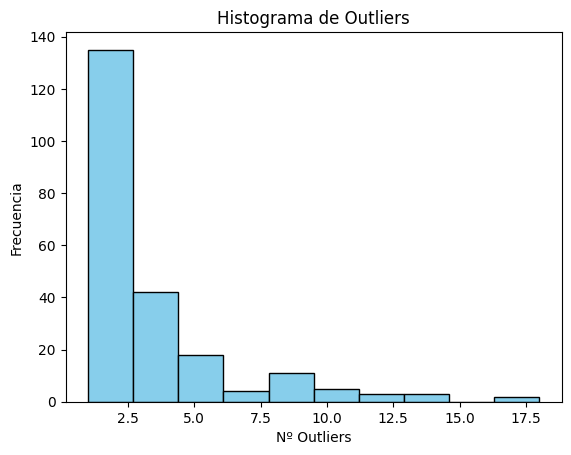

In [ ]:
# Dibujar el histograma
plt.hist(all_outliers['id'].value_counts(), bins=10, color='skyblue', edgecolor='black')

# Agregar etiquetas y título
plt.xlabel('Nº Outliers')
plt.ylabel('Frecuencia')
plt.title('Histograma de Outliers')

# Mostrar el histograma
plt.show()

Se puede apreciar que aunque la mayoría de datos con outliers tengan solamente 1 registro, hay muchos que tienen **outliers simultáneos** en varias variables, lo cual puede indicar que estos outliers no se deban a errores de medición, sino a valores lógicos debidos a la estructura de las características. Además, la existencia de númerosos registros con muchos outiers simultaneos indican que es un suceso común, por lo que estos registros con muchos outliers no deben ser eliminados.

Se estudia cuantos registros poseen outliers

In [ ]:
all_outliers = all_outliers.drop_duplicates(subset='id')
round(len(all_outliers)/len(df)*100,2)

39.19

El **39.19% de los registros poseen algún outlier**, por lo que son registros importantes en la base de datos y **no deben ser eliminados**

### **Correlación y reducción de dimensionalidad**

El análisis de correlación es un método inicial para identificar relaciones lineales entre variables. Se puede calcular el coeficiente de correlación de Pearson para cada par de variables, lo que dará una medida de la relación lineal entre cada variable predictora y la variable objetivo.

- Pros: **Fácil** de calcular y entender.
- Contras: **Solo capta relaciones lineales**; no detecta bien relaciones no lineales o complejas.

La matriz de correlación calcula los coeficientes que indican cómo cambian juntas las variables, con valores que oscilan entre -1 y 1. Un valor cercano a 1 señala una correlación positiva fuerte, mientras que cerca de -1 indica una correlación negativa fuerte, y alrededor de 0 indica una falta de correlación lineal. Esta información se visualiza mediante un mapa de calor, donde los colores representan la fuerza de la correlación entre las variables.

La utilidad de la matriz de correlación radica en proporcionar la **similitud de la información** ofrecida por dos variables. Si están altamente correlacionadas, la información será similar, lo que implica que no se necesitará emplear ambas para el análisis. Por lo tanto, es beneficioso **buscar variables poco correlacionadas** para **maximizar la información** utilizando el **menor número de variables posible**. Para facilitar la detección de variables altamente correlacionadas, se puede reorganizar la matriz **agrupando elementos con alta correlación**.

Se poseen 31 variables numéricas aparte del id y del diagnostico. Para ver si todas las variables son importantes a la hora de la clasificación se realiza una matriz de correlaciones para ver que variables dan la misma información.

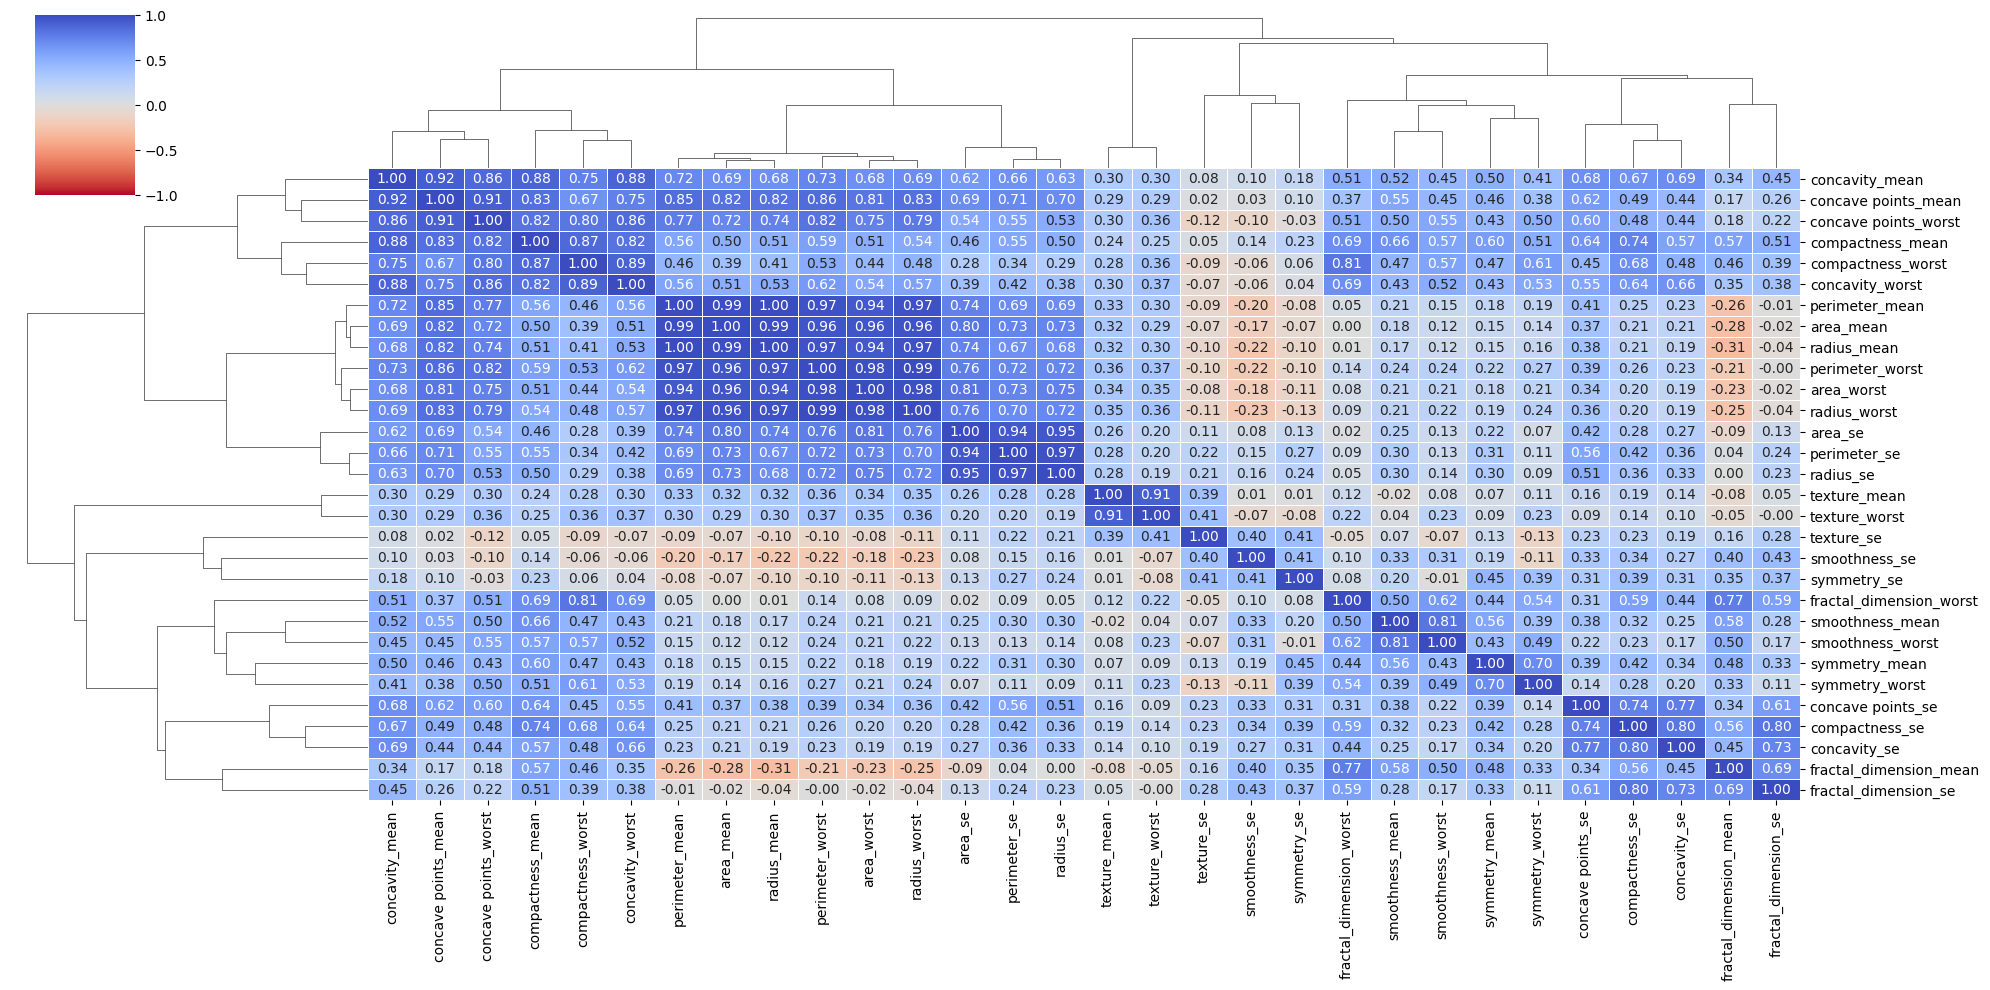

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df.iloc[:, 2:].corr()

# Utiliza clustering jerárquico para agrupar las columnas
cluster_map = sns.clustermap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=.5, figsize=(20, 10), vmin=-1, vmax=1)

Aquellos elementos con una correlación (en valor absoluto) elevado (>0.75), aportan prácticamente la misma información. A continuación se exponen aquellos grupos de variables con una correlación alta.

In [ ]:
# Obtén las etiquetas de las columnas después de la reorganización por clustering
clustered_columns = correlation_matrix.columns[cluster_map.dendrogram_col.reordered_ind]

print('Grupo 1:', clustered_columns[:6].tolist())
print('Grupo 2:', clustered_columns[6:12].tolist())
print('Grupo 3:', clustered_columns[12:15].tolist())
print('Grupo 4:', clustered_columns[15:17].tolist())
print('Grupo 5:', clustered_columns[21:23].tolist())
print('Grupo 6:', clustered_columns[25:28].tolist())

Grupo 1: ['concavity_mean', 'concave points_mean', 'concave points_worst', 'compactness_mean', 'compactness_worst', 'concavity_worst']
Grupo 2: ['perimeter_mean', 'area_mean', 'radius_mean', 'perimeter_worst', 'area_worst', 'radius_worst']
Grupo 3: ['area_se', 'perimeter_se', 'radius_se']
Grupo 4: ['texture_mean', 'texture_worst']
Grupo 5: ['smoothness_mean', 'smoothness_worst']
Grupo 6: ['concave points_se', 'compactness_se', 'concavity_se']


Se han obtenido 6 grupos que dan información relevante, como rasgos comunes entre ellos se tiene que la media y el peor caso correspondiente a cada característica dan el mismo tipo de información, por lo que no es necesario contemplar ambos datos. La información dada por cada uno de los grupos es la siguiente:

- Grupo 1: Este grupo da información acerca de la media y el peor caso de las características de concavidad, los puntos cóncavos y la compacidad. Esta información es acerca de la morfometría tumoral.
- Grupo 2: La información dada por este grupo es sobre la media y el peor caso del perímetro, el área y el radio del tumor. De esta forma, este grupo da información acerca del tamaño del tumor, siendo unas características empleadas para calcular otras.
- Grupo 3: En relación con el grupo 2, la información que da este grupo es acerca del error estándar de las variables relacionadas con el tamaño, el área, el perímetro y el radio.
- Grupo 4: La información contenida es acerca de la media y peor caso de la textura del tumor.
- Grupo 5: Da información acerca de la suavidad, tanto de la media como del peor caso.
- Grupo 6: Relacionado con el grupo 1, da información acerca del error de medición en las características de la morfometría tumoral, la concavidad, los puntos cóncavos y la compacidad.

De cada uno de estos grupos será suficiente emplear **un elemento de cada uno** para la clasificación. Para elegir estos elementos se buscara elegir aquellos que, estando en diferentes grupos, tengan una baja correlación con los otros grupos.

* De los elementos individuales **no se coge fractal_dimension_mean** debido a su correlacián (0.77) con fractal_dimension_worst

* Se escogen **radius_mean** (G.2) y **perimeter_se** (G.3) debido a que de entre estos dos grupos son los elementos con menor correlación entre ellos, y que además tienen una correlación muy alta (>0.9) con todos los elementos de su grupo

* Se escoge **compactness_mean** (G.1) debido a que del grupo 1 posee la menor correlación con radius_mean y perimeter_se, y además tiene una correlación interna en el grupo alta (>0.75)

* Se escoge **smoothness_mean** (G.4) debido a que posee una menor correlación con fractal_dimension_mean

* Se escoge **concavity_se** (G.5) debido a que posee la mayor correlación interna dentro del grupo

In [ ]:
df_sincorr = df[['id', 'diagnosis', 'compactness_mean', 'radius_mean', 'perimeter_se', 'texture_mean',
                'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_worst', 'smoothness_mean',
                 'symmetry_mean', 'symmetry_worst', 'concavity_se', 'fractal_dimension_se']]

Se estudia la correlación de estas variables para confirmar la adecuación

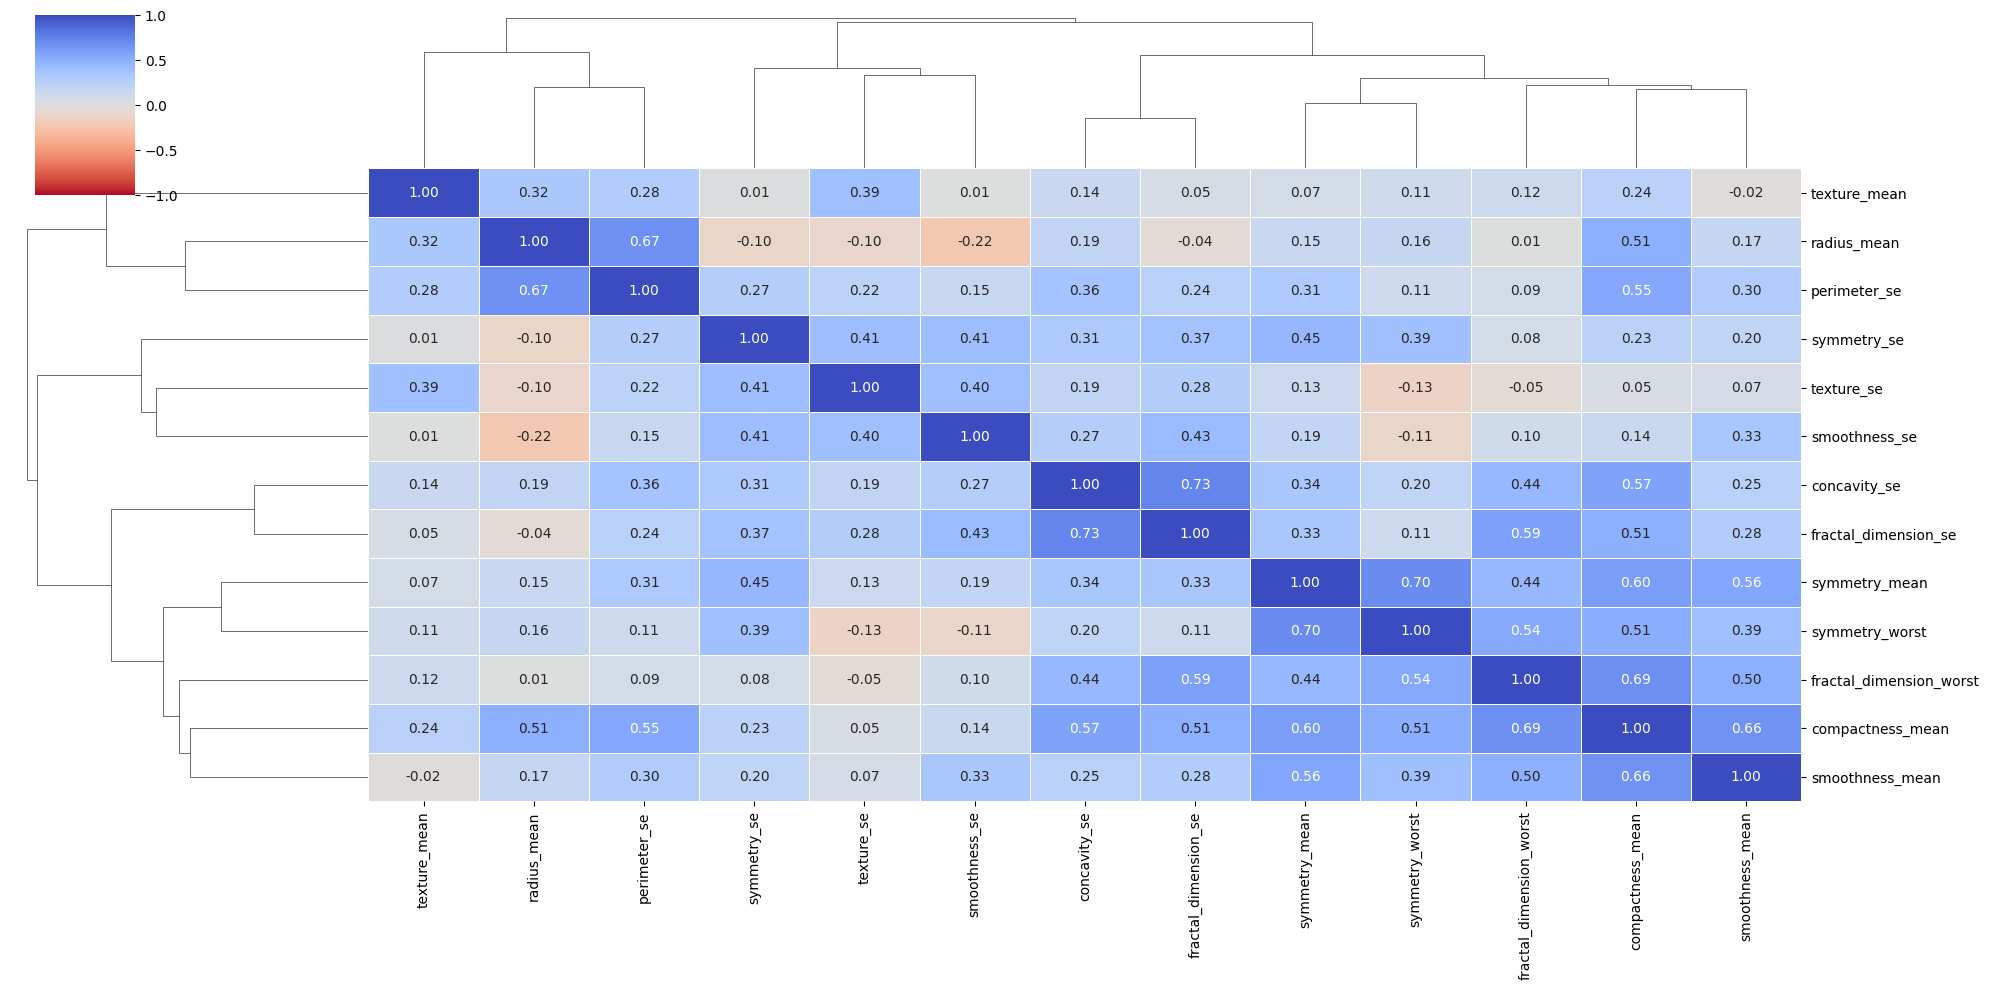

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz de correlación
correlation_matrix = df_sincorr.iloc[:, 2:].corr()

# Utiliza clustering jerárquico para agrupar las columnas
cluster_map = sns.clustermap(correlation_matrix, cmap='coolwarm_r', annot=True, fmt=".2f", linewidths=.5, figsize=(20, 10), vmin=-1, vmax=1)

Efectivamente, no existe una amplia correlación entre estas variables, por lo que la reducción de dimensionalidad se ha aplicado de manera correcta.

### **Análisis de outliers de las variables definitivas**

Se estudian detenidamente los outliers de las variables seleccionadas. Aunque la mayoría de outliers han sido clasificados como de útiles, algunos pueden ser extremos y ser verdaderos errores de medición.

In [ ]:
def plot_histograms_with_outliers(df):
    # Filtramos solo las columnas numéricas
    numeric_cols = df.iloc[:, 1:].select_dtypes(include=['float64', 'int64'])

    # Calculamos el número de filas y columnas necesarias para los subplots
    num_plots = len(numeric_cols.columns)
    num_rows = (num_plots - 1) // 3 + 1

    # Configuramos el tamaño de la figura
    plt.figure(figsize=(15, 5 * num_rows))

    # Iteramos sobre cada columna numérica y dibujamos su histograma en un subplot
    for i, col in enumerate(numeric_cols.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.hist(numeric_cols[col], bins=20, alpha=0.5)
        plt.xlabel('Valor')
        plt.ylabel('Frecuencia')
        plt.title(col)

        # Calculamos los límites utilizando el rango intercuartílico (IQR)
        Q1 = numeric_cols[col].quantile(0.25)
        Q3 = numeric_cols[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Dibujamos las líneas verticales
        plt.axvline(x=lower_bound, color='r', linestyle='--', linewidth=2)
        plt.axvline(x=upper_bound, color='r', linestyle='--', linewidth=2)

    # Ajustamos automáticamente los espacios entre los subplots para evitar superposiciones
    plt.tight_layout()

    # Mostramos los subplots
    plt.show()

Se grafican los histogramas de las variables con los rangos intercuartílicos.

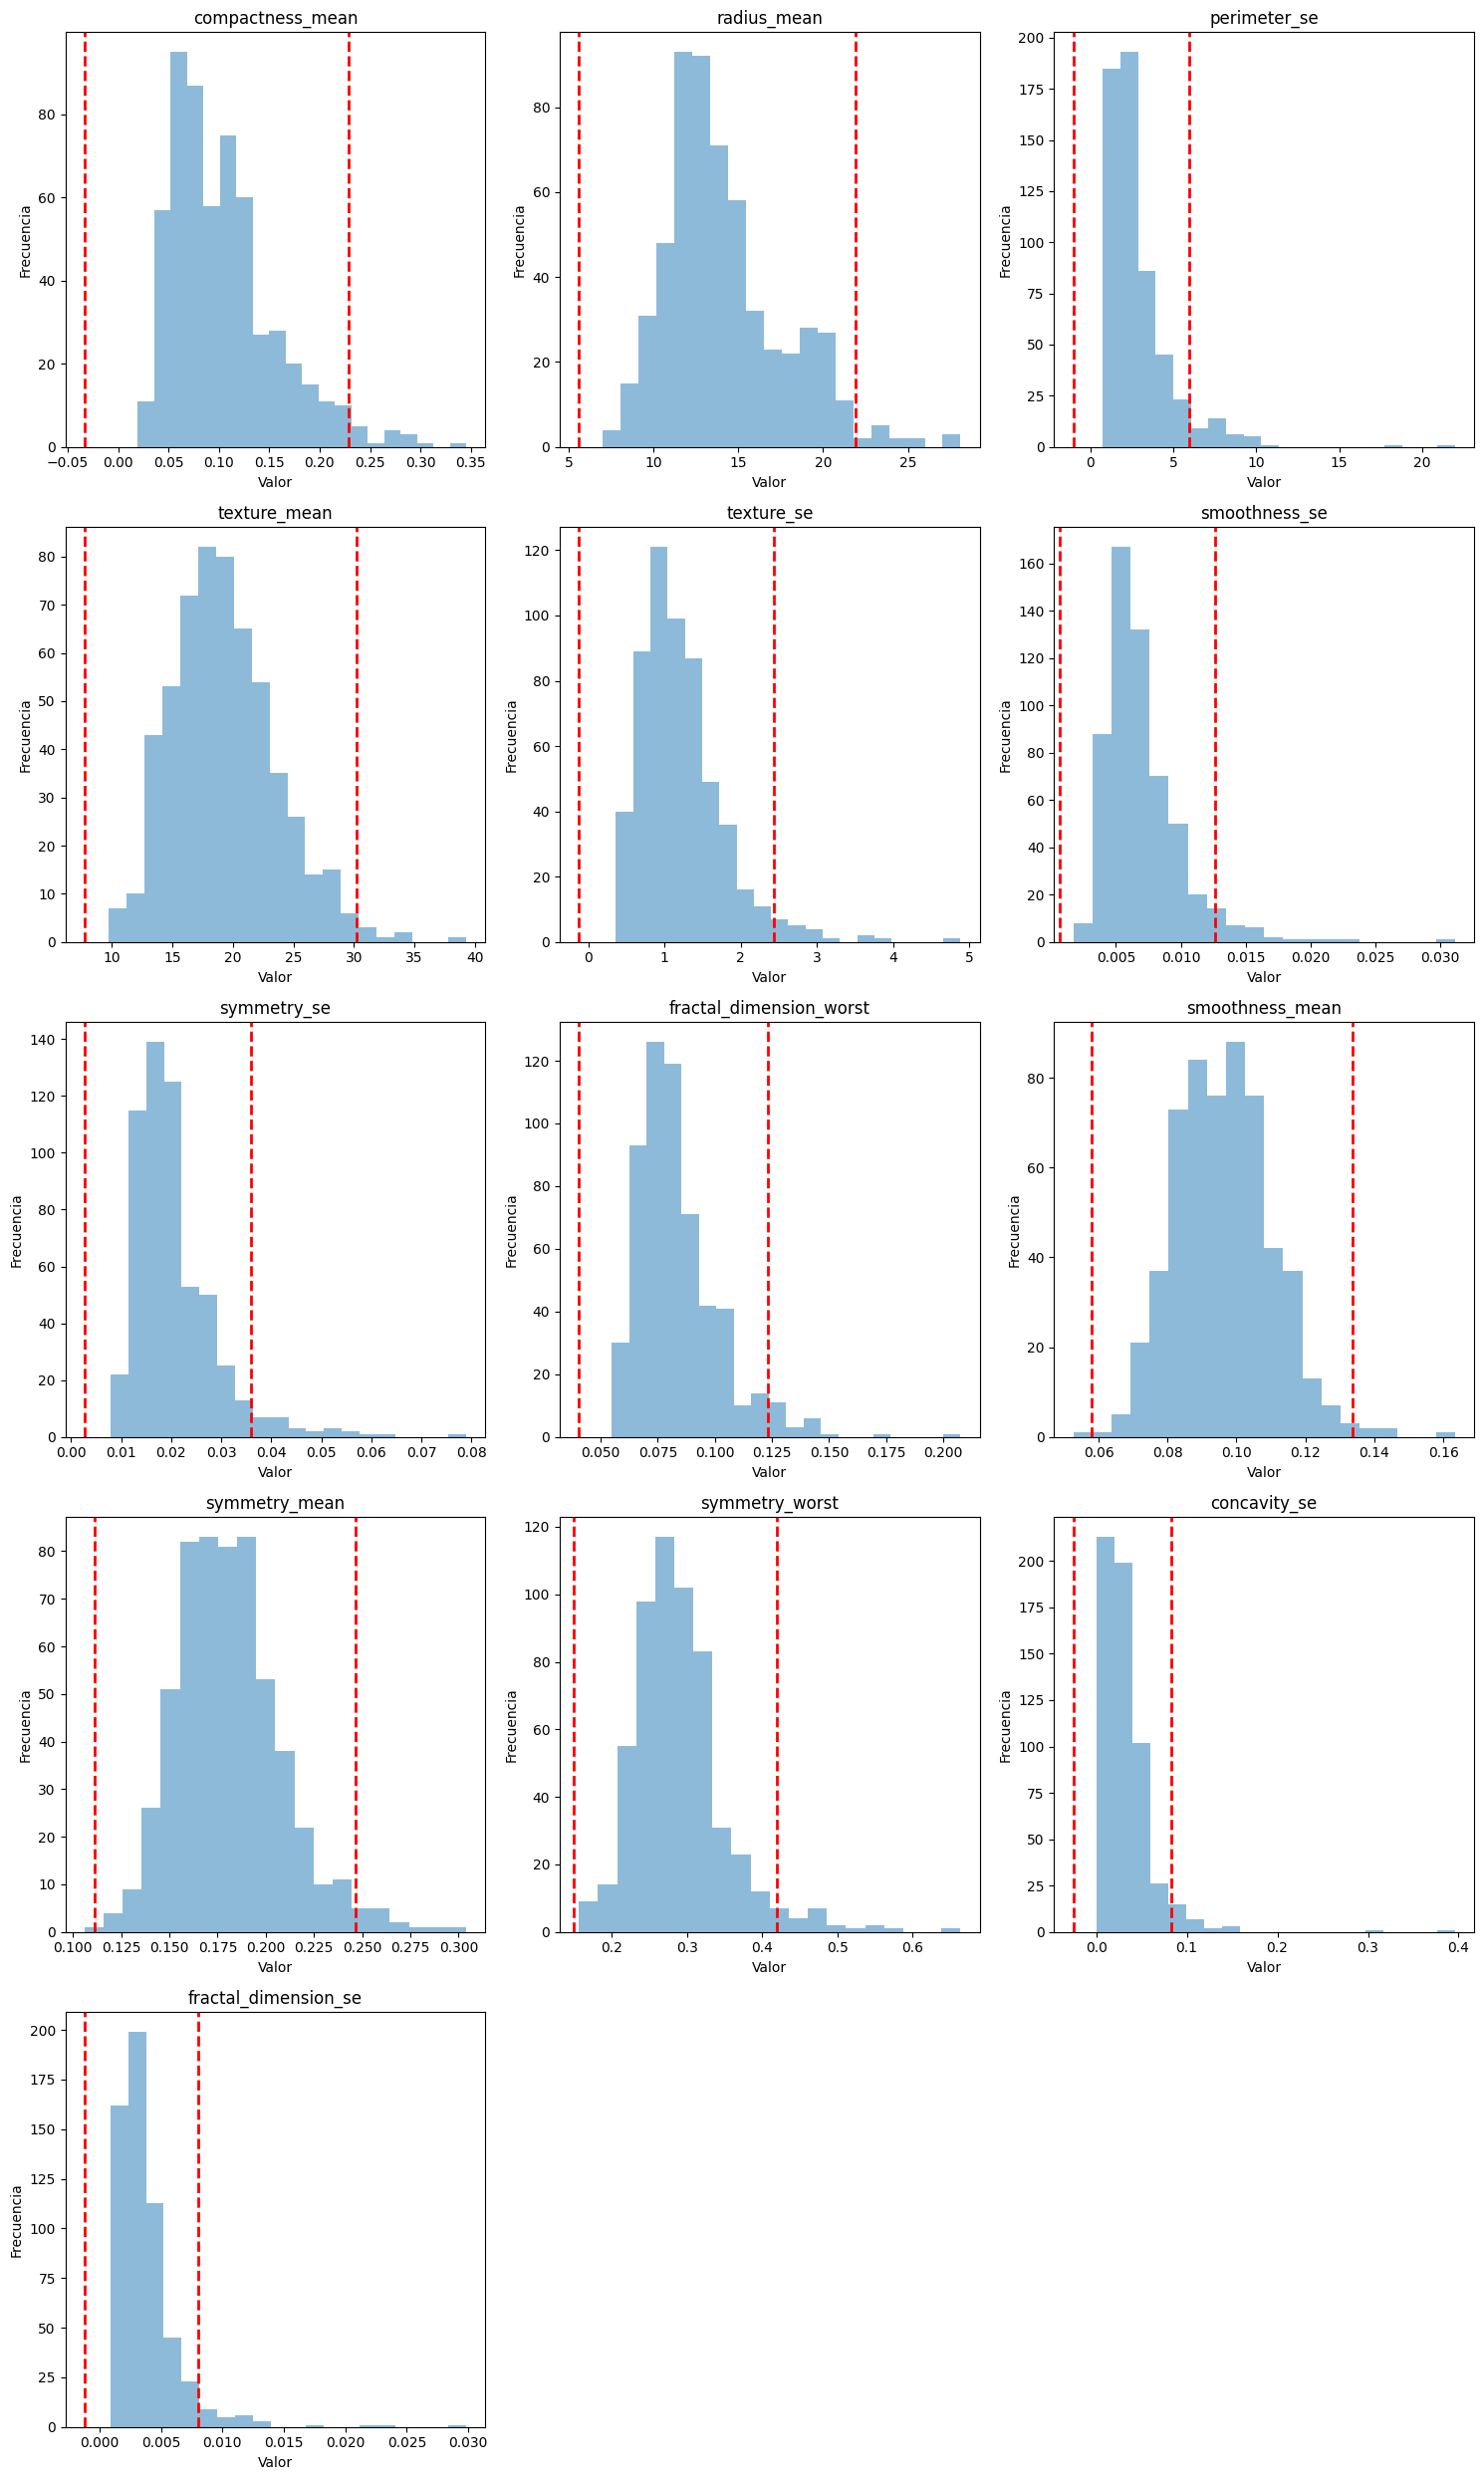

In [ ]:
plot_histograms_with_outliers(df_sincorr)

Se observa que, efectivamente, existen ciertos **valores demasiado extremos** acorde a las distribuciones, se propone eliminar estos registros.

Se estudia cuantos outliers individuales existen, así como cuantos registros los contienen.

In [ ]:
print('Outliers individuales: ', len(df_sincorr[df_sincorr['perimeter_se']>11])+
          len(df_sincorr[df_sincorr['texture_se']>4])+
          len(df_sincorr[df_sincorr['smoothness_se']>0.025])+
          len(df_sincorr[df_sincorr['symmetry_se']>0.07])+
          len(df_sincorr[df_sincorr['fractal_dimension_worst']>0.17])+
          len(df_sincorr[df_sincorr['concavity_se']>0.2])+
          len(df_sincorr[df_sincorr['fractal_dimension_se']>0.015]))

print('Registros con outliers: ', len(df_sincorr[(df_sincorr['perimeter_se'] > 11) |
                                      (df_sincorr['texture_se'] > 4) |
                                      (df_sincorr['smoothness_se'] > 0.025) |
                                      (df_sincorr['symmetry_se'] > 0.07) |
                                      (df_sincorr['fractal_dimension_worst'] > 0.17) |
                                      (df_sincorr['concavity_se'] > 0.2) |
                                      (df_sincorr['fractal_dimension_se'] > 0.015)]))

Outliers individuales:  14
Registros con outliers:  13


El **número de registros con outliers es pequeño**, y además, los outliers **no se dan de manera simultanea**, lo cual indica que pueden ser errores de medición. **Se decide eliminar estos outliers extremos**.

In [ ]:
df_sincorr = df_sincorr[~((df_sincorr['perimeter_se'] > 11) |
                        (df_sincorr['texture_se'] > 4) |
                        (df_sincorr['smoothness_se'] > 0.025) |
                        (df_sincorr['symmetry_se'] > 0.07) |
                        (df_sincorr['fractal_dimension_worst'] > 0.17) |
                        (df_sincorr['concavity_se'] > 0.2) |
                        (df_sincorr['fractal_dimension_se'] > 0.015))]

### **Discretización**

Acorde a lo indicado en el enunciado, se busca discretizar las variables relacionadas con el área, el diámetro y la compacidad

In [ ]:
def discretizar_variable(df, columna, n_clases):
    # Obtener solo la columna necesaria
    columna_df = df[columna]

    # Calcular el número de elementos por clase
    elementos_por_clase = len(columna_df) // n_clases

    # Ordenar los valores de la columna
    columna_sorted = columna_df.sort_values()

    # Crear una lista para almacenar los límites de los cuantiles
    cuantiles = []

    # Iterar para determinar los límites de los cuantiles
    for i in range(n_clases - 1):
        idx = (i + 1) * elementos_por_clase
        cuantil = columna_sorted.iloc[min(idx, len(columna_sorted) - 1)]
        cuantiles.append(cuantil)

    # Asignar las clases discretizadas al DataFrame original
    columna_df = pd.cut(columna_df, bins=[float('-inf')] + cuantiles + [float('inf')], labels=False)

    return columna_df


De las variables a usar tienen relacion **compactness_mean**, que es la compacidad media. Y **radius_mean**, que es la media de la mitad del diámetro

In [ ]:
df_sincorr['compactness_mean'] = discretizar_variable(df_sincorr, 'compactness_mean', 3).astype('category')
df_sincorr['radius_mean'] = discretizar_variable(df_sincorr, 'radius_mean', 3).astype('category')

df_sincorr['compactness_mean'] = df_sincorr['compactness_mean'].cat.rename_categories({0: 'Bajo', 1: 'Medio', 2: 'Alto'})
df_sincorr['radius_mean'] = df_sincorr['radius_mean'].cat.rename_categories({0: 'Bajo', 1: 'Medio', 2: 'Alto'})

## **Crear Arboles de clasificación**

Un **árbol de decisión** es una herramienta de modelado predictivo en la que se representa un conjunto de decisiones y sus posibles consecuencias en forma de árbol. Cada nodo interno del árbol representa una decisión basada en una característica (atributo), cada rama representa el resultado de esa decisión, y cada nodo hoja representa un resultado final (una clase o un valor numérico).

Los Decision Support Systems (DSS), o Sistemas de Soporte a la Decisión, son sistemas informáticos que ayudan a las personas a tomar decisiones al proporcionar información, análisis y herramientas de modelado. Los árboles de decisión son una de las técnicas de modelado que se utilizan en los DSS para representar y analizar decisiones complejas.

**Pros** de los árboles de decisión:

- **Interpretabilidad**: Son fáciles de entender y visualizar, lo que los hace útiles para explicar decisiones a personas no técnicas.
- **Versatilidad**: Pueden manejar datos numéricos y categóricos, y pueden utilizarse tanto para clasificación como para regresión.
- **No requieren supuestos sobre la distribución de los datos**: No necesitan que los datos estén normalmente distribuidos o que las variables sean linealmente independientes.
- **Manejo automático de variables irrelevantes**: Los árboles de decisión tienden a ignorar las variables irrelevantes en el proceso de modelado.

**Contras** de los árboles de decisión:

- **Sobreajuste (Overfitting)**: Los árboles de decisión pueden tender a memorizar los datos de entrenamiento y no generalizar bien a nuevos datos si no se controla el crecimiento del árbol.
- **Sensibilidad a pequeñas variaciones en los datos**: Pequeños cambios en los datos de entrenamiento pueden resultar en árboles de decisión muy diferentes, lo que los hace menos estables que otros modelos.
- **Sesgo de selección de atributos**: Los árboles de decisión tienden a favorecer los atributos con más niveles, lo que puede llevar a sesgos en el modelo.
- **No son buenos para problemas de alta dimensionalidad**: En conjuntos de datos con muchas características, los árboles de decisión tienden a volverse complejos y difíciles de interpretar, además de tener más probabilidades de sobreajustarse.

De este modo, utilizar un árbol de decisión como clasificador para diferenciar tumores malignos de benignos en este escenario es una elección sólida. Los árboles de decisión son herramientas de modelado predictivo que representan conjuntos de decisiones y sus posibles resultados de manera visual y comprensible, lo que facilita su interpretación. Además, su capacidad para manejar eficientemente datos continuos y su adaptabilidad a múltiples tipos de variables los convierten en una opción versátil y adecuada para este tipo de problema. Sin embargo, es importante tener en cuenta sus posibles limitaciones, como la tendencia al sobreajuste y la sensibilidad a pequeñas variaciones en los datos, para garantizar la fiabilidad y la generalización del modelo

Se dividen los datos en **variables explicativas** (X) y **variable objetivo** (y)

In [ ]:
# Dividir los datos en características (X) y la variable objetivo (y)
X = df_sincorr.drop(columns=['id', 'diagnosis'])
y = df_sincorr['diagnosis']

La función para crear arboles de decisión (DecisionTreeClassifier) requiere que las **variables categóricas estén en formato one-hot encoding**. Por lo que se pasan las variables compactness_mean y radius_mean a este formato.

In [ ]:
# Crear una instancia de OneHotEncoder
encoder = OneHotEncoder()

# Aplicar OneHotEncoder a las características categóricas en X
X_encoded = pd.get_dummies(X)

Se divide el total de los datos siendo el 80% para entrenamiento y el 20% de test

In [ ]:
# Dividir los datos codificados en conjuntos de entrenamiento y prueba
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

A continuación se crearan dos modelos de clasificación empleando dos criterios de ramificación: **Algoritmo ID3** y **Algoritmo de Cart**

### **Algoritmo ID3**

Se crear el árbol empleando el **criterio de entropía**. Se entrena el modelo con los datos de entrenamiento y se calcula el accuracy

La entropía es la información esperada del atributo Ak en lo referente al conjunto de casos X. Es decir, el nivel de diversidad de este atributo en el
conjunto de casos X. Cuando vale cero todos los registros pertenecen a la misma clase (totalmente homogénea). Siendo p la proporción la formula es la siguiente:$$
E(t) = -\sum_{j=1}^{k} p_j \log(p_j)
$$

**Pros** de usar la entropía como criterio de decisión en la creación de árboles de decisión:

- **Robustez frente a datos desbalanceados**: La entropía tiende a funcionar bien incluso cuando hay desequilibrios en las clases de los datos, ya que considera la distribución de las clases en cada nodo del árbol.
- **Versatilidad**: La entropía puede aplicarse a una amplia gama de problemas, ya que no asume ninguna distribución específica de los datos.
- **Interpretación intuitiva**: La entropía se puede interpretar como la medida de incertidumbre o impureza en los datos. Por lo tanto, la reducción de la entropía a través de la división de nodos en el árbol de decisión se traduce fácilmente en una mejora en la pureza de las clases.
- **Adaptabilidad a múltiples clases**: La entropía puede manejar problemas de clasificación con múltiples clases sin necesidad de ajustes adicionales.

**Contras** de usar la entropía como criterio de decisión:

- **Mayor costo computacional**: Calcular la entropía implica evaluar la distribución de las clases en cada nodo del árbol, lo que puede ser computacionalmente costoso para conjuntos de datos grandes.
- **Propenso al sobreajuste**: Los árboles de decisión construidos utilizando la entropía tienden a ser más complejos y, por lo tanto, pueden ser propensos al sobreajuste, especialmente si no se controla adecuadamente la profundidad del árbol o se aplican técnicas de poda.
- **Sensibilidad a ruido**: La entropía puede ser sensible al ruido en los datos, lo que puede conducir a la creación de divisiones subóptimas en el árbol de decisión.
- **No garantiza la mejor separación**: Aunque la entropía busca reducir la incertidumbre en los datos, no garantiza siempre la mejor separación entre las clases, especialmente en conjuntos de datos complejos o con características altamente correlacionadas.

In [ ]:
# Crear el clasificador del árbol de decisión
clf = DecisionTreeClassifier(criterion="entropy")

# Entrenar el clasificador
clf.fit(X_train_encoded, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test_encoded)

# Calcular la precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9196428571428571


La precisión del modelo es de un 92.86%, por lo que hay un **error del 7.14%**.

Se grafica el árbol obtenido

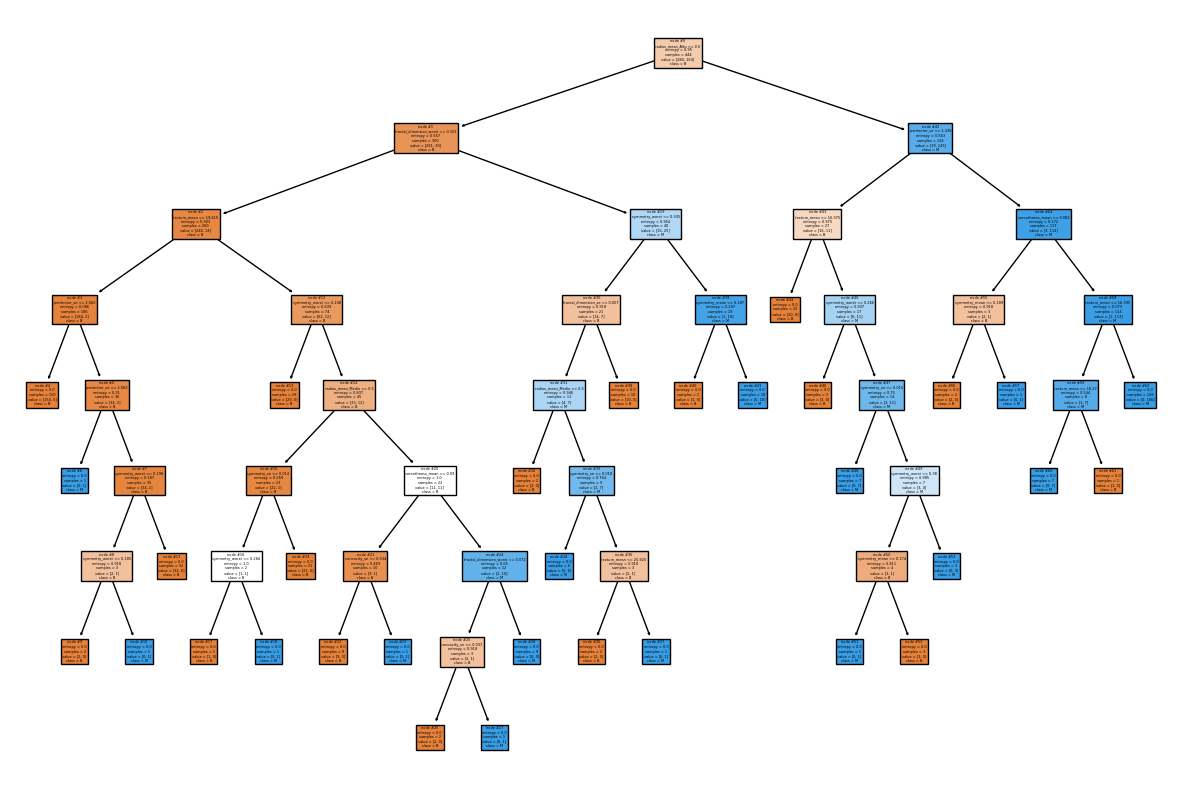

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_, node_ids=True)
plt.show()

El árbol obtenido tiene **profundidad 9** y **29 nodos hoja**

### **Algoritmo de Cart (GINI)**

Se crea el árbol empleando el criterio de **GINI**. Se entrena el modelo con los datos de entrenamiento y se calcula el accuracy

El índice de GINI se calcula cuando se divide un nodo p en k particiones y se quiere calcular la calidad de la partición. Su formulación es la siguiente:$$
GINI(t) = 1 - \sum_{j=1}^{k} p_j^2
$$

**Pros** de usar el índice de Gini como criterio de decisión en la creación de árboles de decisión:

- **Eficiencia computacional**: El cálculo del índice de Gini es más rápido que el cálculo de la entropía, lo que lo hace más eficiente computacionalmente, especialmente para conjuntos de datos grandes.
- **Robustez frente a datos desbalanceados**: Al igual que la entropía, el índice de Gini tiende a funcionar bien con conjuntos de datos desbalanceados, ya que se enfoca en la distribución de clases en los nodos del árbol.
- **Buena en la práctica**: En muchos casos, el índice de Gini produce resultados similares a los obtenidos utilizando la entropía, por lo que puede ser una opción confiable y efectiva en la práctica.

**Contras** de usar el índice de Gini como criterio de decisión:

- **Menos sensible a las diferencias en la distribución de clases**: A diferencia de la entropía, el índice de Gini no mide la información ganada al dividir un nodo, sino que simplemente evalúa la pureza de las clases en ese nodo. Esto puede hacer que el índice de Gini sea menos sensible a las diferencias sutiles en la distribución de las clases.
- **Menor enfoque en la información**: El índice de Gini tiende a ser menos informativo que la entropía, ya que no tiene en cuenta la cantidad de información ganada al realizar una división en el árbol de decisión.
- **No garantiza la mejor separación**: Al igual que con la entropía, el uso del índice de Gini no garantiza siempre la mejor separación entre las clases, especialmente en conjuntos de datos complejos o con características altamente correlacionadas.

In [ ]:
# Crear el clasificador del árbol de decisión
clf = DecisionTreeClassifier(criterion="gini")

# Entrenar el clasificador
clf.fit(X_train_encoded, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test_encoded)

# Calcular la precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.9285714285714286


La precisión del modelo es de un 94.64%, por lo que hay un **error del 5.36%**.

Se grafica el árbol obtenido

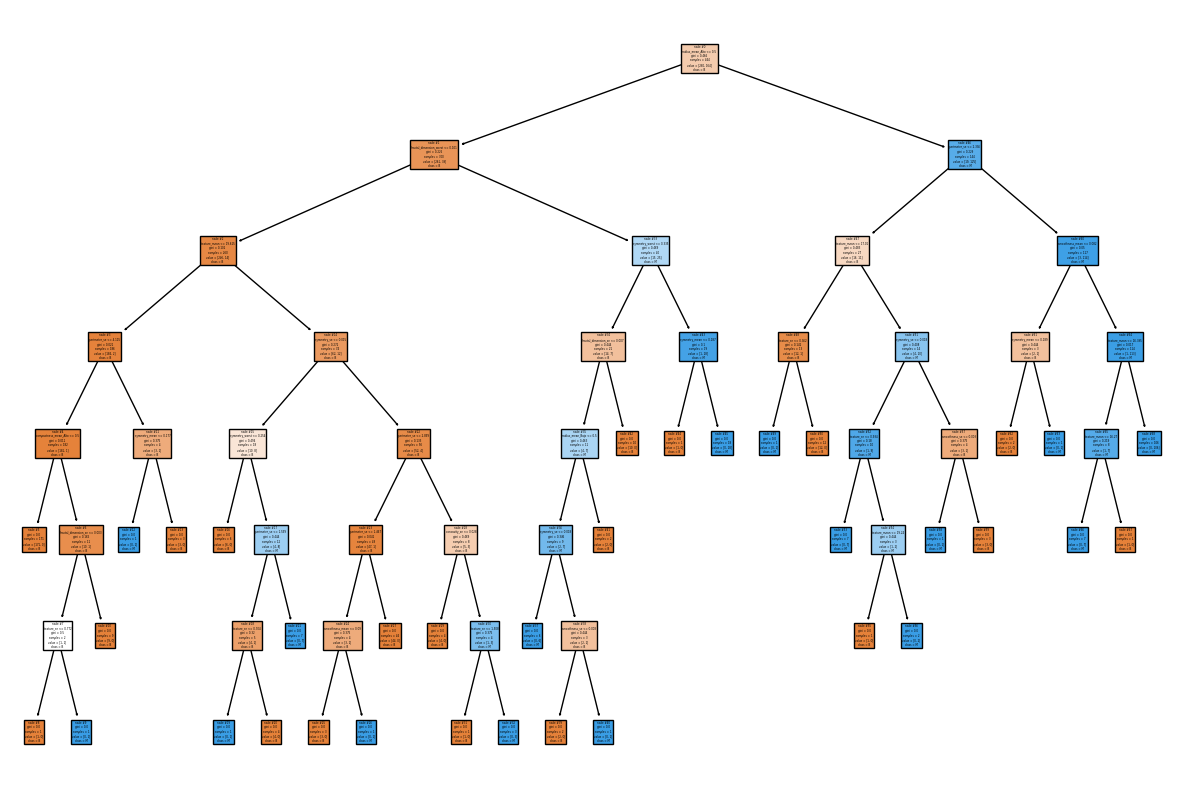

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_, node_ids=True)
plt.show()

El árbol obtenido tiene **profundidad 8** y **35 nodos hoja**

Los dos árboles obtenidos son muy parecidos tanto a nivel de profundidad, número de nodos hoja (clasificatorios) y de efectividad. Sin embargo, **se escoge el criterio de GINI (Algoritmo de Cart)** debido a su mayor porcentaje de acierto (y, por tanto, menor error)

## **Interpretación de las reglas**

Como los árboles obtenidos tienen demasiada profundidad su **visualización** es **dificil**. En su lugar, **se emplearan el 10% de los datos** para obtener **árboles mas sencillos y fáciles de visualizar**

In [ ]:
# Dividir los datos codificados en conjuntos de entrenamiento y prueba
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.9, random_state=0)

Se aplica el criterio GINI (Algoritmo de Cart)

In [ ]:
# Crear el clasificador del árbol de decisión
clf = DecisionTreeClassifier(criterion="gini")

# Entrenar el clasificador
clf.fit(X_train_encoded, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test_encoded)

# Calcular la precisión
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.8323353293413174


La precisión del modelo es de un 81.63%, por lo que hay un error del **18.37%**.

Se visualiza el árbol

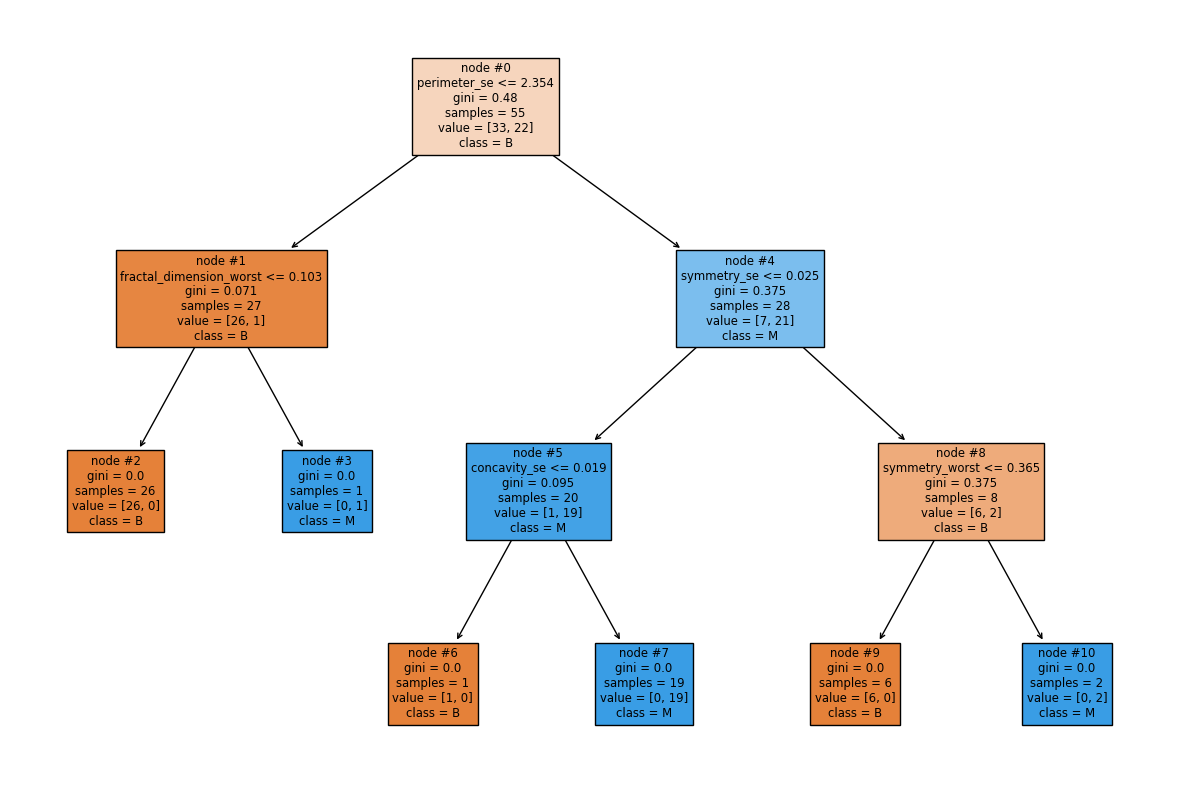

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(15,10))
plot_tree(clf, filled=True, feature_names=X_encoded.columns, class_names=clf.classes_, node_ids=True)
plt.show()

El árbol obtenido tiene **profundidad 4** y **6 nodos hoja**

Para determinar lo que generaliza o especializa una regla hay que identificar el **número de registros** que cubre:

* **Muchos registros**: Si un nodo hoja cubre muchos registros, significa que muchas muestras terminan en ese nodo después de recorrer el árbol de decisiones. Esto puede indicar que la regla asociada a ese nodo es **más general**, ya que cubre una gran cantidad de casos diferentes.

* **Pocos registros**: Por el contrario, si un nodo hoja cubre pocos registros, significa que solo un pequeño número de muestras llegan a ese nodo después de recorrer el árbol. Esto puede indicar que la regla asociada a ese nodo es **más específica**, ya que solo se aplica a un subconjunto reducido de casos.

De esta forma se tienen las siguientes reglas:

* **Reglas que generalizan poco: Nodo 3 y Nodo 6**
* **Reglas que especializan poco: Nodo 2 y Nodo 7**

Si se analiza más profundamente la relación entre las reglas se tiene que a partir de **una ramificación salen una regla que generaliza y otra que especializa** en dos ocasiones. Los **nodos 2 y 3** salen de la misma separación, mientras que los **nodos 6 y 7** también salen de una ramificación.

Esta información es interesante, pues se van a analizar las peculiaridades de cada pareja:

* **Nodos 2 y 3**: Se tiene que aquellos tumores con un error en el perímetro menor a 2.354 **suelen ser tumores Benignos**, sin embargo, hay algún **caso excepcional**, lo cual produce una nueva separación en base a la peor dimensión fractal, la cual si resulta ser mayor a 0.103 es lo suficientemente significativa como para ser un **tumor Maligno**. Estos casos puntuales son los que producen que se genere una regla que generaliza y otra que especializa.

* **Nodos 6 y 7**: Se tiene que aquellos tumores con un error en el perímetro mayor a 2.354 y que además el error de la simetría es menor a 0.025 **son principalmente tumores Malignos**. Sin embargo, de la misma manera que antes, existen **algunas excepciones**, las cuales se clasifican a partir del error de la textura, que si es menor a 0.531 se determina que el **tumor es Benigno**. Esta excepción de nuevo provoca una regla que generaliza y otra que especializa.

## **Evaluación de individuos**

Volvemos a procesar el árbol de decisión con el **80% de los datos** y **empleando GINI**, pues fue el **seleccionado como el mejor**

In [ ]:
# Dividir los datos codificados en conjuntos de entrenamiento y prueba
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=0)

# Crear el clasificador del árbol de decisión
clf = DecisionTreeClassifier(criterion="gini")

# Entrenar el clasificador
clf.fit(X_train_encoded, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test_encoded)

A continuación se define la función para, dado un árbol de clasificación y unos datos, te da aquellos elementos que son clasificados por diferentes caminos, así como su nodo clasificador

In [ ]:
def obtener_camino_decision(clf, X_test_encoded, y_test, y_pred, num_instancias=5):
    decision_paths = clf.decision_path(X_test_encoded)
    Elementos = []

    for i, decision_path in enumerate(decision_paths):
        nodes_visited = decision_path.indices
        if nodes_visited[-1] not in [elemento[1] for elemento in Elementos]:
            Elementos.append([i, nodes_visited[-1]])
        if len(Elementos) == num_instancias:
            break

    for i in range(len(Elementos)):
        print('Individuo', i+1, ':')
        print('Clase Real:', y_test.iloc[Elementos[i][0]])
        print('Clase Predicha:', y_pred[Elementos[i][0]])
        print('Nodo Clasificador:', Elementos[i][1])
        for column, value in X_test_encoded.iloc[Elementos[i][0]].items():
            print('\t{:<25}\t{}'.format(column + ":", value))
        print('---------------------------------------------')

Se muestran **5 individuos clasificados por diferentes recorridos**

In [ ]:
obtener_camino_decision(clf, X_test_encoded, y_test, y_pred)

Individuo 1 :
Clase Real: M
Clase Predicha: B
Nodo Clasificador: 59
	perimeter_se:            	2.075
	texture_mean:            	22.76
	texture_se:              	0.8413
	smoothness_se:           	0.009882
	symmetry_se:             	0.02471
	fractal_dimension_worst: 	0.06828
	smoothness_mean:         	0.092
	symmetry_mean:           	0.1717
	symmetry_worst:          	0.2556
	concavity_se:            	0.04531
	fractal_dimension_se:    	0.002142
	compactness_mean_Bajo:   	False
	compactness_mean_Medio:  	True
	compactness_mean_Alto:   	False
	radius_mean_Bajo:        	False
	radius_mean_Medio:       	False
	radius_mean_Alto:        	True
---------------------------------------------
Individuo 2 :
Clase Real: M
Clase Predicha: M
Nodo Clasificador: 68
	perimeter_se:            	8.419
	texture_mean:            	17.57
	texture_se:              	1.452
	smoothness_se:           	0.01
	symmetry_se:             	0.05168
	fractal_dimension_worst: 	0.07147
	smoothness_mean:         	0.1167
	symmetry

De los 5 individuos se tiene de 4 han sido clasificados correctamente, porcentaje el cual se adecua al acierto total del árbol. Por otra parte, 2 de estos aciertos son de la clase Maligno y los otros 2 de la clase Benigno, mientras que el elemento incorrecto mezcla ambas clases.

El tumor que ha sido clasificado incorrectamente se debe a que su nodo clasificador (el 59) se trata de una regla que especializa. Siguiendo parte del árbol clasificador, se tiene que los individuos sin un radio de longitud alto, un error en el perímetro menor a 2.3, una media de textura mayor a 17.01 y un error de simetría mayor que 0.015 son principalmente tumores Benignos(75%), sin embargo, los datos que refuerzan esto son pocos, provocando la creación de dos reglas que especializan en base a si la media de la suavidad es mayor o menor a 0.06. El hecho de que esta especialización sea realizada con 3 tumores Benignos y 1 Maligno es lo que provoca que no exista suficiente información como para que dicha separación sea exacta y efectiva con una muestra mayor, provocando así el error en la clasificación.

# **Ejercicio 2**

TCGA (The Cancer Genome Atlas) es un proyecto colaborativo dirigido por el Instituto Nacional del Cáncer (NCI) y el Instituto Nacional de Investigación del Genoma Humano (NHGRI) en los Estados Unidos.

Su objetivo principal es caracterizar exhaustivamente las alteraciones genómicas en el cáncer mediante el análisis de conjuntos de datos de pacientes con cáncer.

Se pretende crear un clasificador de tipos de cáncer que tenga en cuenta las probabilidades de pertenecer a una clase dependiendo de las distintas variables y sus valores.


In [ ]:
!pip install stemgraphic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5158deea2fc564dbb4a757efa83d2e9c333fba4959c19dda4553e116fc3d2b5d
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


Se importan a continuación una serie de librerias y módulos esenciales para realizar las tareas de análisis y procesamiento de datos que se proponen en el ejercicio.

In [ ]:
from google.colab import files
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import re
import stemgraphic
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Se procede a continuación a realizar la carga de la base de datos que se utilizará en el ejercicio.

In [ ]:
uploaded = files.upload()

Saving TCGA.csv to TCGA.csv


##**ESTUDIO DE LA BASE DE DATOS**

En la siguiente sección se tratará de adquirir cierto conocimiento sobre la base de datos (TCGA) utilizada en el ejercicio.



**DEFINICIÓN DE ATRIBUTOS Y VALORES**

###**Grade (Grado del tumor):**

**GBM (Glioblastoma):** Es conocido como un tipo de tumor cerebral muy agresivo y corresponde al grado IV, que es el grado más alto en la clasificación de tumores del sistema nervioso central. Por tanto, es un glioma de alto grado.

**LGG (Glioma de bajo grado):** Este término se utiliza para describir gliomas menos agresivos, que suelen corresponder a los grados I y II en la clasificación de tumores del sistema nervioso central.


###**Project (Proyecto):**

**TCGA-GBM:** Proyecto del TCGA centrado en el glioblastoma.

**TCGA-LGG:** Proyecto del TCGA centrado en gliomas de bajo grado.


###**Gender (Género):**

**Female:** Femenino.

**Male:** Masculino.


###**Primary_Diagnosis (Diagnóstico Primario):**

**Astrocytoma, NOS (Not Otherwise Specified):**Este es un tipo de glioma que proviene de las células llamadas astrocitos, que son un tipo de célula glial en el cerebro. "NOS" indica que el tumor no se ha clasificado más específicamente.

**Astrocytoma, anaplastic:** Un astrocytoma anaplásico es una forma más agresiva y de mayor grado que el astrocytoma NOS. Los tumores anaplásicos son más propensos a crecer rápidamente y a tener un pronóstico más desfavorable.

**Glioblastoma:** Este es el tipo más común y más agresivo de tumor cerebral primario en adultos. Se considera un glioma de grado IV, lo que indica un alto grado de malignidad. Los glioblastomas son conocidos por su rápido crecimiento y su resistencia a los tratamientos.

**Mixed glioma:** Este diagnóstico indica que el tumor contiene una mezcla de dos o más tipos de células gliales. Por ejemplo, un glioma mixto podría contener tanto astrocitos como oligodendrocitos.

**Oligodendroglioma, NOS**: Este es un tipo de glioma que se origina en las células oligodendrocíticas, que son otro tipo de células gliales. Al igual que con el astrocytoma NOS, la designación "NOS" significa que el tumor no se ha subclasificado más detalladamente.

**Oligodendroglioma, anaplastic:** Similar al astrocytoma anaplásico, un oligodendroglioma anaplásico es una forma de mayor grado y más agresiva de oligodendroglioma. Tiene un potencial de crecimiento más rápido y un pronóstico más grave en comparación con el oligodendroglioma NOS.


###**Race (Raza):**

**american indian or alaska native:** Indígena americano o nativo de Alaska.

**asian:** Asiático.

**black or african american:** Negro o afroamericano.

**not reported:** No reportado.

**white:** Blanco.


###**Genes (como IDH1, TP53, ATRX, entre otros):**

**MUTATED:** Indica que el gen está mutado.

**NOT_MUTATED:** Indica que el gen no está mutado.

Estos genes están asociados con diversas funciones celulares y, cuando mutan, pueden contribuir al desarrollo o progresión del cáncer. Por ejemplo, las mutaciones en IDH1 son comunes en ciertos tipos de gliomas y tienen implicaciones en el pronóstico y en la respuesta al tratamiento.

La presencia de mutaciones en estos genes puede ofrecer información sobre la biología del tumor, posibles objetivos terapéuticos y pronósticos. Por ejemplo, en algunos tipos de cáncer, ciertas mutaciones pueden indicar una mayor sensibilidad a ciertos tratamientos o una mejor respuesta a ciertas terapias.

**DIFERENCIAS ENTRE DIAGNÓSTICO PRIMARIO Y GRADE**

**Grado (Grade):**

El grado de un tumor describe cuán anormales son las células del tumor y cuán rápidamente se espera que el tumor crezca y se disemine.

En oncología, el grado se determina mediante la observación microscópica de las células cancerosas, evaluando características como la diferenciación celular (qué tan similares son las células tumorales a las células normales del tejido de origen) y la tasa de mitosis (qué tan rápido se están dividiendo las células tumorales).

Los grados pueden variar de bajo grado (menos agresivo, células que se parecen más a las normales) a alto grado (más agresivo, células altamente anormales).

El grado proporciona información sobre el comportamiento esperado del tumor, incluida su velocidad de crecimiento y potencial de diseminación, lo cual es crucial para la planificación del tratamiento y la evaluación del pronóstico.

**Diagnóstico Primario:**

Este término se refiere al tipo específico de cáncer o tumor que se ha identificado en el paciente.

Describe la naturaleza del tejido o el tipo de células de donde se origina el tumor, como en "Astrocytoma" o "Glioblastoma".

El diagnóstico primario es fundamental para determinar el plan de tratamiento, ya que diferentes tipos de cáncer responden de manera diferente a los tratamientos disponibles.

Es un término más amplio que Grade que ayuda a identificar la enfermedad específica que está siendo tratada.

##**1) Realiza todo el preprocesamiento necesario para poder entrenar el clasificador con datos categóricos (en el caso de transformaciones de datos continuos se usarán los cuartiles creados por el diagrama de tallos y hojas). Muestra las distintas tablas de distribución.**

Se muestran a continuación 5 registros de la base de datos.

In [ ]:
df = pd.read_csv('TCGA.csv')
df.head(5)

Grade   Project       Case_ID  Gender   Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164    Male  51 years 108 days   
1   LGG  TCGA-LGG  TCGA-QH-A6CY    Male  38 years 261 days   
2   LGG  TCGA-LGG  TCGA-HW-A5KM    Male   35 years 62 days   
3   LGG  TCGA-LGG  TCGA-E1-A7YE  Female  32 years 283 days   
4   LGG  TCGA-LGG  TCGA-S9-A6WG    Male  31 years 187 days   

         Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0   Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1             Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2         Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   
3  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   
4  Astrocytoma, anaplastic  white  MUTATED      MUTATED      MUTATED  ...   

         FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

       SMARCA4       GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
3  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED      MUTATED  NOT_MUTATED  
4  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[5 rows x 27 columns]

###**TÉCNICAS DE LIMPIEZA.**

La premisa fundamental de cualquier técnica analítica es que la calidad del input determina la calidad del output. Las técnicas de limpieza de datos, por tanto, son esenciales para asegurar que los datasets sean precisos, coherentes y utilizables para el análisis. Los datos, en su forma cruda, a menudo vienen plagados de inexactitudes, Nans, duplicaciones o errores, que pueden conducir a conclusiones erróneas y afectar adversamente la toma de decisiones basada en datos.

Es por eso qué esta sección está dedicada a realizar una limpieza de datos sobre nuestra bbdd.

####**DATOS INCOMPLETOS.**

A continuación, se abordará la gestión de los **datos incompletos**. La **integridad de los datos** es **esencial** para obtener **resultados confiables**, y los datos incompletos son un gran incoveniente a la hora de obtenerlos. En nuestra base de datos, al igual que en muchas otras, la presencia de valores faltantes es una realidad que se debe gestionar de manera adecuada.


En el siguiente script se calcula el número de registros en la base de datos lo que es un paso inicial para comprender la escala y la integridad de los datos con los que se está trabajando.

In [ ]:
num_registros = df.shape[0]
print("Número total de registros:", num_registros)


Número total de registros: 862


**ATRIBUTO Case_ID**

In [ ]:
description = df['Case_ID'].describe()
print(description)

count              862
unique             862
top       TCGA-DU-8164
freq                 1
Name: Case_ID, dtype: object


Se concluye a partir de la salida obtenida del comando describe para el atributo Case_ID que si hay algún dato incorrecto no tiene una frecuencia superior a 1 y que no hay valores faltantes ni redundantes, ya que no hay ningún CaseID con frecuencia superior a uno.

Para comprobar que no haya ningún registro con valores como el valor (--) (indicando un dato incompleto) se comprobará que no haya ningún registro que no empiece por TCGA-.

In [ ]:
# Filtra los valores que NO comienzan con 'TCGA-'
not_tcga_values = df[~df['Case_ID'].astype(str).str.contains(r'^TCGA-')]

# Imprimir los valores filtrados
print(not_tcga_values['Case_ID'])


Series([], Name: Case_ID, dtype: object)


Todos los registros del atributo cumplen con la estructura esperada por lo que concluimos que no hay ningún NaN ni dato incorrecto.

**ATRIBUTO Age_at_diagnosis**

En el siguiente script se analiza el atributo Age_at_diagnosis mediante el comando describe.

In [ ]:
description = df['Age_at_diagnosis'].describe()
print(description)

count     862
unique    838
top        --
freq        5
Name: Age_at_diagnosis, dtype: object


La información relevante que se concluye es:

Hay 862 entradas no nulas, es decir, no hay registros nulos (número total de registros: 862)

De esas entradas, hay 838 valores únicos.

El valor más frecuente es un guion doble (--), que indica datos faltantes y aparece 5 veces.


Para estar asegurarse de que no haya más registros con valores como el (--) encontrado previamente se buscará en el siguiente script strings que no contengan números dentro de las mismas.

In [ ]:
# Filtra los valores que NO contienen dígitos
no_numeric_values = df[~df['Age_at_diagnosis'].astype(str).str.contains(r'\d')]

# Imprimir los valores filtrados
print(no_numeric_values['Age_at_diagnosis'])

41     --
437    --
671    --
706    --
794    --
Name: Age_at_diagnosis, dtype: object


Efectivamente, solo tenemos esos 5 valores de Age_at_diagnosis que no coinciden con el formato que se espera.

A continuación, se reemplazará el valor (--) encontrado de Age_at_diagnosis por NaN y se buscarán todos los NaN de la bbdd.

In [ ]:
df.replace('--', np.nan, inplace=True)

# Encuentra los valores NA en todo el DataFrame
na_values = df.isnull()

# Cuenta los valores NA en cada columna
na_counts = na_values.sum()

# Muestra el número de valores NA en cada columna
print(na_counts)

# Si quieres ver las filas específicas donde hay datos faltantes, puedes hacer lo siguiente:
for column in df.columns:
    if na_counts[column] > 0:
        print(f"Valores faltantes en '{column}':")
        print(df[df[column].isnull()])

Grade                0
Project              0
Case_ID              0
Gender               4
Age_at_diagnosis     5
Primary_Diagnosis    4
Race                 4
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64
Valores faltantes en 'Gender':
    Grade   Project       Case_ID Gender Age_at_diagnosis Primary_Diagnosis  \
41    LGG  TCGA-LGG  TCGA-R8-A6YH    NaN              NaN               NaN   
671   GBM  TCGA-GBM  TCGA-28-2501    NaN              NaN               NaN   
706   GBM  TCGA-GBM  TCGA-28-2510    NaN              NaN               NaN   
794   GBM  TCGA-GBM

Hay cuatro NaNs en la columna Gender, cinco en Age_at_diagnosis, cuatro en Primary_Diagnosis y cuatro en Race.

Además se puede comprobar que esos NaN vienen de los mismos registros que son los siguientes: 41, 437, 671, 706, 794 y debido a que la cantidad de datos faltantes es pequeña y su eliminación no introduce un sesgo significativo se procederá a la eliminación de dichos registros.



In [ ]:
# Lista de índices para eliminar
indices_to_drop = [41, 437, 671, 706, 794]

# Elimina los registros con esos índices
df.drop(indices_to_drop, inplace=True)

Una vez se han eliminado los registros problemáticos se procede a comprobar que no hay más NaN en el conjunto de datos para asegurarnos de que la eliminación se ha realizado satisfactoriamente.

In [ ]:
# Encuentra los valores NA en todo el DataFrame
na_values = df.isnull()

# Cuenta los valores NA en cada columna
na_counts = na_values.sum()

# Muestra el número de valores NA en cada columna
print(na_counts)

Grade                0
Project              0
Case_ID              0
Gender               0
Age_at_diagnosis     0
Primary_Diagnosis    0
Race                 0
IDH1                 0
TP53                 0
ATRX                 0
PTEN                 0
EGFR                 0
CIC                  0
MUC16                0
PIK3CA               0
NF1                  0
PIK3R1               0
FUBP1                0
RB1                  0
NOTCH1               0
BCOR                 0
CSMD3                0
SMARCA4              0
GRIN2A               0
IDH2                 0
FAT4                 0
PDGFRA               0
dtype: int64


####**ERRORES DE TRANSCRIPCIÓN**

Se comprobará a continuación que no hay errores de transcripción en nuestra base de datos viendo los valores únicos de cada atributo categórico.

Además, esta exploración nos ayudará a seguir comprobando si hay valores incongruentes como (--) encontrados previamente.

Omitimos la exploración en este caso del atributo de Case_ID ya que lo único que es de interés para este atributo es que no haya valores repetidos. También se omite la exploración de Age_ID ya que para ese ATRIBUTO solo nos interesa que no haya valores incorrectos o faltantes (los faltantes para este atributo ya se han comprobado).

In [ ]:
# Creamos un diccionario para mantener los valores únicos y ordenados de cada atributo excepto 'age at diagnosis', junto con sus frecuencias
unique_sorted_values_except_age = {}

# Iteramos a través de cada columna en el DataFrame, exceptuando 'age at diagnosis' y 'Case_ID'
for column in df.columns:
    if column not in ['Age_at_diagnosis', 'Case_ID']:  # Omitimos las columnas 'age at diagnosis' y 'Case_ID'
        # Ordenamos los valores, quitamos duplicados de cada columna y calculamos las frecuencias
        unique_sorted_values_except_age[column] = df[column].value_counts().sort_index()

# Vamos a imprimir los valores únicos y ordenados para cada columna excepto 'age at diagnosis', junto con sus frecuencias
for column in unique_sorted_values_except_age:
    print(f"Valores únicos y ordenados con frecuencia para '{column}':\n{unique_sorted_values_except_age[column]}\n")



Valores únicos y ordenados con frecuencia para 'Grade':
Grade
GBM    360
LGG    497
Name: count, dtype: int64

Valores únicos y ordenados con frecuencia para 'Project':
Project
TCGA-GBM    360
TCGA-LGG    497
Name: count, dtype: int64

Valores únicos y ordenados con frecuencia para 'Gender':
Gender
Female    359
Male      498
Name: count, dtype: int64

Valores únicos y ordenados con frecuencia para 'Primary_Diagnosis':
Primary_Diagnosis
Astrocytoma, NOS                  58
Astrocytoma, anaplastic          129
Glioblastoma                     360
Mixed glioma                     128
Oligodendroglioma, NOS           107
Oligodendroglioma, anaplastic     75
Name: count, dtype: int64

Valores únicos y ordenados con frecuencia para 'Race':
Race
american indian or alaska native      1
asian                                14
black or african american            59
not reported                         18
white                               765
Name: count, dtype: int64

Valores únicos y ordena

Se puede comprobar que no hay errores de transcripción como tal, un ejemplo de error de transcripción podría haber sido por ejemplo MUTATED y mutated o ASIAN y asian.

Se puede ver también que en la variable Race hay 18 registros que no tienen raza reportada. Además, american indian or alaska native solo tiene un registro.

Se eliminarán a continuación los registros con raza no reportada ya que no es número significativo y se deben de eliminar para aumentar la generalidad del modelo.

In [ ]:
df = df[df['Race'] != 'not reported']

####**DATOS INCORRECTOS**

En el apartado transformación de datos (cuando pasemos el atributo de string a formato numérico), se comprobará que no hay edades de diagnóstico negativas que es el único atributo en el que se pueden encontrar datos incorrectos.

También se comprobó previamente que valores como las (--) no apareciesen en nuestra base de datos cuando se vieron los valores únicos de cada atributo.

###**TRANSFORMACIÓN DE DATOS**

####**CONVERSIÓN DE AGE AT DIAGNOSIS AL FORMATO ADECUADO.**

Los datos han sido recopilados como una combinación de años y días, lo que complica los análisis que requieren una escala numérica uniforme.

El código proporcionado define una función de transformación, age_to_decimal, cuyo propósito es transformar la columna 'Age_at_diagnosis' de un formato de texto que incluye años y días a un valor decimal único que representa la edad.

La siguiente función utiliza expresiones regulares para desglosar la cadena de texto y extraer la información numérica relevante. Posteriormente, convierte los días en una fracción de año y los suma a la cantidad de años completa para obtener un valor decimal que refleja la edad total en años. Cabe destacar que se ha considerado convertir la edad contabilizando únicamente los años completos y omitiendo los días transcurridos del año en curso pero ha resultado en una disminución del rendimiento de nuestros modelos que posteriormente se describen.

In [ ]:
# Definir la función para convertir la edad de formato texto a decimal y editar la columna existente
def age_to_decimal(age_string):
    if pd.isna(age_string):
        return pd.NA
    # Extraer años y días usando expresiones regulares
    years_pattern = re.compile(r'(\d+)\syears')
    days_pattern = re.compile(r'(\d+)\sdays')

    years_match = years_pattern.search(age_string)
    days_match = days_pattern.search(age_string)

    years = int(years_match.group(1)) if years_match else 0
    days = int(days_match.group(1)) if days_match else 0

    # Convertir días a fracción de año y sumar a los años
    return years + days / 365

# Suponiendo que df es tu DataFrame y 'Age_at_diagnosis' la columna de interés
# Aplicar la función a la columna 'Age_at_diagnosis' del DataFrame
df['Age_at_diagnosis'] = df['Age_at_diagnosis'].apply(age_to_decimal)

df.head(3)  # Mostrar las primeras filas para verificar los cambios

Grade   Project       Case_ID Gender  Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164   Male         51.295890   
1   LGG  TCGA-LGG  TCGA-QH-A6CY   Male         38.715068   
2   LGG  TCGA-LGG  TCGA-HW-A5KM   Male         35.169863   

        Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0  Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1            Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2        Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   

         FUBP1          RB1       NOTCH1         BCOR        CSMD3  \
0      MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

       SMARCA4       GRIN2A         IDH2         FAT4       PDGFRA  
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  

[3 rows x 27 columns]

##### **DATOS INCORRECTOS PARA AGE_AT_DIAGNOSIS**

Una vez tenemos AGE_AT_DIAGNOSIS en formato numérico se comprobará que no hay edades incorrectas, es decir, negativas.

In [ ]:
min_age = df['Age_at_diagnosis'].min()
max_age = df['Age_at_diagnosis'].max()

min_age, max_age

(14.421917808219177, 89.28767123287672)

El valor de AGE_AT_DIAGNOSIS mínimo es de 14 años y el máximo es 89 años por lo que se concluye que no hay datos incorrectos para este atributo.

**DIAGRAMA DE TALLOS Y HOJAS**

Este tipo de gráfico divide cada valor de la columna Age_at_diagnosis en un "tallo", que es la parte inicial del número, y una "hoja", que representa la última cifra del número.

Esta representación gráfica proporciona una forma de ver la frecuencia de los valores y es especialmente útil para identificar patrones, como la concentración de edades.

El diagrama de tallo y hojas que se muestra a continuación muestra la distribución de las edades en el momento del diagnóstico en nuestro conjunto de datos.

(<Figure size 750x275 with 1 Axes>, <Axes: >)

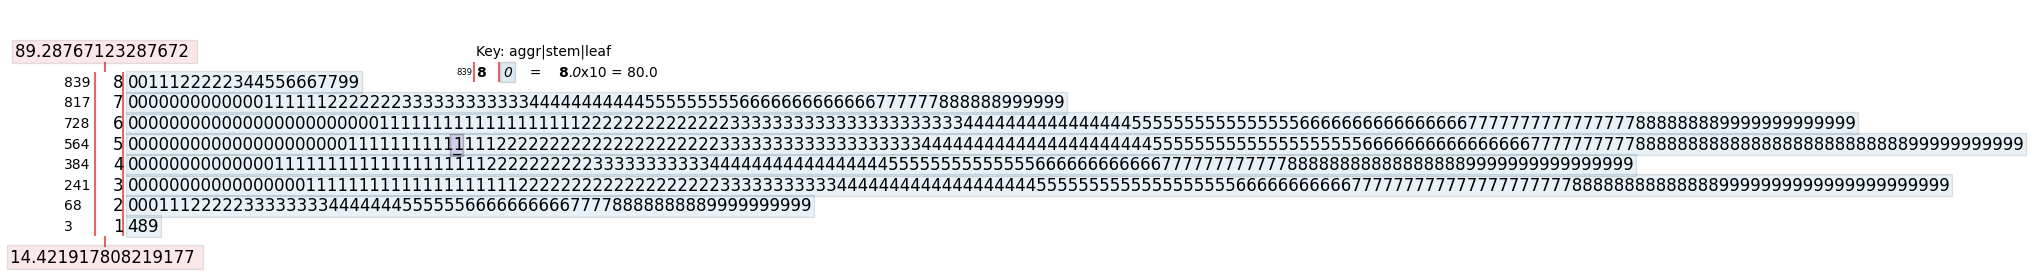

In [ ]:
data = df['Age_at_diagnosis'].tolist()
# Creamos el diagrama de tallo y hojas
stemgraphic.stem_graphic(data, scale=10)

Según la estructura de este gráfico, podemos deducir que los datos presentan una distribución que, a primera vista, sugiere una aproximación a una distribución normal, caracterizada por su simetría y campana central. No obstante, al observar más detenidamente, se detecta una asimetría hacia la izquierda, lo que indica que hay una mayor concentración de casos en edades superiores al promedio.

#### **CUARTILES**

Los cuartiles son una herramienta estadística que divide un conjunto de datos en cuatro partes iguales, cada una con un porcentaje específico de los datos por debajo de ella, lo que nos ayuda a entender la distribución de estos datos.

En el siguiente fragmento de código, se calculan los cuartiles para la variable 'Age_at_diagnosis'. El primer cuartil (Q1) indica el valor por debajo del cual se encuentra el 25% de los datos, el segundo cuartil (Q2) es la mediana, que divide el conjunto de datos en una mitad inferior y una superior, el tercer cuartil (Q3) indica el valor por debajo del cual se encuentra el 75% de los datos, y el cuarto cuartil (Q4) corresponde al valor máximo en el conjunto de datos.

Una vez que se han calculado los cuartiles, el código procede a categorizar cada observación basándose en estos puntos de corte, lo que resulta útil para análisis agrupados y para visualizar las diferencias entre las distintas categorías de edad.

In [ ]:
# Asumiendo que df es tu DataFrame y que 'Age_at_diagnosis' es una columna en df
sorted_data = df['Age_at_diagnosis'].sort_values()

# Uso de quantile para calcular los cuartiles
Q1 = sorted_data.quantile(0.25)
Q2 = sorted_data.quantile(0.5)  # Esto es equivalente a la mediana
Q3 = sorted_data.quantile(0.75)


# Categorización basada en cuartiles
df['age_at_diagnosis_categorized'] = pd.cut(df['Age_at_diagnosis'],
                                             bins=[-float('inf'), Q1, Q2, Q3, float('inf')],
                                             labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Imprimir los cuartiles
print(f"Q1 (25th percentile): {Q1}")
print(f"Q2 (50th percentile, Median): {Q2}")
print(f"Q3 (75th percentile): {Q3}")

df.head(3)

Q1 (25th percentile): 38.05068493150685
Q2 (50th percentile, Median): 51.55068493150685
Q3 (75th percentile): 62.8


Grade   Project       Case_ID Gender  Age_at_diagnosis  \
0   LGG  TCGA-LGG  TCGA-DU-8164   Male         51.295890   
1   LGG  TCGA-LGG  TCGA-QH-A6CY   Male         38.715068   
2   LGG  TCGA-LGG  TCGA-HW-A5KM   Male         35.169863   

        Primary_Diagnosis   Race     IDH1         TP53         ATRX  ...  \
0  Oligodendroglioma, NOS  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
1            Mixed glioma  white  MUTATED  NOT_MUTATED  NOT_MUTATED  ...   
2        Astrocytoma, NOS  white  MUTATED      MUTATED      MUTATED  ...   

           RB1       NOTCH1         BCOR        CSMD3      SMARCA4  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

        GRIN2A         IDH2         FAT4       PDGFRA  \
0  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
1  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   
2  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED  NOT_MUTATED   

  age_at_diagnosis_categorized  
0                           Q2  
1                           Q2  
2                           Q1  

[3 rows x 28 columns]

Una vez generado el nuevo atributo age_at_diagnosis_categorized con las distintas edades dividas en cuartiles procedemos a eliminar el atributo Age_at_diagnosis.

In [ ]:
df = df.drop('Age_at_diagnosis', axis=1)

###**TÉCNICAS DE SELECCIÓN**

Se eliminan a continuación dos atributos.

Eliminamos Project ya que es redundante con respecto a Grade, ya que el prefijo 'TCGA-' no aporta información adicional que sea relevante para la clasificación.

Además eliminamos Case_ID por ser un atributo irrelevante para nuestra tarea de clasificación.

In [ ]:
df = df.drop('Project', axis=1)
df = df.drop('Case_ID', axis=1)

###**VISUALIZACIÓN DE DATOS**

####**DISTRIBUCIÓN VARIABLES CATEGÓRICAS**

La función plot_categorical_distribution facilita la visualización de la distribución de datos categóricos. Al representar gráficamente la proporción de cada categoría en forma de gráficos de tarta, permite obtener una imagen clara de la distribución de atributos categóricos.

In [ ]:
def plot_categorical_distribution(df, columns=None):
    """
    Esta función crea gráficos de tarta para las columnas categóricas de un DataFrame.

    Parámetros:
    - df: DataFrame de pandas.
    - columns: Lista de columnas categóricas a visualizar. Si es None, la función utilizará todas las columnas de tipo 'object'.
    """

    # Si no se especifican columnas, utiliza todas las columnas categóricas
    if columns is None:
        columns = df.select_dtypes(include=['object']).columns.tolist()

    # Calcula cuántas filas necesitamos para el subplot
    n_rows = int(np.ceil(len(columns) / 3))

    # Configura la figura de matplotlib
    fig, axs = plt.subplots(n_rows, 3, figsize=(20, 5 * n_rows))  # Ajusta el tamaño según sea necesario
    axs = axs.flatten()  # Aplana el array de axs para facilitar su uso en el bucle

    # Crea un gráfico de tarta para cada columna categórica
    for i, column in enumerate(columns):
        if column in df.columns:
            counts = df[column].value_counts()
            axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
            axs[i].set_title(f'Distribución de {column}')
            axs[i].axis('equal')  # Para que el gráfico de tarta sea circular
        else:
            axs[i].axis('off')  # Oculta el subplot si la columna no existe

    # Esconde los subplots extra si los hay
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()  # Ajusta el layout
    plt.show()  # Muestra la figura


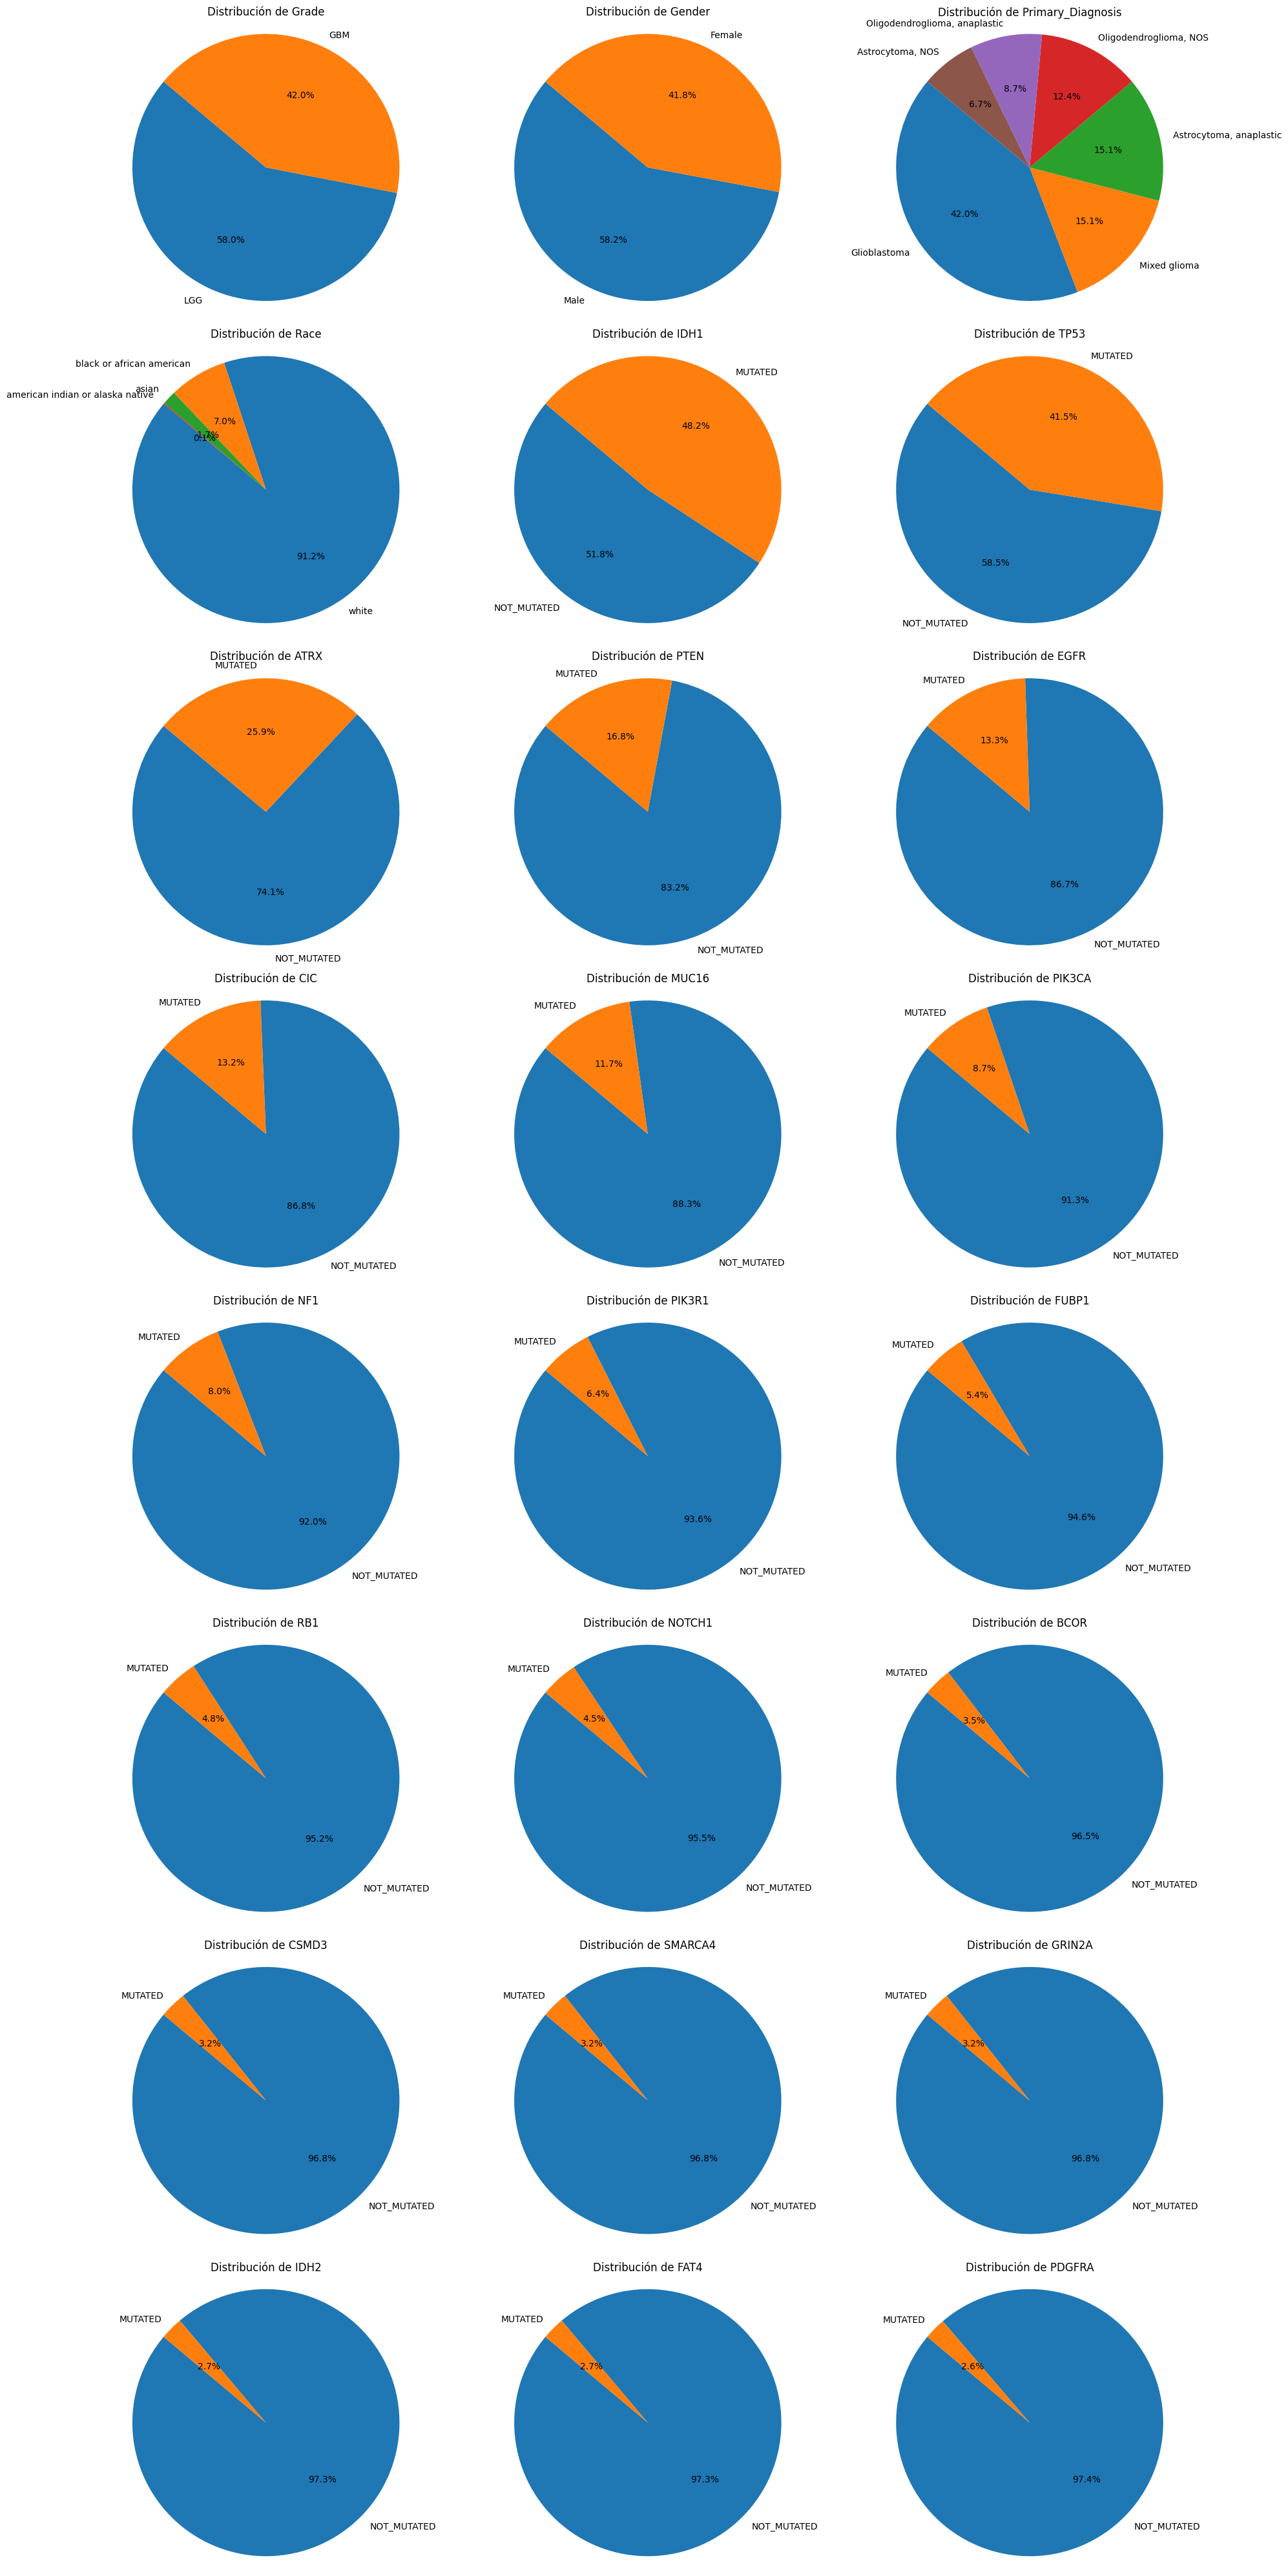

In [ ]:
plot_categorical_distribution(df)


- Distribución de Grade: El gráfico muestra una división casi equilibrada entre GBM y LGG, aunque GBM (Glioblastoma Multiforme) es ligeramente menos prevalente que LGG (Glioma de bajo grado). Esto sugiere que la variable objetivo está razonablemente balanceada, lo que es favorable para la modelización, ya que no hay una sobrerrepresentación significativa de ninguna categoría.

- Distribución de Race: Hay un claro desequilibrio racial en los datos, con una predominancia de individuos identificados como blancos, lo que constituye más del 90% de las muestras. Las minorías étnicas están subrepresentadas, lo cual podría afectar la generalización del modelo en poblaciones diversas y podría ser un área de enfoque para mejorar la equidad del modelo.

- Distribución de Gender: La distribución de género muestra una pequeña diferencia entre hombres (58.2%) y mujeres (41.8%). Aunque no está perfectamente equilibrada, la diferencia no es tan pronunciada y probablemente no sesgará significativamente los modelos predictivos.

- Distribución de Primary_Diagnosis: Se observa una diversidad en las categorías de diagnósticos primarios, con "Glioblastoma" como el diagnóstico más frecuente (42.0%), seguido por "Astrocytoma, anaplastic" y "Mixed glioma" con una frecuencia similar (ambos alrededor del 15%). Otras categorías como "Astrocytoma, NOS", "Oligodendroglioma, NOS" y "Oligodendroglioma, anaplastic" son menos comunes. Esta distribución desequilibrada puede influir en la capacidad del modelo para predecir correctamente las categorías menos representadas.

- Distribución de IDH1 y TP53: Para los genes IDH1 y TP53, las categorías "MUTATED" y "NOT_MUTATED" están casi igualmente distribuidas, con una ligera mayoría en la categoría "NOT_MUTATED". Esta distribución cercana al equilibrio es beneficiosa para el entrenamiento de modelos predictivos, ya que cada clase tiene suficientes datos para que el modelo aprenda de ellos.

- Distribución de ATRX: Aproximadamente un cuarto de los casos muestran mutación, lo que sugiere una presencia notable pero no predominante de esta variante genética.


- PTEN: Alrededor de un sexto de los casos tienen mutaciones en PTEN, lo que indica que estas no son raras, pero tampoco son el resultado más común.


- Distribución de EGFR: Las mutaciones en EGFR están presentes en una pequeña proporción (alrededor del 13%), lo que indica que la mayoría de los casos no involucran mutaciones en este gen.


- Distribución de CIC y MUC16: Ambos genes muestran una prevalencia de mutaciones ligeramente más alta que EGFR, pero aún así la mayoría de los casos son no mutados.


- Distribución de PIK3CA: Solo una pequeña fracción muestra mutaciones, sugiriendo que la mayoría de los casos no involucran alteraciones en este gen.


- Distribución de NF1, PIK3R1 y FUBP1: Estos genes tienen las tasas más bajas de mutaciones en los datos presentados, indicando que las mutaciones son relativamente raras para estos genes dentro de la población estudiada.

- Distribución de RB1, NOTCH1, BCOR, CSMD3, SMARCA4, GRIN2A, IDH2, FAT4, PDGFRA: Para todos estos genes, las mutaciones son poco comunes dentro del conjunto de datos. Este patrón indica que la presencia de mutaciones en estos genes es una ocurrencia rara.

####**MATRIZ CORRELACIÓN GENES**

A continuación, se generará una **matriz de correlación** de los genes con el fin de explorar las relaciones entre estos atributos. Este análisis es **para identificar posibles redundancias genéticas**, donde ciertos genes podrían estar mostrando patrones de mutación similares. Descubrir correlaciones fuertes nos permitirá comprender mejor si hay genes que representan información superpuesta, lo que **podría justificar su eliminación para optimizar el conjunto de características y mejorar la eficiencia y precisión de los modelos predictivos que se realizarán a continuación**.








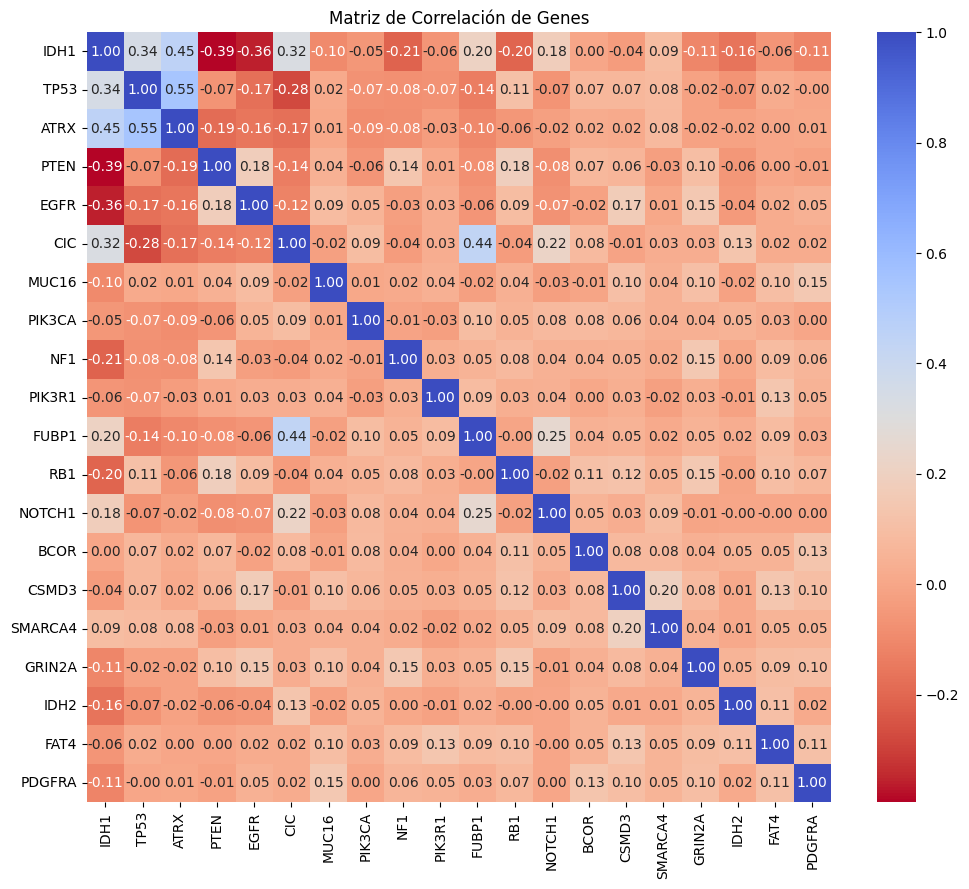

In [ ]:
genes = ['IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA', 'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4', 'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA']

def plot_gene_correlation_matrix(df, genes):
    """
    Esta función calcula y muestra la matriz de correlación para un conjunto dado de genes en un DataFrame.

    Parámetros:
    - df: DataFrame de pandas que contiene los datos.
    - genes: Lista de genes (columnas en el DataFrame) para calcular la matriz de correlación.
    """
    # Crear una copia del DataFrame para mantener los datos originales intactos
    df_encoded = df.copy()

    # Codificar las variables en la copia del DataFrame
    for gene in genes:
        if gene in df_encoded.columns:
            df_encoded[gene] = df_encoded[gene].apply(lambda x: 1 if x == 'MUTATED' else 0)

    # Seleccionar solo las columnas de interés para la correlación en df_encoded
    df_genes = df_encoded[genes]

    # Calcular la matriz de correlación
    correlation_matrix = df_genes.corr()

    # Visualizar la matriz de correlación
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm_r')
    plt.title('Matriz de Correlación de Genes')
    plt.show()

# Llamar a la función con el DataFrame df y la lista de genes
plot_gene_correlation_matrix(df, genes)




En la sección siguiente, se examinará la posible interdependencia entre los genes TP53, FUBP1, PTEN, EGFR, CIC, IDH1 y ATRX, que según la matriz de correlación mostrada, presentan cierto grado de correlación, aunque no sea extremadamente alto. Para evaluar el impacto de esta correlación en la efectividad del modelo, se considerará la eliminación de estas variables para determinar si su exclusión puede incrementar la precisión del modelo predictivo.

####**TABLA DE CONTINGENCIA ENTRE GRADE Y PRIMARY DIAGNOSIS**

A continuación se realiza una tabla de contingencia que cruza las variables Grade y Primary_Diagnosis.



In [ ]:
contingency_table = pd.crosstab(df['Grade'], df['Primary_Diagnosis'])
print(contingency_table)


Primary_Diagnosis  Astrocytoma, NOS  Astrocytoma, anaplastic  Glioblastoma  \
Grade                                                                        
GBM                               0                        0           352   
LGG                              56                      127             0   

Primary_Diagnosis  Mixed glioma  Oligodendroglioma, NOS  \
Grade                                                     
GBM                           0                       0   
LGG                         127                     104   

Primary_Diagnosis  Oligodendroglioma, anaplastic  
Grade                                             
GBM                                            0  
LGG                                           73  


A partir de la siguiente tabla se pueden llegar a las siguientes conclusiones:

**Todos** los casos etiquetados como **Glioblastoma** en la variable **Primary_Diagnosis** corresponden al grado **GBM** y **no** hay casos de **Glioblastoma** que correspondan al grado **LGG**. Esto es **coherente con la definición de glioblastoma** como un tumor de alto grado.

Los **diagnósticos primarios Astrocytoma, NOS y Oligodendroglioma, anaplastic** se asocian únicamente con el grado **LGG.** No hay casos de estos diagnósticos asociados con GBM, lo que nos indica que aunque pensásemos lo contrario al investigar la bbdd,  **Oligodendroglioma, anaplastic se considera de bajo grado en este conjunto de datos.**

**Mixed glioma y Oligodendroglioma, NOS** se presentan también exclusivamente en casos de **LGG**.

No hay ninguna superposición entre los grados GBM y LGG para los diagnósticos primarios, lo que indica que hay una clara distinción en este conjunto de datos entre los tipos de tumores y su grado de agresividad.

Como existe una **correspondencia entre Grade y Primary_Diagnosis**, entonces una variable determina perfectamente a la otra. Esto significa que **si conoces el diagnóstico primario, ya conoces el grado y no hay nada que "predecir" en el sentido estadístico.** Además, a la hora de predecir Primary Diagnosis considerando Grade el Gliobastoma se acertaría por definición con una probabilidad del 100% ( ya que el total de registros GBM corresponden al diagnóstico primario Gliobastoma ) , lo que sería un modelo predictivo inadecuado.

Un modelo predictivo que intentara, por ejemplo, predecir Grade a partir de Primary_Diagnosis, solo estaría memorizando la relación hecha por definición, en lugar de generalizar a partir de patrones.

Es por esto por lo que en el siguiente apartado para predecir Grade excluiremos Primary Diagnosis y viceversa.

##**2) Crea el clasificador e indica su error. Úsalo para saber a qué clase corresponden al menos 10 clientes que no hayas usado para entrenar los modelos.**

**CLASIFICADOR NAÏVE BAYES**

**Probabilidad de clasificar un vector de atributos en una clase.**

Este clasificador se basa en el Teorema de Bayes sobre la probabilidad condicionada.

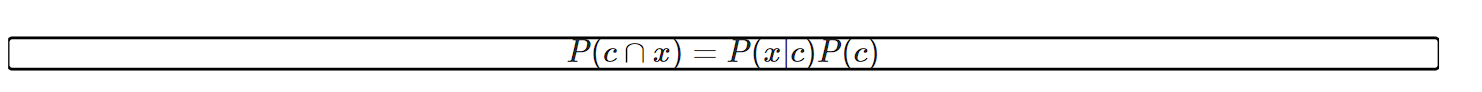

Por lo tanto,

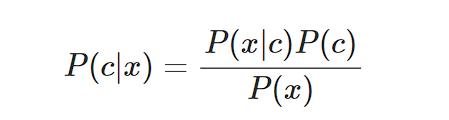

Donde:

P(x|c): verosimilitud (likelihood).

P(c|x): probabilidad a posteriori de la clase (posterior).

P(c): probabilidad a priori de la clase.

P(x): verosimilitud marginal (o probabilidad a priori del vector de atributos).

Se tomará aquella clase cuya probabilidad a posteriori es mayor.

Es decir, aquella clase c cuya P(c|x) sea máxima.



**SUPOSICIÓN NAÏVE**

La suposición naïve (o ingenua) es que cada atributo de un conjunto de datos es independiente de los demás atributos, dado que la clase es conocida.

Esto significa que si tienes una serie de atributos o características (por ejemplo, color, tamaño, forma) que describen una instancia (como una fruta), la probabilidad de que la fruta sea una manzana dado que tiene un color rojo no está relacionada con la probabilidad de que sea una manzana dado su tamaño o su forma.

Matemáticamente, la probabilidad de que una instancia pertenezca a una clase específica se calcula multiplicando la probabilidad de cada atributo individual dado que pertenece a esa clase. Si se consideran n atributos, la probabilidad conjunta es el producto de las n probabilidades individuales.

**VENTAJAS Y DESVENTAJAS.**

**Ventajas**:

- **Simplicidad**: Naive-Bayes es conocido por su enfoque directo y fácil implementación.

- **Eficiencia**: Típicamente, es rápido y eficaz, lo que lo hace ideal para modelos en tiempo real.

- **Robustez ante datos con ruido:** Puede manejar datos imperfectos y sigue siendo efectivo incluso cuando los datos contienen errores.

- **Menos datos necesarios:** No requiere tantos datos para el entrenamiento en comparación con otros algoritmos más complejos.

- **Probabilidades de predicción:** Ofrece estimaciones probabilísticas claras para las predicciones, lo que puede ser útil para la toma de decisiones basada en umbral.

**Desventajas:**

- **Suposición de independencia:** Naive-Bayes asume que todos los atributos son independientes entre sí, lo cual a menudo no es cierto en datos reales.

- **Rendimiento con atributos numéricos:** Puede no funcionar bien si el modelo depende de una gran cantidad de atributos numéricos, especialmente si estos están correlacionados.

- **Confianza en la clasificación:** Se debe tener en cuenta que las probabilidades estimadas no siempre reflejan la verdadera credibilidad y deben usarse con cautela. Es decir, la predicción de la clase (el resultado más probable) suele ser más fiable que el valor numérico exacto de la probabilidad estimada.

Ahora, se utiliza el clasificador para predecir primero el grado del tumor, es decir, si es GBM (más agresivo) , o LGG (menos agresivo) y segundo, se utilizará este mismo para saber el diagnóstico primario, es decir el tipo específico del tumor.

Se usará el clasificador de skicit-learn CategoricalNB el cual cuenta con los siguientes parámetros.

- **alpha (float, default=1.0):**
Este es el parámetro de suavizado aditivo (suavizado de Laplace/Lidstone). Es útil para manejar el problema de la probabilidad cero en las predicciones cuando un valor de categoría no aparece en los datos de entrenamiento.
Establecer alpha=0 y force_alpha=True permite desactivar el suavizado.
- **force_alpha (bool, default=True):**
Este parámetro controla el comportamiento de alpha cuando su valor es extremadamente bajo (menos de 1e-10). Si es False, y alpha es menor que 1e-10, automáticamente establecerá alpha a 1e-10 para evitar errores numéricos. Si es True, el valor de alpha permanecerá sin cambios, independientemente de lo pequeño que sea.
- **fit_prior (bool, default=True):**
Determina si se deben aprender las probabilidades a priori de las clases a partir de los datos. Si se establece en False, se utiliza una distribución uniforme para las probabilidades a priori, lo cual es útil en situaciones donde las clases son igualmente probables.
- **class_prior (array-like of shape (n_classes,), default=None):**
Permite especificar manualmente las probabilidades a priori de las clases. Si se proporcionan, estas probabilidades no se ajustarán según los datos, lo cual es útil si ya tienes conocimiento previo sobre las probabilidades de las clases.
- **min_categories (int or array-like of shape (n_features,), default=None):**
Especifica el número mínimo de categorías por característica, lo cual es importante para asegurarse de que todas las características tengan suficientes categorías para el modelado estadístico.
Si es un entero, establece un mínimo uniforme de categorías para todas las características.
Si es un array-like, permite especificar un mínimo diferente para cada característica.
Si es None, el número de categorías se determina automáticamente a partir de los datos de entrenamiento.

###**CLASIFICADOR PARA CLASE GRADE**

El siguiente código inicia con la preparación de los datos, donde selecciona las características relevantes y la variable objetivo, seguido de la codificación de variables categóricas para convertirlas en un formato numérico adecuado para el modelo. Luego, los datos se dividen en conjuntos de entrenamiento y prueba para permitir una evaluación imparcial del modelo. Posteriormente, el modelo se entrena con el conjunto de entrenamiento y se evalúa su precisión en el conjunto de prueba.

En este caso la mejor precisión obtenida es con un modelo en el que las características cuentan con la ausencia de dos genes que previamente en la matriz de correlación se explicó que podríamos pobrar a eliminar. La modificación de los parámetros de CategoricalNB ha supuesto un decaimiento de la precisón por lo que se mantiene este clasificador con los parámetros por defecto.

In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop(['Grade','Primary_Diagnosis', 'TP53', 'CIC'], axis=1)
y = df['Grade']

# Codificar las variables categóricas
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=36)

# Inicializar el clasificador Naive Bayes Categórico
clf = CategoricalNB()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9226190476190477


Ahora se prueba el clasificador para predecir a que clase pertenecen 10 clientes del conjunto de prueba.

In [ ]:
# Seleccionar 10 muestras aleatorias del conjunto de prueba
X_test_sample = X_test.sample(10, random_state=36)
y_test_sample = y_test.loc[X_test_sample.index]

# Realizar predicciones con el clasificador
y_pred_sample = clf.predict(X_test_sample)

# Comparar las predicciones con los valores verdaderos
comparison = pd.DataFrame({'Real': y_test_sample, 'Predicción': y_pred_sample})
print(comparison)

# Calcular la precisión para las 30 muestras seleccionadas
sample_accuracy = accuracy_score(y_test_sample, y_pred_sample)
print("Precisión de la muestra:", sample_accuracy)

    Real Predicción
563  GBM        GBM
615  GBM        GBM
664  GBM        GBM
313  LGG        LGG
303  LGG        LGG
267  LGG        LGG
558  GBM        GBM
123  LGG        LGG
512  GBM        GBM
603  GBM        GBM
Precisión de la muestra: 1.0


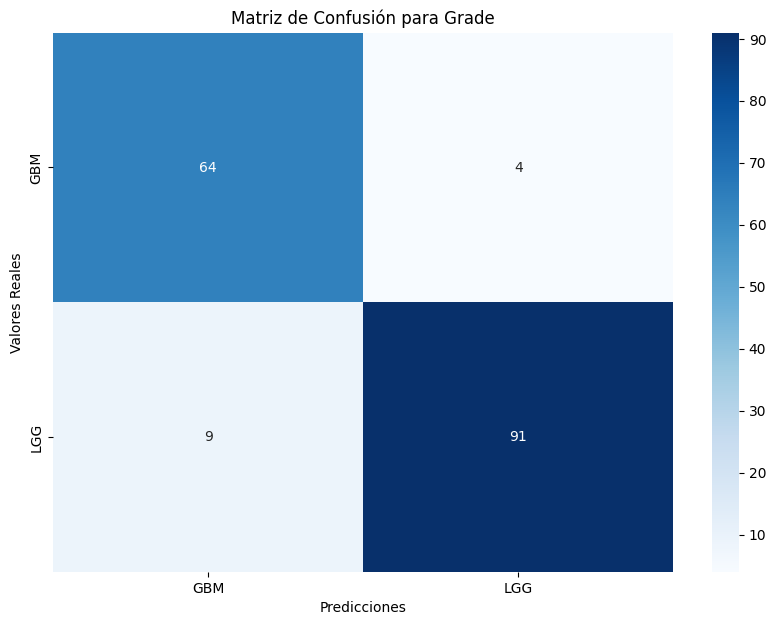

In [ ]:
# Realizar predicciones en el conjunto de prueba completo
y_pred_full = clf.predict(X_test)

# Crear la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred_full)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión para Grade')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


La matriz de confusión indica que el modelo tiene un buen rendimiento general, con altas tasas de identificación correcta tanto para GBM (Glioblastoma Multiforme) como para LGG (Glioma de bajo grado). Específicamente, el modelo tiene una tasa de acierto ligeramente mayor para GBM en comparación con LGG, indicando una sensibilidad superior para la clase GBM.

Con 64 verdaderos positivos frente a 4 falsos negativos para GBM, el modelo muestra una fuerte capacidad para detectar esta condición más agresiva, lo que es clínicamente significativo ya que los GBM requieren una identificación rápida y precisa debido a su naturaleza de rápido crecimiento y su tratamiento más intensivo.

###**CLASIFICADOR PARA DIAGNÓSTICO PRIMARIO**

A continuación se crea un clasificador para predecir el tipo específico de tumor que un paciente tiene.

Se han implementado varias funciones y técnicas para actuar ante el desbalanceo de clases (como SMOTE) que no han supuesto una mejoría ni con este ni con el anterior clasificador, pero solo hemos reflejado aquellos modelos que obtienen la mejor precisión con datos de test.

Para ayudar a la clasificación se han creado nuevas variables de apoyo a partir de los datos de los que se disponen. Estas variables muestran relaciones mas complejas las cuales pueden ser buenas herramientas a tomar en cuenta a la hora de realizar la clasificación.

La primera variable lo que busca es unificar las clases dentro de la variable objetivo en parejas óptimas. De esta forma se creara un clasificador bayesiano empleando los datos de train para predecir a que pareja se pertenece, tomando el valor de esta clasificación como la nueva variable. Las parejas óptimas seleccionadas de manera heurística son 'Astrocytoma, NOS' + 'Oligodendroglioma, NOS' ,  'Astrocytoma, anaplastic' + 'Oligodendroglioma, anaplastic' , y 'Glioblastoma' + 'Mixed glioma'. Por lo que se crea la funcion ```unificar_tumores``` para formar estas nuevas categorias



In [ ]:
# Función para unificar los tipos de tumores
def unificar_tumores(tipo):
    if 'NOS' in tipo:
        return 'NOS'
    elif 'anaplastic' in tipo:
        return 'anaplastic'
    elif 'Mixed glioma' in tipo:
      return 'Glioblastoma'
    else:
        return tipo

La siguiente variable a emplear como apoyo hace referencia al número de genes mutados que posee el individuo. Para ello se crea la función ```count_mutated``` que se encarga del conteo, y posteriormente ```unificar_conteos``` los convierte a categorico para un mejor procesamiento del clasificador. Las categorias son 'Muchos' si proceden mas de 4 mutaciones o 'Pocos' si no.

In [ ]:
def count_mutated(row):
    return sum(1 for word in row if re.search(r'\bMUTATED\b', word))

# Función para unificar los conteos
def unificar_conteos(tipo):
    if tipo > 4: # 4
        return 'Muchos'
    else:
        return 'Pocos'

A continuación, se siguen los siguientes pasos hasta llegar a la precisión obtenida con nuestro modelo-

Los datos se dividen en características (X) y la variable objetivo (y). Se excluyen las columnas 'Grade' y 'Primary_Diagnosis' de las características, y se utiliza 'Primary_Diagnosis' como variable objetivo.


Se añade un atributo denominado 'Conteo' a las características X. Este atributo clasifica cada muestra según el número de genes mutados, siendo 'MUCHOS' si hay más de cuatro genes mutados y 'POCOS' si hay menos.


Usando un clasificador Naive Bayes Categórico, se realizan las predicciones de unificar_tumores (los diagnósticos primarios unificados por parejas) basados en las características iniciales codificadas. Esta predicción se añade posteriormente a las características X.

Después, se entrena el modelo con las características X y se predice el diagnóstico primario.



In [ ]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop(['Grade', 'Primary_Diagnosis'], axis=1)
X['Conteo'] = X.apply(count_mutated, axis=1).apply(unificar_conteos)
y = df['Primary_Diagnosis'].apply(unificar_tumores)

#print(X)

# Codificar las variables categóricas
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Inicializar el clasificador Naive Bayes Categórico
clf = CategoricalNB()

# Entrenar el modelo
clf.fit(X_encoded, y)

# Dividir los datos en características (X) y variable objetivo (y)
X['Predicted_Primary_Diagnosis'] = clf.predict(X_encoded)
y = df['Primary_Diagnosis']

#print(X)

# Codificar las variables categóricas
encoder = LabelEncoder()
X_encoded = X.apply(encoder.fit_transform)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Inicializar el clasificador Naive Bayes Categórico
clf = CategoricalNB()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6309523809523809


Se obtiene una precisión del 63% para los datos de test. Es decir, aproximadamente 6 de cada 10 tumores son predichos de manera correcta en base a la información proporcionada gracias a las características X.

Ahora, se analiza como se comporta nuestro clasificador para ver a qué clase corresponden al 30 clientes que no se han usado para entrenar el modelo.

In [ ]:
X_test_sample = X_test.sample(30, random_state=36)
y_test_sample = y_test.loc[X_test_sample.index]

# Realizar predicciones con el clasificador
y_pred_sample = clf.predict(X_test_sample)

# Comparar las predicciones con los valores verdaderos
comparison = pd.DataFrame({'Real': y_test_sample, 'Predicción': y_pred_sample})
print(comparison)

# Calcular la precisión para las 30 muestras seleccionadas
sample_accuracy = accuracy_score(y_test_sample, y_pred_sample)
print("Precisión de la muestra:", sample_accuracy)

                              Real                     Predicción
195  Oligodendroglioma, anaplastic         Oligodendroglioma, NOS
858                   Glioblastoma                   Glioblastoma
359         Oligodendroglioma, NOS         Oligodendroglioma, NOS
177        Astrocytoma, anaplastic                   Glioblastoma
696                   Glioblastoma                   Glioblastoma
236         Oligodendroglioma, NOS         Oligodendroglioma, NOS
815                   Glioblastoma                   Glioblastoma
64                Astrocytoma, NOS        Astrocytoma, anaplastic
55   Oligodendroglioma, anaplastic  Oligodendroglioma, anaplastic
581                   Glioblastoma                   Glioblastoma
506                   Glioblastoma                   Glioblastoma
434         Oligodendroglioma, NOS         Oligodendroglioma, NOS
499                   Glioblastoma                   Glioblastoma
796                   Glioblastoma                   Glioblastoma
653       

Para poder hacer conclusiones más firmes, se imprime la matriz de confusión de nuestro modelo con los datos de test.

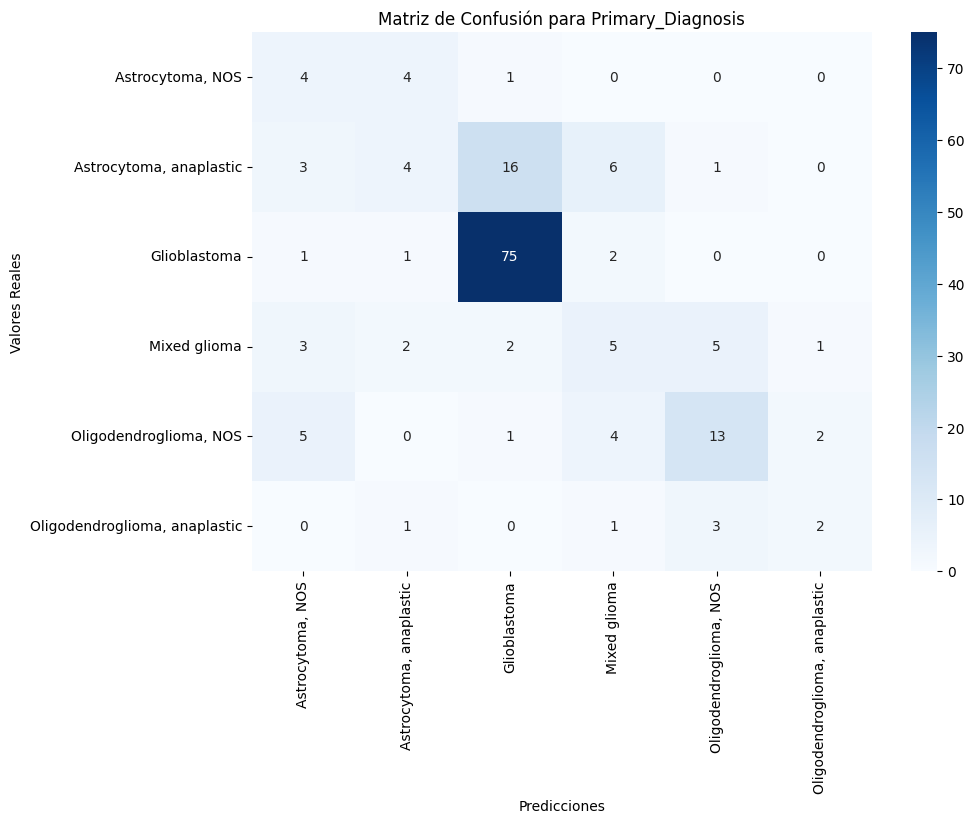

In [ ]:
# Realizar predicciones en el conjunto de prueba completo
y_pred_full = clf.predict(X_test)

# Crear la matriz de confusión
confusion_mat = confusion_matrix(y_test, y_pred_full)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Matriz de Confusión para Primary_Diagnosis')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()


Se puede contemplar que el tumor Astrocytoma , anaplastic es pedricho de manerra errónea un número significativo de veces (16) como Gliobastoma. Esto puede deberse a que el modelo tiene un sesgo hacia Gliobastoma ya que las distribuciones de los valores del atributo Diagnóstico primario están muy desiquilibrados.

Biologicamente, los glioblastomas son una forma de astrocytoma. Específicamente, son la forma más agresiva y de mayor grado. Esto significa que los glioblastomas y los astrocytomas anaplásicos pueden compartir características histológicas que los hacen difíciles de diferenciar. Las imágenes por resonancia magnética (MRI), los patrones de crecimiento y la expresión genética pueden superponerse entre estos dos tipos de tumores, lo que añade complejidad a la tarea de diferenciación y puede confundir al modelo si estos factores no se representan adecuadamente en las características utilizadas para la predicción.

# **Ejercicio 3**

El malware, abreviatura de "software malicioso", es cualquier código de software o programa informático escrito de manera intencionada para dañar un sistema informático o a sus usuarios. Casi todos los ciberataques modernos implican algún tipo de malware. Estos programas maliciosos pueden adoptar muchas formas, desde el costos y muy dañino ransomware hasta adware meramente molesto, dependiendo de lo que pretendan hacer los ciberdelincuentes.

El problema consiste en la identificación y clasificación de 4 tipos de malware a partir de imágenes.


## **Cargar imagenes**

Cargamos los datos desde un archivo ZIP que se deberá haber subido a tu Google Drive previamente, después debes asegurarte de indicar la ruta correcta donde se encuentra el archivo ZIP. Si el archivo está ubicado en la carpeta principal del Drive, la ruta será /content/drive/My Drive/. Si el archivo se encuentra dentro de una carpeta específica en tu Drive, deberás incluir el nombre de esta carpeta en la ruta, seguido por el nombre del archivo ZIP.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip "/content/drive/My Drive/Malware.zip" -d "/content/datasets/"

Archive:  /content/drive/My Drive/Malware.zip
replace /content/datasets/Malware/Agent.FYI/0002c75d65724084ec4e30695248f44b.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

**Carga y organización de imágenes y etiquetas**

Se carga y organiza las imágenes de malware a partir de una estructura de carpetas específica, preparando los datos para su posterior análisis y entrenamiento de un modelo de Support Vector Machine. Enfocado en cuatro clases de malware específicas: 'Agent.FYI', 'Fakerean', 'Lolyda.AA1' y 'Yuner.A', todas almacenadas bajo el directorio /content/datasets/Malware, con cada clase de malware ubicada en su respectiva subcarpeta.

In [ ]:
from torchvision.datasets import ImageFolder
import os
from PIL import Image
import matplotlib.pyplot as plt


clases_Malware = ['Agent.FYI', 'Fakerean', 'Lolyda.AA1', 'Yuner.A']

dir_path = '/content/datasets/Malware'


etiquetas = []
imagenes = []
num_imagenes = []

for clase in clases_Malware:
  auxImg = os.path.join(dir_path, clase)

  # Almacena las imagenes en un formato bueno
  auxImagenesPNG = [img for img in os.listdir(auxImg) if img.endswith('.png')]

  imagenesOpen = []
  for i in range(len(auxImagenesPNG)):
    # Cargar la primera imagen PNG
    image_path = os.path.join(auxImg, auxImagenesPNG[i])
    auxOpen = Image.open(image_path)
    imagenesOpen.append(auxOpen)

  # Almacena las etiquetas en una lista
  cantidad_img = len(imagenesOpen)
  aux = [clase]*cantidad_img

  etiquetas = etiquetas + aux

  num_imagenes = num_imagenes + [cantidad_img]
  imagenes.extend(imagenesOpen)

### **Comprobación de carga de imágenes**

**Comprobamos dimensiones de los vectores**

Para asegurarnos de que la carga de imágenes ha sido exitosa, comprobaremos que el número de etiquetas coincide con el número de imágenes. Esto es crucial para garantizar que cada imagen tiene asignada correctamente su respectiva etiqueta.

In [ ]:
print(f'Hay {len(etiquetas)} etiquetas')
print(f'Hay {len(imagenes)} etiquetas')

Hay 465 etiquetas
Hay 465 etiquetas


**Distribución de clases**

Hemos observado que el conjunto de imágenes está desbalanceado, es decir, algunas clases de imágenes están representadas en mayor número que otras. Aunque equilibrar el conjunto de datos eliminando imágenes podría ser una estrategia para resolver este desbalance, hemos decidido no seguir ese camino. La razón principal es que el volumen total de imágenes no es suficientemente grande como para permitirnos descartar datos sin comprometer la riqueza y diversidad del conjunto, lo cual podría ser crucial para el entrenamiento efectivo de modelos de aprendizaje automático. En su lugar, buscaremos otras estrategias para manejar el desbalance sin eliminar imágenes, con el objetivo de preservar la integridad y maximizar el potencial informativo de nuestro conjunto de datos.

In [ ]:
import plotly.express as px

# Gráfico circular
fig_pie = px.pie(names=clases_Malware, values=num_imagenes, hole=0.4, title="Distribución de las clases")
fig_pie.update_layout(title={'x': 0.5})
fig_pie.show()

# Grafico barras
fig_bar = px.bar(x=clases_Malware, y=num_imagenes, color=clases_Malware)
fig_bar.show()

**Mostramos una imagen**

Mostramos uan imagen y su etiqueta correspondiente de ejemplo, para verificar que las imágenes se han cargado y pueden mostrarse adecuadamente.

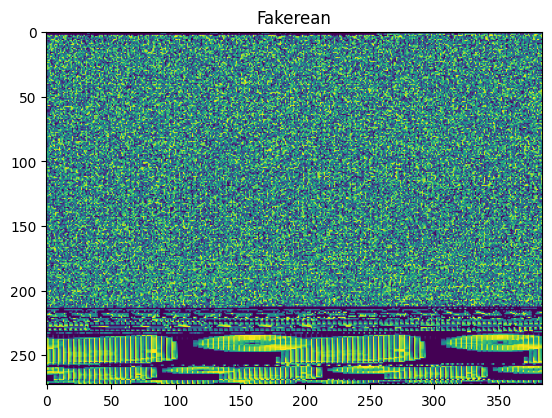

In [ ]:
j = 115
plt.imshow(imagenes[j])
plt.title(etiquetas[j])
plt.show()

**Comprobamos el formato de las imágenes**

Estamos trabajando con imágenes en formato PNG, que se caracterizan por su compresión sin pérdida de calidad, cargadas mediante la  la biblioteca PIL (Python Imaging Library). El modo "L" sugiere que cada imagen está en escala de grises ("L" se refiere a "luminance"), lo cual significa que no contienen información de color, sino variaciones de intensidad de luz entre blanco y negro.

In [ ]:
print(imagenes[j])

<PIL.PngImagePlugin.PngImageFile image mode=L size=384x273 at 0x78AF0BAF04F0>


**Dimensión de las imagenes**

Hemos observado que todas las clases tienen tamaños diferentes, y dentro de cada clase también varían, aunque en menor medida. Para facilitar la creación de arrays y obtener características de manera consistente en el futuro, planeamos redimensionarlos.

In [ ]:
altura = []
anchura = []

for i in imagenes:
  anch, alt = i.size
  altura.append(alt)
  anchura.append(anch)

print(min(altura))
print(sum(altura)/len(altura))
print(max(altura))

print(min(anchura))
print(sum(anchura)/len(anchura))
print(max(anchura))

208
479.39569892473116
683
64
366.52043010752686
768


## **División del conjunto de datos**


Una vez establecido el protocolo de evaluación, creamos los diferentes conjuntos de datos a emplear, siendo estos los datos de entrenamiento (80%), y los de test (20%). Menos 10 imágenes que se reservarán para predicciones.

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
img_train, img_aux, lab_train, lab_aux = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)
img_test, img_pred, lab_test, lab_pred = train_test_split(img_aux, lab_aux, test_size=0.1, random_state=42)

**Comprobación de la distribución**

Comprobamos que la distribución sigue siendo bastante desigual pero que no ha empeorando tras la división.

In [ ]:
from collections import Counter

# Contar el número de etiquetas en cada conjunto
train_label_counts = Counter(lab_train)
test_label_counts = Counter(lab_test)
pred_label_counts = Counter(lab_pred)

# Imprimir los resultados
print("Recuento de etiquetas en el conjunto de entrenamiento:")
print(train_label_counts)
print("\nRecuento de etiquetas en el conjunto de prueba:")
print(test_label_counts)
print("\nRecuento de etiquetas en el conjunto de predicción:")
print(pred_label_counts)

Recuento de etiquetas en el conjunto de entrenamiento:
Counter({'Lolyda.AA1': 144, 'Yuner.A': 131, 'Agent.FYI': 51, 'Fakerean': 46})

Recuento de etiquetas en el conjunto de prueba:
Counter({'Yuner.A': 38, 'Lolyda.AA1': 20, 'Fakerean': 13, 'Agent.FYI': 12})

Recuento de etiquetas en el conjunto de predicción:
Counter({'Yuner.A': 4, 'Lolyda.AA1': 3, 'Agent.FYI': 3})


## **Extracción de características**

La extracción de características es el proceso de transformar una imagen en un conjunto de características que capturan sus características esenciales, como bordes, esquinas, texturas, formas, colores o patrones. Esta técnica se puede utilizar para reducir el ruido y la redundancia en los datos de la imagen, mejorar el contraste y la calidad, simplificar el cálculo y el almacenamiento de la imagen, mejorar el rendimiento y la precisión de las tareas de análisis y reconocimiento de imágenes, así como permitir la comparación y clasificación de imágenes en función de sus características.


Cuando se trata de la extracción de características en el procesamiento de imágenes, no existe una solución única que funcione para todos.  Ya que no solo existen características que capturan información local también global (la cuales serían utilies pero acompañadas de entidades locales).  

Las características que elija deben depender del tipo, la calidad y el propósito de la imagen, así como del método y algoritmo utilizados para la extracción.

- Las entidades basadas en **píxeles** utilizan los valores de intensidad o color de píxeles individuales o regiones de píxeles.
- Las entidades basadas en **bordes** detectan límites y contornos de objetos o regiones.
- Las entidades basadas en **esquinas** localizan puntos donde se encuentran dos o más bordes.
- Las entidades basadas en **texturas** miden la variación y distribución de los valores de píxeles.
- Las entidades basadas en **formas** describen la geometría y topología de objetos o regiones.
- Las entidades basadas en el **color** capturan el tono, la saturación y el brillo.
- Las entidades basadas en **patrones** identifican la repetición y la regularidad de los valores de píxeles.

Tras un estudio exhaustivo de las imágenes y la comprensión de que cada imagen tiene cuatro partes importantes (text, rdata, data y rsrc) , cada una con características únicas, hemos decidido optar por **enfoques basados en bordes o texturas**. Los bordes pueden representar características distintivas en las imágenes, como formas y contornos de objetos, lo que los hace útiles para detectar patrones relevantes en las imágenes de malware. Además, las entidades basadas en texturas son prometedoras, ya que pueden capturar patrones de textura en las imágenes de malware, lo que es crucial para distinguir entre diferentes tipos de malware.

### **Histogram of Oriented Gradient (HOG)**

HOG (Histograma de Gradientes Orientados) es un descriptor de características utilizado en visión por computadora y procesamiento de imágenes para la detección de objetos. Funciona contando las ocurrencias de la orientación del gradiente en porciones localizadas de una imagen. Es similar a otros métodos como los histogramas de orientación de bordes y la transformación de características invariante a la escala (SIFT). Sin embargo, HOG se centra en la estructura o forma de un objeto y es más preciso que los descriptores de bordes, ya que utiliza tanto la magnitud como el ángulo del gradiente para calcular las características. En cada región de la imagen, HOG genera histogramas utilizando la magnitud y orientación del gradiente.

In [ ]:
from skimage import color, exposure, io
from skimage.feature import hog
from skimage.transform import resize
import numpy as np

def calcular_hog_imagenes(imagenes):
    descriptores_hog = []  # Para almacenar los descriptores HOG de todas las imágenes

    for imagen in imagenes:
        # Convertir la imagen a un array de NumPy
        imagen_array = np.asarray(imagen)

        # Redimensionar la imagen a las dimensiones deseadas (64x208)
        imagen_resized = resize(imagen_array, (208, 64), anti_aliasing=True)

        # Calcular el descriptor HOG
        descriptor_hog, imagen_hog = hog(imagen_resized, pixels_per_cell=(8, 8),
                                         cells_per_block=(2, 2),
                                         orientations=9,
                                         visualize=True)
        # Almacenar el descriptor HOG
        descriptores_hog.append(descriptor_hog)

    return descriptores_hog, imagen_hog

**Tamaño de las características**

Para entender el tamaño de las características es crucial entender lso hiperparamtros que definene la salida.

1. **pixels_per_cell:** define el tamaño de la celda sobre la cual se calculan los histogramas de gradientes orientados.
2. **cells_per_block:** define el tamaño del bloque en términos del número de celdas. Un bloque es una región más grande que se utiliza para normalizar los histogramas de gradientes orientados.
3. **orientations:** determina el número de orientaciones que se utilizarán al calcular los histogramas de gradientes orientados. Un número más grande nos dará más información pero representará un grna coste computacional.

In [ ]:
descriptores_hog_train, imagen_hog_train  = calcular_hog_imagenes(img_train)
descriptores_hog_test, imagen_hog_test  = calcular_hog_imagenes(img_test)
descriptores_hog_pred, imagen_hog_pred  = calcular_hog_imagenes(img_pred)

In [ ]:
print("Dimensiones de las características HOG:", len(descriptores_hog_train[0]))

Dimensiones de las características HOG: 6300


**Mostramos las características de una imagen**

Representación visual de los gradientes orientados presentes en la imagen después de aplicar el algoritmo HOG. Además, cada imagen está representada por un vector de caracterísitcas con el mismo tamaño para todas.

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning:

Low image data range; displaying image with stretched contrast.



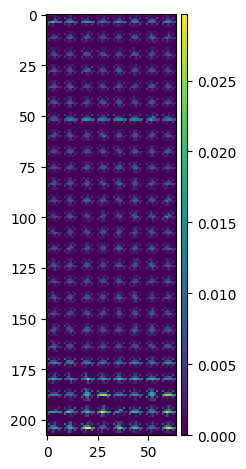

In [ ]:
# Mostrar la utima iamgen
hog_image_rescaled = exposure.rescale_intensity(imagen_hog_train, in_range=(0, 10))
io.imshow(hog_image_rescaled)
io.show()

### **Aleatorizar los datos**

Actualmente, los datos están distribuidos de manera que todos los **elementos de una misma clase están juntos**. Este orden es **poco óptimo** para el entrenamiento, por lo que se **reordenan** las imágenes de **manera aleatoria** para obtener así una mejor distribución.


In [ ]:
def aleatorio(train_images, train_labels):
    ale = list(zip(train_images, train_labels))
    np.random.shuffle(ale)
    train_images, train_labels = zip(*ale)
    return np.array(train_images), np.array(train_labels)

In [ ]:
descriptores_hog_train, lab_train = aleatorio(descriptores_hog_train, lab_train)
descriptores_hog_test, lab_test = aleatorio(descriptores_hog_test, lab_test)
# descriptores_hog_pred, lab_pred = aleatorio(descriptores_hog_pred, lab_pred)

## **Support Vector Machine**

SVM funciona correlacionando datos a un espacio de características de grandes dimensiones de forma que los puntos de datos se puedan categorizar, incluso si los datos no se puedan separar linealmente de otro modo. Se detecta un separador entre las categorías y los datos se transforman de forma que el separador se puede extraer como un hiperplano. Tras ello, las características de los nuevos datos se pueden utilizar para predecir el grupo al que pertenece el nuevo registro.



In [ ]:
pip install -U scikit-learn

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score


**Support Vector Classification**

La implementación SVC en scikit-learn proporciona un conjunto de métodos y funciones para entrenar y utilizar modelos de SVM para la clasificación de datos, objetivo de nuestro ejercicio.

La función de SVC contiene algunos hiperparámetros que podemos modificar para aumentar la precisión de la clasificación, para ello mostraremos que significan y distitnas combinaciones que podmeos hacer de los mismos:

**1. C (float, default=1.0)**: Es el parámetro de regularización de la SVM. El valor de C controla el compromiso entre lograr un margen alto (gran distancia entre las líneas de decisión y los puntos más cercanos a ellas, lo cual es bueno para la generalización) y asegurar que la mayoría de los puntos de entrenamiento se clasifiquen correctamente. Un valor alto de C intenta clasificar todos los ejemplos correctamente (alto riesgo de sobreajuste), mientras que un valor bajo da más margen al modelo y puede aumentar el número de errores de clasificación en el conjunto de entrenamiento (mejor generalización). En este caso, utilizaremos un valor bajo para que pueda generalizar mejor, reduciendo el riesgo de sobreajuste.

**2. kernel (string, default='rbf'):** Especifica el tipo de kernel a utilizar en el algoritmo. Puede ser 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' o una función callable.

- 'linear': No transforma el espacio de características original, ideal para datos linealmente separables.
- 'poly': Kernel polinomial. Es útil para capturar relaciones no lineales.
- 'rbf' (Radial Basis Function): Es efectivo para espacios de muchas dimensiones donde los datos no son linealmente separables.
- 'sigmoid': Similar a una función sigmoidea en redes neuronales.
- 'precomputed': Se utiliza cuando se quiere proporcionar directamente las matrices de kernel calculadas previamente.
- función callable: Se puede pasar una función definida por el usuario que acepte dos matrices y devuelva una matriz de kernel.

**3. degree (int, default=3):** Grado del polinomio del kernel 'poly'. No es significativo para otros kernels, por lo que no se incluirán en todas las configuraciones.

**4. gamma (float or 'scale' or 'auto', default='scale'):** Coeficiente para los kernels 'rbf', 'poly' y 'sigmoid'.

- 'scale': Usa 1 / (n_features * X.var()) como valor de gamma.
- 'auto': Usa 1 / n_features.

Además, existen otras muchas combinaciones que pueden favorecer un mejor ajuste a los datos, mejorar la generalidad, el tiempo de entrenamiento, o el balance... Estos hiperparámetros serían coef0 (término independiente en la función del kernel), shrinking (mejora el timepo de entrenamiento utilizando la herística), probability (se ajusta una regresión logística sobre las salidas del SVM), tol (tolerancia para el critério de parada), class_weight (Establece el parámetro C de la clase i a class_weight[i]*C para SVC. Si no se especifica, todas las clases tienen peso uno. 'balanced' ajusta automáticamente los pesos inversamente proporcionales a las frecuencias de las clases en los datos de entrada), verbose (habilita una salida detallada) ...




### **Muestra de precisiones para distintas configuraciones**


En este apartado, vamos a llevar a cabo un análisis exhaustivo del rendimiento de varios clasificadores SVM (Support Vector Machines) aplicados a un conjunto de datos específico. Los clasificadores variarán en términos del tipo de kernel utilizado (lineal, RBF, polinomial y sigmoidal) y los parámetros de regularización, especialmente el parámetro
C, que controla la trade-off entre el margen de decisión y la penalización por clasificaciones incorrectas.

In [ ]:
from sklearn import svm, metrics
from IPython.display import display, HTML

# Definición de los clasificadores
classifiers = {
    'Linear C=1': svm.SVC(C=1.0, kernel='linear'),
    'RBF C=1': svm.SVC(C=1, kernel='rbf', gamma='scale'),
    'RBF C=10': svm.SVC(C=10, kernel='rbf', gamma='scale'),
    'Polynomial C=1': svm.SVC(C=1.0, kernel='poly', degree=3, gamma='scale'),
    'Sigmoid C=1': svm.SVC(C=1.0, kernel='sigmoid', gamma='scale'),
    'Sigmoid C=100': svm.SVC(C=100.0, kernel='sigmoid', gamma='scale')
}

# Entrenamiento y predicción, almacenamiento solo de la precisión
results = {}
for name, clf in classifiers.items():
    clf.fit(descriptores_hog_train, lab_train)
    predictions = clf.predict(descriptores_hog_test)
    report = metrics.classification_report(lab_test, predictions, output_dict=True, zero_division=0)
    # Extraer solo datos de precisión
    precision_data = {key: value['precision'] for key, value in report.items() if key != 'accuracy'}
    precision_data['accuracy'] = report['accuracy']
    results[name] = precision_data

# Conversión a DataFrame para mejor visualización
import pandas as pd
precision_df = pd.DataFrame(results)

# Mostrar la tabla con título
display(HTML(f"<h2>Precisiones de los Clasificadores</h2>{precision_df.to_html()}"))

En la tabla, se muestra la precisión de varios clasificadores SVM con diferentes configuraciones de kernel y parámetros de regularización \( C \). Donde se han evaluado seis variantes: un kernel lineal, dos variantes con kernel RBF (con \( C=1 \) y \( C=10 \)), un kernel polinomial, y dos variantes con kernel sigmoidal (con \( C=1 \) y \( C=100 \)). A continuación, se muestra un análisis detallado de los resultados obtenidos:

**Análisis por Kernel y Configuración**

1. **Kernel Lineal**:
   - Muestra una precisión muy alta en general, siendo eficaz para todas las categorías y alcanzando una exactitud casi perfecta de 98.79%. Este comportamiento sugiere que las características lineales son suficientemente potentes para separar las clases en el espacio de características.

2. **Kernel RBF (Radial Basis Function)**:
   - Con \( C=1 \), la precisión es generalmente buena pero inferior en comparación con \( C=10 \) en algunas clases como "Fakerean". Esto puede indicar que un \( C \) más bajo no penaliza suficientemente las clasificaciones erróneas, lo que afecta negativamente la precisión en clases más difíciles.
   - Con \( C=10 \), la precisión mejora notablemente para "Fakerean", igualando la de los modelos lineales y polinomiales, lo que sugiere que un valor más alto de \( C \) ayuda a ajustar mejor el modelo para clases con características más complejas o menos lineales.

3. **Kernel Polinomial**:
   - Exhibe una precisión perfecta a nivel de macro y promedio ponderado, así como una precisión del 100% para todas las clases individuales y la precisión general. Este resultado es indicativo de que la transformación polinomial de las características proporciona una excelente separación entre las clases.

4. **Kernel Sigmoidal**:
   - A diferencia de los otros kernels, el rendimiento con el kernel sigmoidal es muy variable. Con \( C=1 \), la precisión es notablemente baja, especialmente en las clases "Fakerean" y "Yuner.A", lo que puede reflejar la dificultad de este kernel para manejar la separación de clases con una penalización baja.
   - Aumentando \( C \) a 100, se observa una mejora significativa en algunas clases como "Fakerean" y "Yuner.A", pero sigue siendo ineficaz para "Fakerean" en comparación con otros kernels, indicando que incluso con una alta penalización, el kernel sigmoidal puede no ser la mejor opción para este conjunto de datos específico.

**Implicaciones**

Los resultados sugieren que, para este conjunto de datos, el kernel polinomial y, en cierta medida, el kernel lineal y RBF con alta penalización son más adecuados para alcanzar una alta precisión en la clasificación. El kernel sigmoidal, particularmente con bajos valores de \( C \), parece inadecuado, probablemente debido a su naturaleza y la forma en que transforma el espacio de características, lo cual podría no ser compatible con la estructura de los datos.


#### Uso de SVM sin Kernels (Modelo Lineal)

Cuando no utilizamos kernels en las máquinas de vectores de soporte (SVM), estamos empleando un clasificador lineal. En términos prácticos, esto significa que el clasificador intentará encontrar un hiperplano que separe de manera óptima las clases en el espacio original de características sin realizar ninguna transformación sobre estos datos. Veamos las implicaciones y la efectividad de este enfoque:

**Ventajas:**
1. **Simplicidad**: Un SVM lineal es conceptualmente más simple y generalmente más rápido de entrenar en comparación con los modelos con kernels, especialmente en conjuntos de datos grandes.
2. **Interpretabilidad**: Es más fácil interpretar el modelo, ya que se basa directamente en las características originales sin transformaciones complejas.

**Desventajas:**
1. **Limitaciones en Datos No Lineales**: Si las clases no son linealmente separables en el espacio original de características, un SVM lineal no podrá separarlas efectivamente, resultando en un rendimiento pobre.

Para este conjunto de datos, el SVM lineal tuvo un rendimiento muy alto, lo que sugiere que las clases pueden ser bastante bien separadas linealmente. Indicando que para este conjunto de datos específico, la complejidad adicional de los kernels no lineales puede no ser necesaria.

#### Uso de Diferentes Kernels en SVM

Los kernels permiten a los SVM trabajar en un espacio de características transformado donde las relaciones no lineales entre las clases pueden ser capturadas de manera más efectiva. Los kernels más comunes incluyen RBF, polinomial y sigmoidal. Cada uno tiene sus características particulares:

**Kernel RBF (Radial Basis Function)**
- **Flexibilidad**: Es muy efectivo en situaciones donde la relación entre las características de clase no es lineal.
- **Parámetros**: Incluye ( C ) y ( gamma ), donde ( gamma ) controla la amplitud del kernel. Un ( gamma ) más alto crea un límite de decisión más ajustado alrededor de las clases.

**Kernel Polinomial**
- **Capacidad de Captura de Patrones Complejos**: Ideal para capturar patrones más complejos a través de productos de características elevadas a potencias, lo cual puede ser muy poderoso en conjuntos de datos con interacciones complejas.
- **Desempeño**: Tuvo un rendimiento perfecto en el análisis, lo que sugiere que las transformaciones polinomiales son adecuadas para este conjunto de datos.

**Kernel Sigmoidal**
- **Comportamiento**: Similar a una función sigmoidea en redes neuronales, este kernel puede convertir las características en formas que son más manejables para la separación lineal en un espacio transformado.
- **Desempeño**: Fue el menos consistente en el análisis, con algunos valores de ( C ) resultando en baja precisión, lo que refleja su naturaleza potencialmente inestable y la dependencia crítica en la configuración correcta del ( C ) y ( gamma ).

#### **Datos de alta dimensionalidad**

En el contexto de SVM para datos de alta dimensión (**6300 características con 465 muestras**), la elección del kernel es crucial para manejar la complejidad y evitar el sobreajuste. Un kernel lineal puede ser insuficiente debido al riesgo de aprender ruido y peculiaridades de los datos, afectando la generalización.

El **kernel polinomial**, por otro lado, demuestra ser particularmente eficaz en este escenario por su capacidad para capturar interacciones complejas entre características, transformando los datos a un espacio de mayor dimensión donde las clases se vuelven más separables. Usando **un grado de 3 y un C de 1**, el kernel polinomial balancea adecuadamente la capacidad de ajuste y la generalización, siendo menos propenso al sobreajuste en comparación con otros kernels como el RBF, lo que lo convierte en una opción robusta para conjuntos de datos de alta dimensionalidad.

## **Predicción de 10 imagenes**

In [ ]:
def predecir10():
  for j in range(len(lab_pred)):
    # Predecir la clase y las probabilidades para una muestra específica
    probabilidades = modelo_calibrado.predict_proba(descriptores_hog_pred[j].reshape(1, -1))
    clase_predicha = modelo_calibrado.predict(descriptores_hog_pred[j].reshape(1, -1))

    # Obtener el índice de la clase predicha en el array de probabilidades
    indice_clase_predicha = np.where(modelo_calibrado.classes_ == clase_predicha[0])[0][0]
    probabilidad_predicha = probabilidades[0][indice_clase_predicha]

    # Visualización de los resultados
    import matplotlib.pyplot as plt
    plt.imshow(img_pred[j])
    plt.title(f'Predicción: {clase_predicha[0]}, Real: {lab_pred[j]}')
    plt.show()

    print(f"Probabilidad de la clase predicha: {probabilidad_predicha*100:.2f}%")
    acierto = clase_predicha[0] == lab_pred[j]
    print("Predicción correcta:", acierto)

Para calibrar las probabilidades de predicción de un clasificador SVM, que por defecto no produce estimaciones de probabilidad confiables. ES necesario hacer esta calibración que se realiza mediante Platt scaling (método 'sigmoid'), ajustando una regresión logística a los scores del modelo, lo que transforma las salidas en probabilidades interpretables.

El parámetro cv=5 indica una validación cruzada de 5 particiones, mejorando la generalización y robustez de las probabilidades calibradas al no depender excesivamente de una partición específica de los datos.

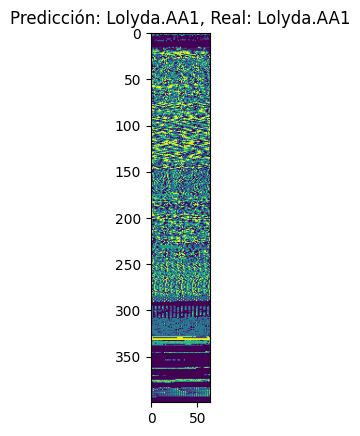

Probabilidad de la clase predicha: 93.89%
Predicción correcta: True


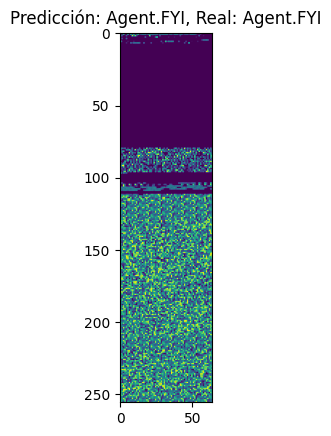

Probabilidad de la clase predicha: 93.56%
Predicción correcta: True


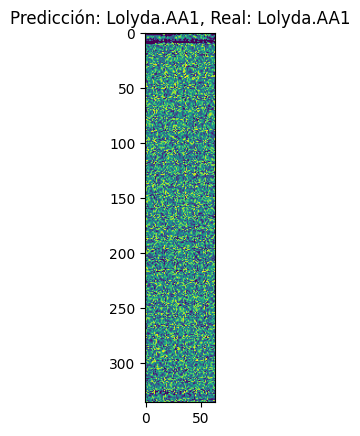

Probabilidad de la clase predicha: 88.09%
Predicción correcta: True


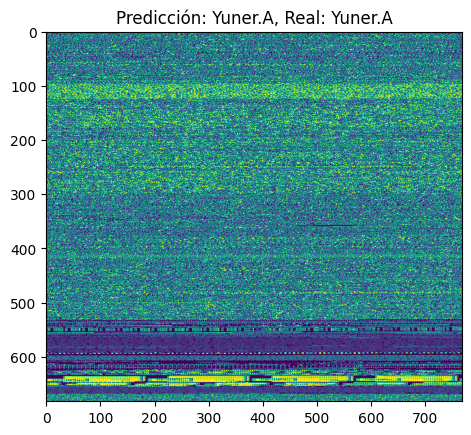

Probabilidad de la clase predicha: 96.74%
Predicción correcta: True


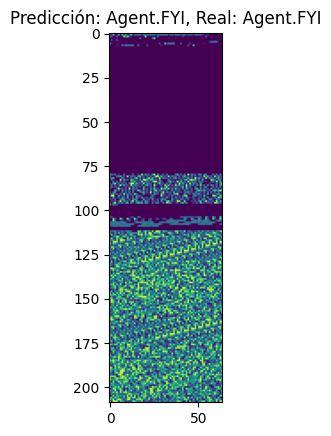

Probabilidad de la clase predicha: 94.30%
Predicción correcta: True


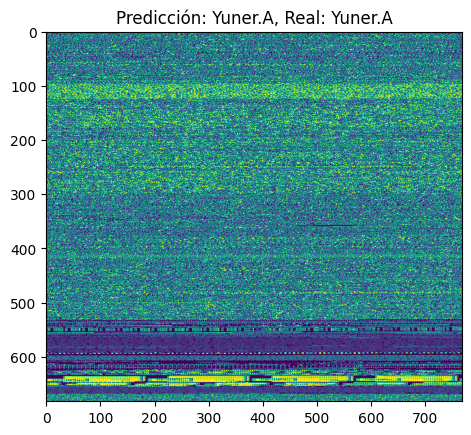

Probabilidad de la clase predicha: 96.74%
Predicción correcta: True


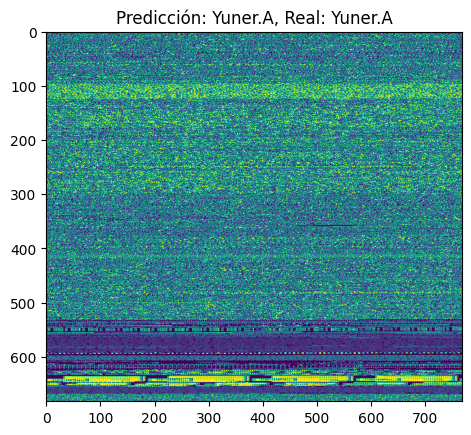

Probabilidad de la clase predicha: 96.74%
Predicción correcta: True


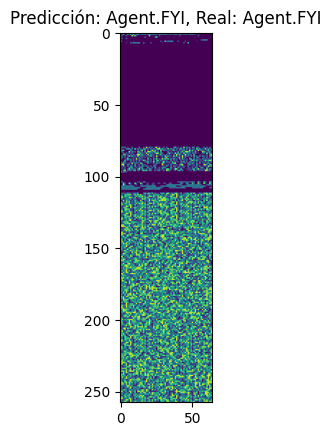

Probabilidad de la clase predicha: 93.98%
Predicción correcta: True


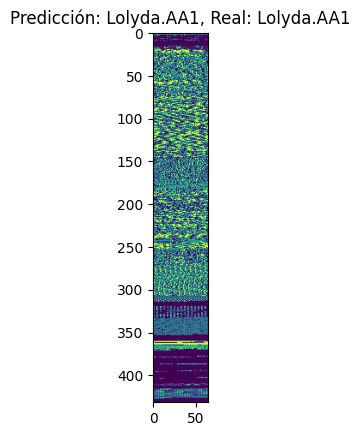

Probabilidad de la clase predicha: 93.72%
Predicción correcta: True


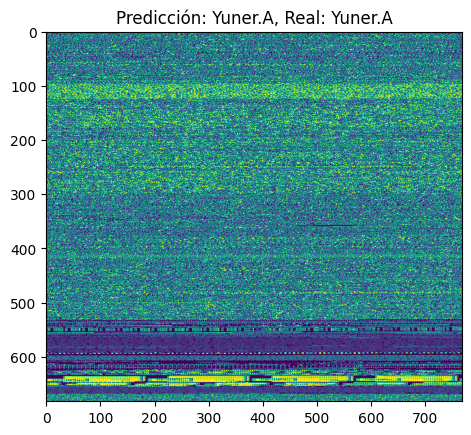

Probabilidad de la clase predicha: 96.74%
Predicción correcta: True


In [ ]:
# Svm poly

from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV

modelo_poly = svm.SVC(kernel='poly', degree=3, C=1.0, probability=True)
modelo_calibrado = CalibratedClassifierCV(modelo_poly, method='sigmoid', cv=5)
modelo_calibrado.fit(descriptores_hog_train, lab_train)

predecir10()

Los resultados obtenidos con el clasificador SVM usando un kernel polinomial (degree=3) y un parámetro de regularización \(C=1.0\) son excepcionalmente buenos para el conjunto de datos de imágenes de malware, con probabilidades de predicción que oscilan entre el 88% y el 96% y todas las predicciones siendo correctas. Esta alta eficacia en la clasificación sugiere que el modelo es muy adecuado para este tipo de datos. El kernel polinomial ha permitido modelar eficazmente las complejas interacciones no lineales entre las características, gracias a su capacidad de transformar los datos a un espacio de mayor dimensión, donde las clases se vuelven más separables. La elección de \(C=1.0\) y el ajuste del kernel han demostrado un equilibrio óptimo entre ajuste y generalización, minimizando el riesgo de sobreajuste a pesar de la alta dimensionalidad de las características (6300 dimensiones). Esto indica que el modelo no solo aprende efectivamente las características discriminativas del malware, sino que también es robusto y puede generalizar bien a nuevos datos dentro del mismo dominio de problema.

## **Información adicional de la extracción de características**

**Características locales**

**1. Local Binary Pattern (LBP)**

LBP es un descriptor de textura que compara cada píxel con sus vecinos, asignando un 1 si el vecino es mayor y un 0 si es menor. Se crea un número binario para cada píxel, y el histograma de estos valores binarios en la imagen se utiliza como vector de características.

- Texturas: Simple y eficiente

```
from skimage.feature import local_binary_pattern

# Parámetros LBP
radio = 3
n_puntos = 8 * radio
metodo = 'uniform'

lbp = local_binary_pattern(imagen_gray, n_puntos, radio, metodo)
hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_puntos + 3), range=(0, n_puntos + 2))
hist = hist.astype("float")
hist /= (hist.sum() + 1e-7)
```



**2. Histogram of Oriented Gradient (HOG)**

HOG calcula y cuenta la ocurrencia de direcciones de gradientes en regiones localizadas de la imagen.

 - Detección de objetos: Bordes y gradientes



```
from skimage.feature import hog
from skimage import exposure

fd, hog_image = hog(imagen_gray, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

# Opcional: Ajustar el contraste de hog_image para mejor visualización
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
```



**Características globales**

**1. Horizontal Edges**

Se enfoca en identificar y cuantificar los bordes horizontales en la imagen.

- Orientación de bordes



```
from scipy.ndimage import sobel

# Asumiendo imagen_gray como la imagen en escala de grises
sobel_h = sobel(imagen_gray, axis=0) # Eje horizontal
```



**2. Pixel Intensity Histogram**

Histograma de las intensidades de los píxeles en toda la imagen.

- Idea general de la distribución de la intensidad (claro/oscuro)



```
hist = cv2.calcHist([imagen_gray], [0], None, [256], [0, 256])

```



**3. Contrast**

Mide la variabilidad en la luminancia entre píxeles de la imagen.

- Identifica cuán distintas son las áreas claras de las oscuras en una imagen.



```
contrast = imagen_gray.std()
```



**4. Median Filter (Low-pass filter)**

Un filtro que reemplaza cada píxel por la mediana de los píxeles en su vecindad.

-  Reduce el ruido preservando los bordes.



```
from scipy.ndimage import median_filter

imagen_filtered = median_filter

```



# **Ejercicio 4**

Este ejercicio se enfoca en la construcción de un modelo de clasificación a partir de un conjunto de datos que contiene mediciones de la expresión genética. El objetivo es desarrollar un modelo que pueda predecir la probabilidad de cáncer en pacientes nuevos, considerando su perfil genético como un punto en un espacio de muchas dimensiones.

Para abordar este problema, se creará un modelo mediante el algoritmo de vecinos más cercanos, siendo esencial la elección de los hiperparámetros como el número de vecinos k o la distancia empleada para calcular la cercanía.
Además, será importante aplicar alguna técnica (selección de instancias) de preprocesamiento para presentarle mejores datos de entrenamiento al modelo.


In [ ]:
import warnings
warnings.filterwarnings("ignore")

Se carga la base de datos

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving genes.csv to genes.csv


In [ ]:
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

nombres_columnas = ['Gene1', 'Gene2','CancerPresent']

df = pd.read_csv('/content/genes.csv', header=None, skiprows=1)

df.columns = nombres_columnas

**Copia de seguridad**

In [ ]:
df_filtrado = df.copy()
df_filtrado.head(20)

Gene1  Gene2  CancerPresent
0     4.3    3.9              1
1     2.5    6.3              0
2     5.7    3.9              1
3     6.1    6.2              0
4     7.4    3.4              1
5     3.4    7.5              0
6     3.1    6.8              0
7     6.3    4.9              1
8     5.5    8.6              0
9     7.7    3.5              1
10    6.6    2.9              1
11    6.6    4.5              0
12    5.4    7.2              0
13    5.2    5.7              1
14    8.3    5.4              1
15    4.2    9.3              0
16    3.0    7.7              0
17    4.9    6.8              0
18    8.5    5.6              1
19    7.2    4.2              1

**Descripción de las Variables**

El dataset consta de tres variables:

* **Gene1:** Representa una medida cuantitativa del primer gen en una muestra biológica en el estudio.
* **Gene2:** Análogamente, esta columna muestra la expresión del segundo gen relevante para el estudio.
* **CancerPresent:** Es una variable binaria (0 o 1), donde 1 indica la presencia de cáncer y 0 la ausencia. Esta clasificación es el resultado que se desea predecir basado en las expresiones de los dos genes anteriores.

## **Limpieza base de datos**

Se comprueba que la base de datos tenga todos los datos completos.

In [ ]:
cantidad_null = df_filtrado.isnull().sum()
print(cantidad_null)

Gene1            0
Gene2            0
CancerPresent    0
dtype: int64


In [ ]:
import numpy as np

cantidad_nan = df_filtrado.apply(lambda x: np.isnan(x).sum())
print(cantidad_nan)

Gene1            0
Gene2            0
CancerPresent    0
dtype: int64


###**Resumen de los datos**

In [ ]:
print(df_filtrado.describe())

             Gene1        Gene2  CancerPresent
count  3000.000000  3000.000000    3000.000000
mean      5.600133     5.410467       0.500000
std       1.828388     1.729081       0.500083
min       1.000000     1.000000       0.000000
25%       4.300000     4.000000       0.000000
50%       5.600000     5.400000       0.500000
75%       6.900000     6.700000       1.000000
max      10.000000    10.000000       1.000000


Considerando que los valores de Gene1 y Gene2 del conjunto de datos representan probabilidades (en una escala de 1 a 10), se pueden sacar las siguiente conclusiones:

- **Count**: Hay 3000 mediciones de probabilidad para cada gen, lo cual coincide con la comprobación anterior de que el conjunto de datos no tiene valores nulos, ya que el dataset contiene 3000 registros.
- **Mean**: En promedio, la probabilidad representada por Gene1 es aproximadamente 5.6, y para Gene2, es aproximadamente 5.4. Esto indica que, en una escala de 1 a 10, la tendencia central de la probabilidad de expresión genética o asociación con cáncer es moderada, ni extremadamente baja ni extremadamente alta.
- **Std**: La desviación estándar es de alrededor de 1.82 para Gene1 y 1.73 para Gene2, lo que muestra una variación considerable en las probabilidades dentro de la población estudiada. No todas las muestras tienen una probabilidad similar de expresión genética o de asociación con cáncer.
- **Min**: El valor mínimo es 1 para ambos genes, lo que implica que hay casos en el conjunto de datos donde la probabilidad asociada es la más baja en la escala.
- **25%**: El primer cuartil indica que el 25% de las probabilidades son 4.3 o menos para Gene1 y 4.0 o menos para Gene2, sugiriendo que una cuarta parte de las muestras tienen una probabilidad relativamente baja.
- **50%**: La mediana es 5.6 para Gene1 y 5.4 para Gene2, indicando que la mitad de las muestras tienen probabilidades que son ligeramente superiores al punto medio de la escala.
- **Max**: El valor máximo es 10 para ambos genes, indicando que existe un conjunto de muestras con la probabilidad más alta de padecer cáncer.

Por lo tanto, se puede observar que los valores están distribuidos en todo el rango de la escala, proporcionando una variedad de probabilidades de expresión genética o de asociación con cáncer. Utilizar estos valores para diagnosticar la presencia de cáncer, nos permite tener un espectro completo de riesgo potencial basado en los datos genéticos proporcionados.

### **Balance de clases**

Se comprueba en la siguiente gráfica que los datos están balanceados, habiendo una cantidad de datos iguales para la clase positiva, que indica la presencia de cáncer y la clase negativa, que indica la ausencia.

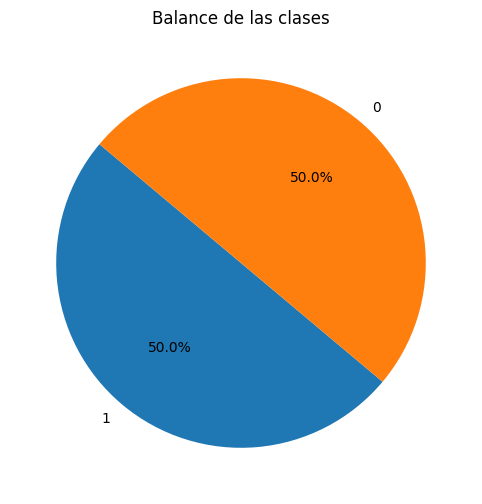

In [ ]:
class_balance = df_filtrado['CancerPresent'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.pie(class_balance, labels=class_balance.index, autopct='%1.1f%%', startangle=140)
plt.title('Balance de las clases')
plt.show()

### **Scatter plot**

Los gráficos de dispersión se suelen realizar para mostrar de forma intuitiva las relaciones entre parejas de atributos. En este caso, se realiza para poder estudiar la relación entre los dos genes que se tienen (Gene1 y Gene2).


In [ ]:
def Scatter(df_filtrado):
  plt.figure(figsize=(10, 7))

  # CancerPresent = 0
  plt.scatter(df_filtrado[df_filtrado['CancerPresent'] == 0]['Gene1'], df_filtrado[df_filtrado['CancerPresent'] == 0]['Gene2'],
              alpha=0.5, label='No Cancer')

  # CancerPresent = 1
  plt.scatter(df_filtrado[df_filtrado['CancerPresent'] == 1]['Gene1'], df_filtrado[df_filtrado['CancerPresent'] == 1]['Gene2'],
              alpha=0.5, label='Cancer')

  plt.title('Presencia de cáncer según los genes')
  plt.xlabel('Gene1')
  plt.ylabel('Gene2')
  plt.legend()
  plt.show()

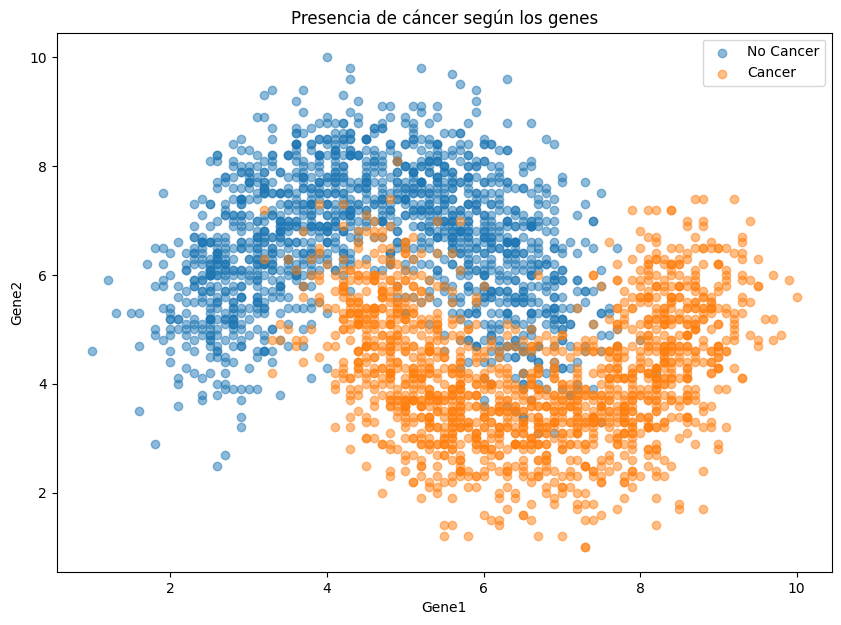

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Scatter(df_filtrado)

### **Interpretación gráfica**
Se puede observar una ligera **tendencia** donde los puntos naranjas (cáncer) se concentran más densamente hacia valores más altos de Gene1, mientras que los puntos azules (no cáncer) se concentran más en los valores altos de Gene2.

Además, no hay una **separación** clara entre las muestras de cáncer y no cáncer, lo que indica que la relación entre los niveles de expresión de estos genes y la presencia de cáncer **no es lineal**.



### **Conclusiones**

1. **Solapamiento de Clases**: Hay un grado considerable de solapamiento entre las muestras de presencia y ausencia de cáncer. Esto indica que la frontera de decisión entre las dos clases no es nítida ni lineal. Un algoritmo como k-NN, que no asume una frontera de decisión lineal, puede ser adecuado para tales datos ya que basa su clasificación en la similitud entre sus vecinos más cercanos, es decir, cómo están agrupadas las muestras en el espacio de características.

2. **Densidad de Puntos**: El algoritmo k-NN funciona bajo el supuesto de que las muestras que están cerca unas de otras en el espacio de características tienden a pertenecer a la misma clase. En el gráfico, aunque hay un solapamiento, podríamos tener en cuenta regiones donde una clase es más prevalente que la otra. El k-NN puede capturar estas diferencias y clasificar las nuevas muestras de acuerdo con la mayoría de clase de sus k vecinos más cercanos.



###**Histograma**

In [ ]:
def histograma(var,dfMini,color,ax):
  ax.hist(dfMini, bins=30, alpha=0.5, color=color, edgecolor='black')
  ax.set_title(f'Histograma de {var}')
  ax.set_xlabel('Probabilidad')
  ax.set_ylabel('Frecuencia del Gen')

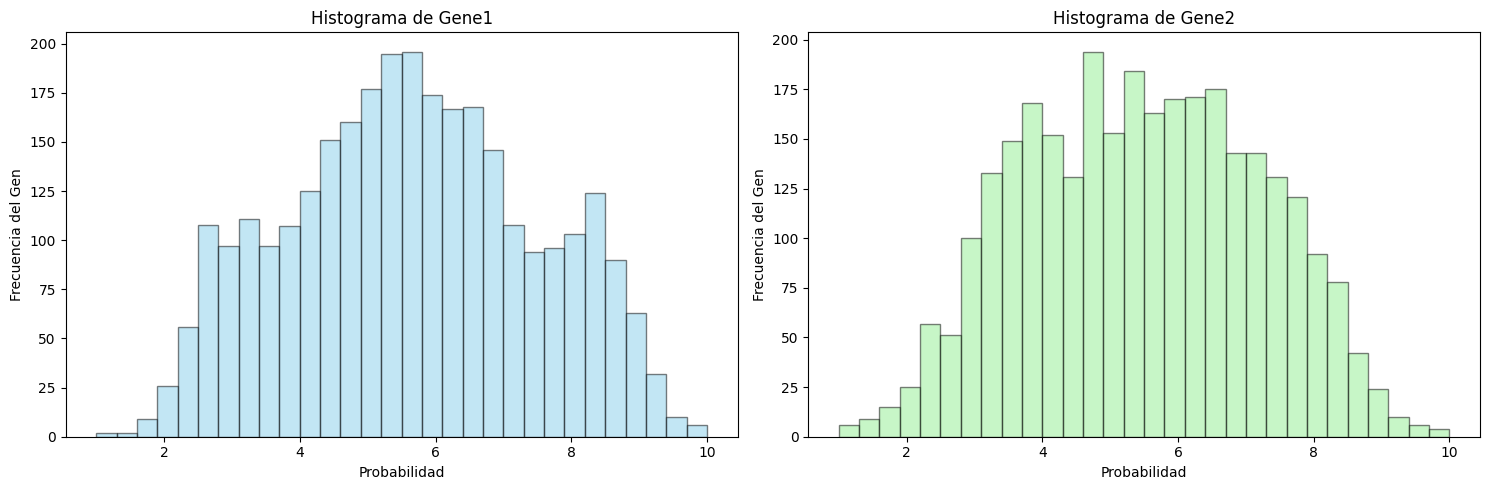

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 fila, 2 columnas

colors = ['skyblue', 'lightgreen']
variables = ['Gene1', 'Gene2']
for i, var in enumerate(variables):
    histograma(var, df_filtrado[var], colors[i], axs[i])

plt.tight_layout()
plt.show()

Los histogramas de Gene1 y Gene2 indican que la distribución de los datos no es uniforme, pero presentan una distorsión extrema como sesgo o colas largas que requieran una transformación. Además, dado que los valores ya están en una escala de probabilidad de 1 a 10, y que k-NN no asume ninguna distribución específica de los datos, una transformación como la normalización o la estandarización no hace falta. Los datos ya están en la misma escala relativa, lo que es importante para que cada característica contribuya por igual al cálculo de la distancia.

## **Partición de los datos**

A continuación, se va a crear un set de entrenamiento, otro de validación y uno de test qué permita hacer un diagnóstico lo mas preciso posible aplicando las estrategias pertinentes.

In [ ]:
from sklearn.model_selection import train_test_split

X = df_filtrado.drop('CancerPresent', axis=1)  # Features
y = df_filtrado['CancerPresent']  # Target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} - {100 * len(X_train) / len(df_filtrado):.0f}% del total de datos")
print(f"Tamaño del conjunto de validación: {X_val.shape[0]} - {100 * len(X_val) / len(df_filtrado):.0f}% del total de datos")
print(f"Tamaño del conjunto de test: {X_test.shape[0]} - {100 * len(X_test) / len(df_filtrado):.0f}% del total de datos")


Tamaño del conjunto de entrenamiento: 1800 - 60% del total de datos
Tamaño del conjunto de validación: 600 - 20% del total de datos
Tamaño del conjunto de test: 600 - 20% del total de datos


A continuación, se va a mostrar una gráfica de los datos de entrenamiento tras realizar la partición.

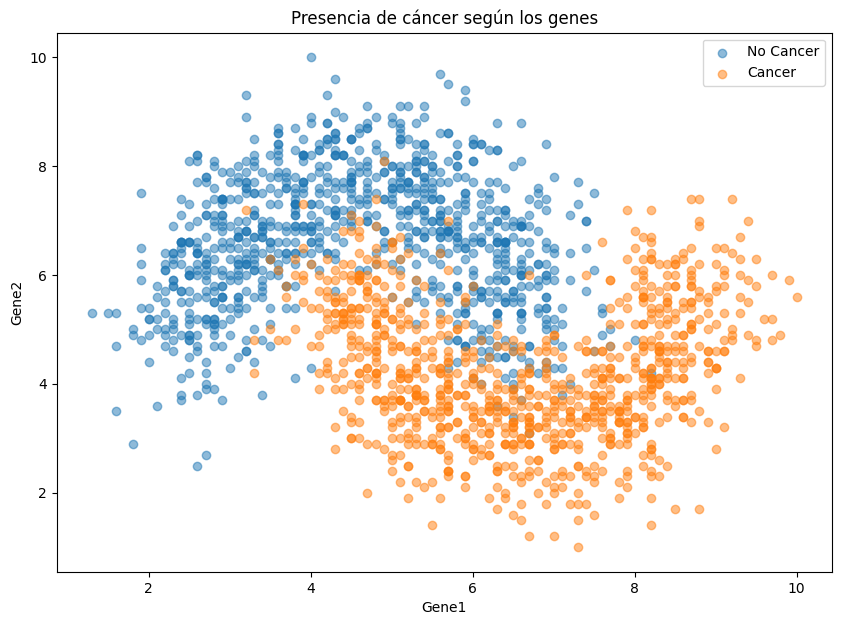

In [ ]:
Scatter(X_train.join(y_train, how='outer'))

Se ve cierto solapamiento entre clases de los datos, lo cual tendrá un impacto negativo sobre la precisión del modelo. Para evitar este problema, se realizará una transformación sobre el conjunto de los datos de entrenamiento llamado selección de instancias.

## **Selección de instancias**
La selección de instancias es una técnica de **preprocesamiento** que tiene como objetivo **mejorar el rendimiento** de los algoritmos de clasificación mediante la elección de un subconjunto representativo de los datos. En lugar de utilizar todo el conjunto de entrenamiento, se seleccionan aquellas instancias que son más beneficiosas para el aprendizaje del modelo, descartando el resto. Este enfoque puede ser particularmente útil cuando se trabaja con conjuntos de datos grandes y complejos. La idea es que al concentrarse en los datos más relevantes y potencialmente informativos, se pueda reducir el ruido, la redundancia y el costo computacional asociado con el manejo de grandes conjuntos de datos.

Se van a probar **dos tipos** de selección de instancias llamadas **Wilson editing y condensación de Hart**. Estas técnicas de reducción de instancias se aplican para mejorar la eficiencia y, potencialmente, la efectividad del clasificador, del **algoritmo k-NN**, el cual se esplicará posteriormente.

En cuanto a la **elección** de qué tipo de instancia seleccionar, en general, si el objetivo principal es mejorar la precisión y se dispone de tiempo de cómputo y memoria, **Wilson** puede ser una buena opción. Es más adecuada cuando la preocupación principal es la calidad del clasificador más que la eficiencia. Por otro lado, si el conjunto de datos es muy grande y el tiempo de entrenamiento y predicción es un problema, o si se desea minimizar el costo de almacenamiento, entonces la condensación de **Hart** puede ser preferible.
Además, también se podrían combinar ambas técnicas, aplicando por ejemplo primero Wilson para limpiar el conjunto de datos y luego Hart para reducir el tamaño del conjunto resultante, asegurándonos de que la combinación de técnicas no elimine instancias valiosas que son necesarias para mantener la calidad de la clasificación.



## **Algoritmo vecino más cercano**

El objetivo de este algoritmo es clasificar nuevos individuos con respecto a su distancia en un espacio en el que se ha distribuido un conjunto de  entrenamiento teniendo en cuenta los atributos.

**KNeighborsClassifier** es una implementación en Python del algoritmo k-vecinos más cercanos (k-NN), que se utiliza para la clasificación y regresión. En ambos casos, la entrada consiste en los k ejemplos de entrenamiento más cercanos en el espacio de características. La salida depende de si k-NN se utiliza para la clasificación o la regresión.

En k-NN clasificación, la salida es una **pertenencia a clase**. En este caso, la salida indicará si el individuo se clasifica como persona que padece cancer o no, según los valores de los genes proporcionados (Gene1, Gene2). Cada dato se clasifica según la clase más común entre sus k vecinos más cercanos.


Para ello, el **proceso** que sigue es incluir el nuevo individuo en el conjunto de entrenamiento y calcular la distancia entre el punto que se está evaluando y todos los puntos del conjunto de entrenamiento, ordenándolos para identificar los k vecinos más cercanos. Después, se decide la clasificación de dicho puntos en función de sus k vecinos.

Las **distancias** mediante las cuales se obtienen la cercanía entre puntos se pueden calcular de varias maneras: distancia euclidiana, manhattan, minkowski, entre otras.

### **Métricas principales**

En un clasificador basado en k-vecinos más cercanos (KNN), las dos métricas principales son:

* **El número de vecinos (k):**
  * Determina cuántos de los vecinos más cercanos se consideran para clasificar una nueva instancia. Esta elección es crucial, ya que un valor pequeño de k hará que el clasificador sea sensible al ruido y a las irregularidades de los datos, mientras que un valor más grande podría mejorar la clasificación al reducir el efecto del ruido y considerar una región más amplia, lo que podría dar un resultado promedio más representativo de la clase predominante en un área determinada del espacio de características.

  * Si **k es muy pequeño** el modelo categoriza con pocos individuos y será muy sensible a puntos que son atípicos.
  * Si **k es muy grande** el modelo tiende a asignar siempre a la clase mas grande.

* **La medida de distancia**: Define cómo se calcula la "cercanía" de las instancias (por ejemplo, la distancia euclídea o de manhattan).


**Necesidad de Normalización**: Dado que k-NN se basa en medidas de distancia, las características deben ser normalizadas para que una no domine erróneamente la medida de distancia debido a su escala. Sin embargo, en esta base de datos, como se ha comentado previamente, ya están a una misma escala por lo que no hay que normalizar los datos.



## **Wilson editing**

Este método **elimina** aquellas **instancias** que son **clasificadas incorrectamente por sus k vecinos más cercanos**. Su objetivo es **eliminar ruido** y corregir las fronteras de decisión del clasificador, preservando las instancias que son desafiantes de clasificar correctamente y que podrían estar más cerca de la frontera entre las clases. Es útil para mejorar la precisión pero puede no ser tan eficiente en términos de reducción de la cantidad de instancias, ya que solo se eliminan las instancias clasificadas incorrectamente.

La **elección de k** en los métodos de edición de Wilson afectará al resultado. Un punto se elimina solo si la mayoría de sus vecinos más cercanos son de una clase diferente. Si k fuera 1, podríamos eliminar puntos válidos simplemente porque su vecino más cercano es un outlier; y si k fuera demasiado grande, podríamos no eliminar suficientes puntos ruidosos.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import accuracy_score
from scipy.stats import mode

def wilson_editing(X, y, k):
    knn = KNeighborsClassifier(n_neighbors=k)

    # Ajustar el clasificador a los datos de entrenamiento
    knn.fit(X, y)

    # Clasificar todas las instancias y eliminar las clasificaciones incorrectas
    X_corrected = []
    y_corrected = []
    pred = knn.predict(X)
    for i in range(len(X)):
        # Verificar si la clasificación es correcta
        if pred[i] == y.iloc[i]:
            X_corrected.append(X.iloc[i])
            y_corrected.append(y.iloc[i])

    X_corrected = pd.DataFrame(X_corrected, columns=X.columns)
    y_corrected = pd.Series(y_corrected, name=y.name, index=X_corrected.index)

    return X_corrected, y_corrected

In [ ]:
X_wilson, y_wilson = wilson_editing(X_train, y_train, k=100)

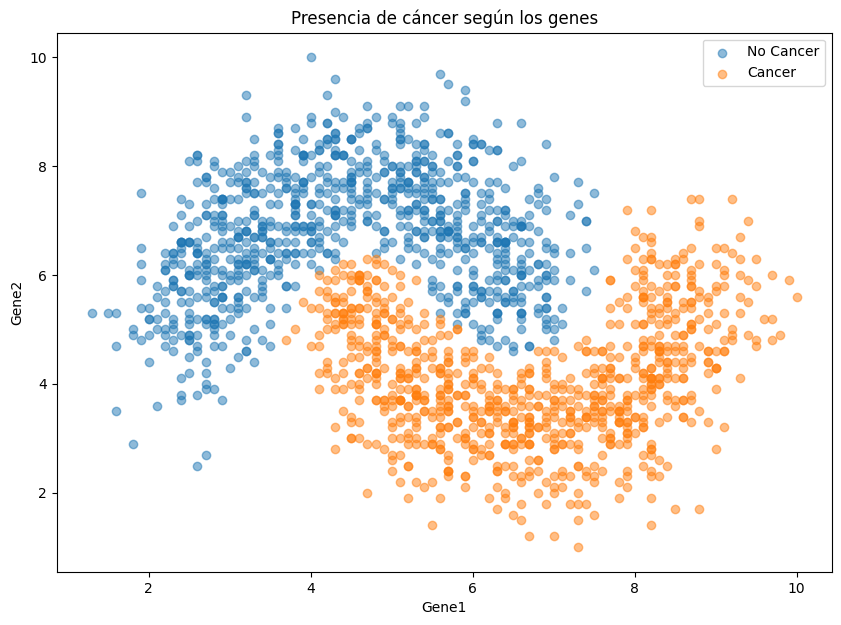

In [ ]:
Scatter(X_wilson.join(y_wilson, how='outer'))

### **Interpretación gráfica**

Al observar la gráfica, se puede ver como el solapamiento entre clases ha disminuido mucho al eliminar el ruido. Sin embargo, hay puntos con una gran densidad de puntos, los cuales no todos serían necesarios para la clasificación.

Si se tiene una concentración más densa de puntos en ciertas áreas del gráfico, un modelo de k-NN previa podría verse influenciado indebidamente por estas áreas. Esto se podría solucionar con la condensación de Hart, como se verá posteriormente.



## **Condensación de Hart**

Esta técnica busca **reducir el número de instancias**, manteniendo aquellas que son necesarias para clasificar correctamente el conjunto de datos. Aplicar Hart puede resultar en una reducción significativa del conjunto de datos, mejorando la eficiencia en tiempo de ejecución y en almacenamiento, ya que este método busca conservar la mínima cantidad de puntos pero que sean suficientes para clasificar correctamente las instancias del conjunto original.

La condensación de Hart está diseñada para reducir el conjunto de datos a un subconjunto consistente que todavía puede clasificar correctamente el conjunto de entrenamiento. Con (k=1), cada punto se compara con el conjunto condensado: si se clasifica incorrectamente, se añade al conjunto; si no, se considera redundante y no se incluye. Esta técnica está diseñada para mantener solo los puntos necesarios para definir las fronteras entre clases, y un (k) de 1 garantiza que mantenemos solo aquellos puntos que son necesarios para clasificar al menos una instancia incorrectamente.

Como se tiene una gran cantidad de datos, se toma un valor de k igual a 10, de forma que este valor siga siendo bajo pero a la vez representativo.



In [ ]:
def hart_condensation(X, y, k):
    condensated_X = X.iloc[0:1]
    condensated_y = y.iloc[0:1]

    for i in range(1, len(X)):
        if len(condensated_X) < 10:
          knn = KNeighborsClassifier(n_neighbors=len(condensated_X))
          knn.fit(condensated_X, condensated_y)
        else:
          knn = KNeighborsClassifier(n_neighbors=10)
          knn.fit(condensated_X, condensated_y)

        sample = X.iloc[i:i+1]
        label = y.iloc[i:i+1]
        if knn.predict(sample)[0] != label.iloc[0]:
            condensated_X = pd.concat([condensated_X, sample])
            condensated_y = pd.concat([condensated_y, label])

    return pd.DataFrame(condensated_X, columns=X.columns), pd.Series(condensated_y, name=y.name)

In [ ]:
X_hart, y_hart = hart_condensation(X_train, y_train, k=10)

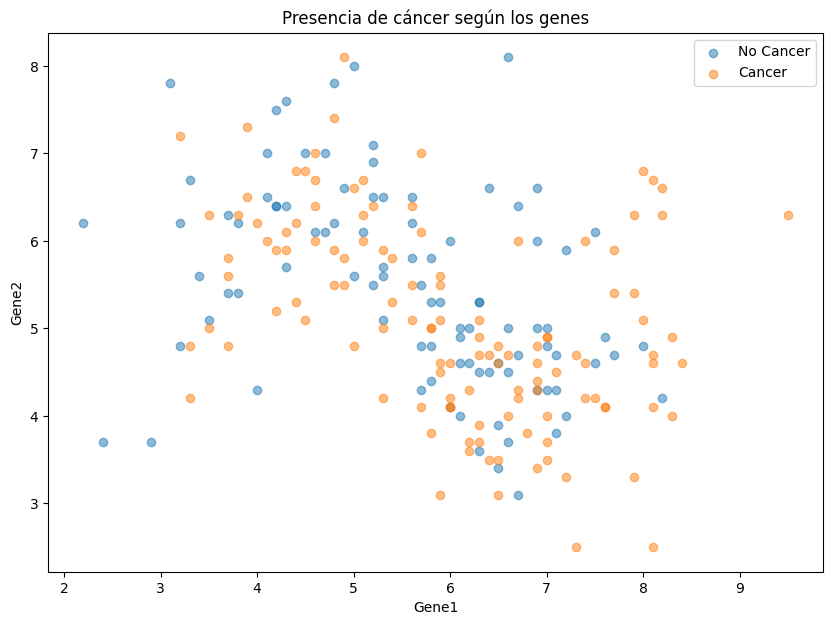

In [ ]:
Scatter(X_hart.join(y_hart, how='outer'))

### **Interpretación gráfica**
Aunque la condensación tiene como objetivo mantener la capacidad del clasificador para diferenciar entre clases, también es posible que se pierda información valiosa, pudiendo afectar a la precisión del modelo final.

En este caso, se puede observar en la gráfica que tras aplicar la condensación de Hart a los datos, las clases cáncer y no cáncer se superponen
significativamente. La condensación de Hart es efectiva cuando hay instancias claras y distintas que pueden actuar como representantes de las clases. Estas instancias clave ayudan a construir un conjunto de entrenamiento condensado que puede predecir la clasificación del resto del conjunto con precisión.

Sin embargo, cuando hay un solapamiento significativo entre las clases, como en este caso, el proceso de condensación de Hart podría no ser suficiente para preservar la capacidad de clasificación. Esto se debe a que Hart selecciona instancias que no se clasifican bien con el conjunto actual, pero si muchas de estas instancias son en realidad ruido o datos atípicos que coinciden con la frontera de decisión entre clases, entonces el modelo final podría verse afectado debido a:

1. **Subrepresentación de las clases**: Instancias importantes que definen las fronteras de decisión pueden quedar excluidas si están rodeadas de ruido, lo que resulta en un modelo que no captura completamente la distribución de cada clase.

2. **Sensibilidad al ruido**: Si el ruido está sistemáticamente cerca de la frontera de decisión y se clasifica incorrectamente, podría ser incorporado en el conjunto condensado, distorsionando la frontera de decisión del modelo y reduciendo la precisión general.

3. **Pérdida de información**: Instancias cruciales que son necesarias para un modelo robusto pueden ser eliminadas erróneamente si están rodeadas por ruido, lo que resulta en un modelo que no tiene suficiente información para hacer predicciones precisas.

Por lo tanto, la condensación de Hart tiende a funcionar mejor cuando hay una separación más clara entre las clases y menos ruido.

### **Conclusiones elección de las técnicas de selección de instancias**
Además de probar la selección de instancias sobre los datos con Wilson editing y la condensación de Hart (cada uno por separado), se probó a realizarlo seguidas.

Para ver la mejor forma de combinarlas, se probó primero wilson y despues hart, y viceversa. Se observó que aplicar primero hart y después wilson no era buena opción debido a que el ruido afecta negativamente a Hart. Por lo tanto, lo correcto es hacer primero Wilson y despues Hart. Sin embargo, aplicar Hart una única vez o aplicarlo sobre datos con ruido no nos devuelve buenos resultados.

A continuación se muestra la gráfica resultante de aplicar Wilson y Hart seguidos pero una única vez cada uno para mostrar la idea que se explica.


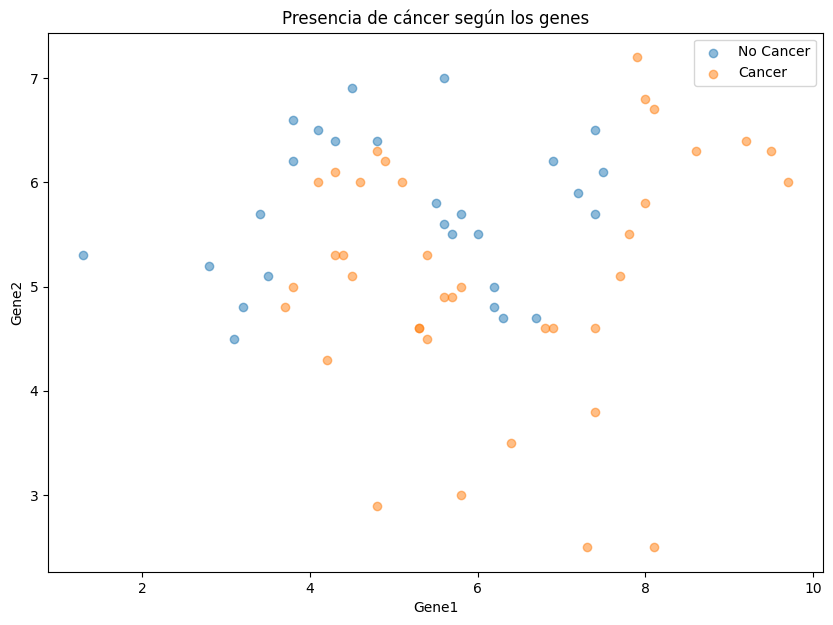

In [ ]:
X_wilson, y_wilson = wilson_editing(X_train, y_train, k=100)
X_hart, y_hart = hart_condensation(X_wilson, y_wilson, k=10)
Scatter(X_hart.join(y_hart, how='outer'))

Se puede observar que aunque el proceso se realiza de manera adecuada eliminando el ruido y centrandose en aquellos datos mas importantes, el número de instancias es bastante bajo, siendo asi negativo para la predicción. Por lo tanto, se va a crear la siguiente función wilson-hart iterativa para tratar de solucionar esta cuestión.

## **Combinación iterativa de Wilson y Hart**
A continuación se combinan los dos métodos de selección de instancias, Wilson editing y la condensación de Hart, para mejorar la eficacia al seleccionar un subconjunto representativo de datos para el entrenamiento.

Se inicia con el método de **Wilson** para eliminar el ruido de los datos, usando el algoritmo de k-NN para identificar y eliminar las instancias mal clasificadas. Posteriormente, se aplica **Hart** al conjunto de datos resultante, reduciendo aún más el conjunto de datos al mantener solo las instancias que no son correctamente clasificadas por el conjunto actualmente condensado. El objetivo es preservar las instancias que están cerca de la frontera de decisión entre las clases.


Además, se crea un **proceso iterativo** que aplica la condensación de **Hart varias veces** (N veces). En cada iteración, se refina el conjunto de instancias seleccionadas, buscando equilibrar la eliminación de datos redundantes mientras se conservan suficientes instancias para una clasificación precisa.

La función `wilson_hart_process` realiza este procedimiento iterativo y devuelve el conjunto de instancias seleccionadas, que será más pequeño que el conjunto original pero aún suficiente para entrenar un modelo de clasificación efectivo.

Por lo tanto, la combinación de Wilson y Hart es la forma con la que mejor resultado se obtiene ya que aborda dos problemas en los datos: el ruido (con Wilson) y la redundancia (con Hart). El resultado esperado es un conjunto de entrenamiento que no solo es más limpio sino también más compacto, mejorando así la precisión.

In [ ]:
def wilson_hart_process(X_train, y_train, N):
  X_sol = pd.DataFrame(columns=X_train.columns)
  y_sol = pd.Series(dtype=y_train.dtype, name=y_train.name)

  X_wilson, y_wilson = wilson_editing(X_train, y_train, k=100)

  for i in range(N):
    X_hart, y_hart = hart_condensation(X_wilson, y_wilson, k=10)

    X_sol = pd.concat([X_sol, X_hart], axis=0, ignore_index=False)
    y_sol = pd.concat([y_sol, y_hart], axis=0, ignore_index=False)

    X_wilson = X_wilson.drop(X_hart.index, axis=0)
    y_wilson = y_wilson.drop(y_hart.index, axis=0)

  return X_sol, y_sol

287


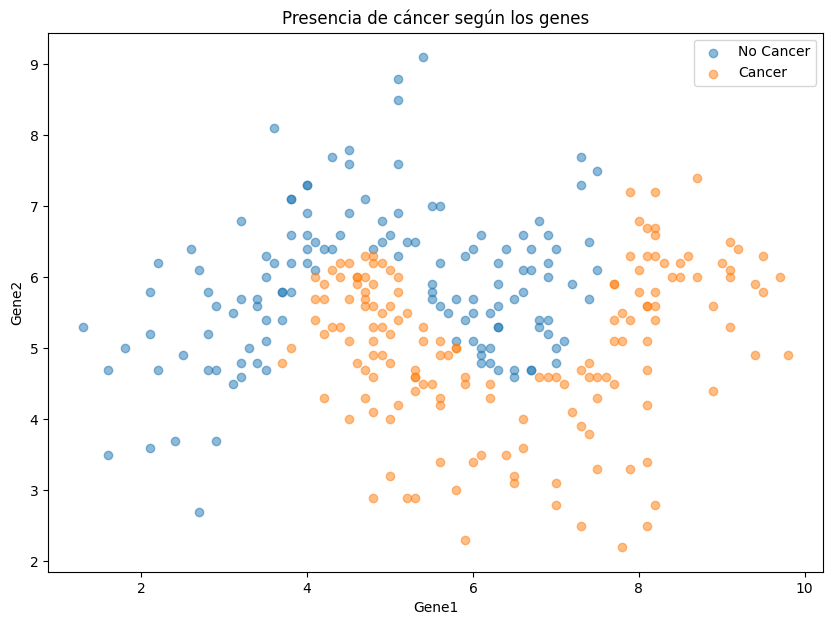

In [ ]:
X_hart, y_hart = wilson_hart_process(X_train, y_train, 6)
print(len(X_hart))
Scatter(X_hart.join(y_hart, how='outer'))

## **Entrenamiento**

### **Función wilson+hart**



Elegir el valor de K en un algoritmo k-NN es crucial porque determina cuántos vecinos se consideran para clasificar una nueva instancia. Un valor de K más pequeño puede hacer que el modelo sea sensible al ruido y a las fluctuaciones en los datos de entrenamiento, lo que puede llevar a sobreajuste. Por otro lado, un valor de K demasiado grande puede suavizar demasiado las fronteras de decisión del modelo, lo que puede llevar a subajuste.

Antes de aplicar el algoritmo de KNN, hay que decidir la cantidad de veces (N) que se aplicará de manera iterativa la función de Wilson+Hart.Tras probar distintos valores de N, se toma 6 como el óptimo. Para este valor, se ha obtenido como la mejor configuración (k=12, distancia = euclídea, precisión = 0.935).

De los otros valores de N que se probaron, se obtuvo una precisión ligeramente superior como para N=4 (3, 'chebyshev', 0.9366), o para N=5 (9, 'chebyshev', 0.9366). Sin embargo, en todos los casos, al igual que en estos ejemplos, el valor de K es menor, lo cual es una peor configuración. Esto se debe a que se quiere elegir una **K que agrupe a cuantos más individuos posible** para ser más precisos. De esta forma se está poniendo más información de los datos para clasificar a los nuevos.

Por lo tanto, la elección de estos hiperparámetros puede no maximizar la precisión para el conjunto de datos de entrenamiento, pero globalmente resulta en un modelo que generaliza mejor a nuevos datos, lo cual es imprescindible.

In [ ]:
X_hart, y_hart = wilson_hart_process(X_train, y_train, 6) # N=6 = cantidad de veces que se itera Hart

Una vez obtenidos los nuevos conjuntos de datos de entrenamiento tras aplicar las técnicas de selección de instancias, se comienzan a **entrenar** los datos.

Se realiza el proceso de evaluación y optimización del modelo de clasificación KNN, utilizando diferentes métricas de distancia.


##**Entrenamiento y Evaluación del Modelo KNN**:
   - **Configuración de Parámetros**: Se utiliza un bucle para probar valores para el número de vecinos (`k`) desde 1 hasta 19, y para varias métricas de distancia como euclidiana, manhattan, minkowski, chebyshev, canberra y braycurtis. Esta diversidad en la configuración permite evaluar cómo la elección del número de vecinos y la métrica de distancia afecta el rendimiento del modelo.
   - **Entrenamiento del Modelo**: Para cada combinación de `k` y métrica de distancia, se entrena un modelo KNN con el conjunto de entrenamiento optimizado (`X_hart`, `y_hart`).
   - **Evaluación del Modelo**: Cada modelo entrenado se evalúa usando un conjunto de validación `X_val`, y se calcula la precisión (`accuracy`) de las predicciones.

El objetivo de este enfoque es identificar la configuración óptima que maximiza la precisión del modelo KNN. Experimentar con diferentes métricas de distancia y números de vecinos permite entender cómo cada ajuste influye en la capacidad del modelo para generalizar a partir de nuevos datos.


### **Explicación de las distancias usadas**
Las distancias que se van a probar son las siguientes:

1. **Euclidean**:
   - **Cálculo**: Es la distancia más común y se calcula como la raíz cuadrada de la suma de los cuadrados de las diferencias entre las coordenadas correspondientes de dos puntos.
   - **Uso**: Se usa ampliamente en muchos campos, incluyendo la clasificación de datos espaciales y en entornos donde las dimensiones son comparables y no hay predominancia de una característica sobre otra.
   - **Fórmula**:

$$ d(\mathbf{p}, \mathbf{q}) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2} $$


2. **Manhattan**:
   - **Cálculo**: Se calcula como la suma de las diferencias absolutas de sus coordenadas.
   - **Uso**: Es útil en entornos de cuadrícula, como planificación urbana o en juegos de tablero. También es adecuada para datos de alta dimensionalidad.
   - **Fórmula**:

$$ d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} |p_i - q_i| $$

3. **Chebyshev**:
   - **Cálculo**: Se calcula como el máximo de las diferencias absolutas de las coordenadas. Esencialmente, es la distancia más larga a lo largo de cualquier dimensión del espacio.
   - **Uso**: Se utiliza en problemas donde el movimiento puede ser en cualquier dirección pero sólo en un eje a la vez.
   - **Fórmula**:
$$ d(\mathbf{p}, \mathbf{q}) = \max_{i} |p_i - q_i| $$


4. **Canberra**:
   - **Cálculo**: Se calcula como la suma de las divisiones de las diferencias absolutas por la suma de los valores absolutos de las coordenadas. Es una métrica ponderada que da más peso a las diferencias entre pequeñas coordenadas.
   - **Uso**: Es especialmente útil para datos donde se quiere dar más importancia a las diferencias entre valores pequeños, como en análisis de datos genéticos o ecológicos.
   - **Fórmula**:
$$ d(\mathbf{p}, \mathbf{q}) = \sum_{i=1}^{n} \frac{|p_i - q_i|}{|p_i| + |q_i|} $$


5. **Bray-Curtis**:
   - **Cálculo**: se calcula como la suma de las diferencias absolutas dividida por la suma de todos los valores. Mide la disimilitud entre dos conjuntos de muestras.
   - **Uso**: Se usa en ecología para medir la disimilitud entre dos sitios con respecto a su composición de especies.
   - **Fórmula**:
$$ d(\mathbf{p}, \mathbf{q}) = \frac{\sum_{i=1}^{n} |p_i - q_i|}{\sum_{i=1}^{n} (|p_i| + |q_i|)} $$


Se van a detallar las ventajas y desventajas de las dos distancias que más tarde veremos que son las más óptimas:

### **Distancia euclídea**
Esta distancia que se empleará contiene una serie de ventajas y desventajas:

##### **Ventajas**

1. **Intuitiva y Fácil de Entender**: La distancia euclidiana mide la distancia "natural" en línea recta entre dos puntos en el espacio, similar a cómo mediríamos la distancia en la vida real con una regla. Esta simplicidad hace que sea fácil de entender y explicar.

2. **Aplicabilidad General**: Funciona bien en muchos casos prácticos, especialmente en problemas donde las diferencias lineales entre los atributos son importantes y los datos no son de alta dimensión.

3. **Eficaz en Espacios de Baja a Moderada Dimensión**: En espacios con dimensiones no muy altas, la distancia euclidiana puede ser muy efectiva para medir distancias reales y significativas entre puntos.

#### **Desventajas**

1. **Dimensionalidad**: En espacios de alta dimensión, la distancia euclidiana tiende a perder eficacia porque el espacio entre los puntos se vuelve uniformemente grande. Esto se conoce como la "maldición de la dimensionalidad", donde la distancia euclidiana puede no diferenciar adecuadamente entre puntos cercanos y lejanos.

2. **Sensibilidad a la Escala**: La distancia euclidiana es sensible a la escala de los atributos. Si un atributo tiene un rango mucho más amplio que otro, puede dominar la medida de distancia, sesgando los resultados. Sin embargo, esto no ocurre en nuestros datos.

3. **No Toma en Cuenta las Relaciones Estructurales entre Atributos**: La distancia euclidiana trata cada dimensión de forma independiente y no considera las posibles correlaciones entre atributos. Esto puede ser una limitación si las relaciones entre características son importantes para el análisis.

### **Distancia Chebyshev**
La distancia de Chebyshev es una métrica con varias aplicaciones, especialmente en ciertos contextos de optimización y en problemas donde la máxima diferencia en alguna de las dimensiones es más relevante que la suma de las diferencias.

#### **Ventajas**:

1. **Resistencia al Ruido**: Como toma en cuenta solo la diferencia máxima, es menos sensible al ruido en otras dimensiones.
2. **Simplicidad Computacional**: Para algunos conjuntos de datos, calcular la distancia de Chebyshev puede ser más eficiente computacionalmente que calcular otras métricas de distancia que requieren sumas o raíces cuadradas.
3. **Importancia de la Característica Dominante**: En situaciones donde la característica más influyente es de interés primordial, la distancia de Chebyshev puede ser más representativa que otras métricas.


#### **Desventajas**:

1. **Falta de Sensibilidad**: Puede ser demasiado simplista para algunos problemas, ya que ignora los cambios en todas las dimensiones excepto en la que tiene la diferencia máxima.
3. **Pérdida de Información**: Al enfocarse solo en la diferencia más grande, puede perder información valiosa contenida en las otras dimensiones del espacio de características.
4. **Sensibilidad a Cambios Discretos**: La distancia puede cambiar drásticamente con pequeñas variaciones en la característica más extrema, lo que puede ser un problema en entornos donde se esperan fluctuaciones menores.


In [ ]:
results = []
distances = ['euclidean', 'manhattan','chebyshev','canberra','braycurtis']

for distance in distances:
    for k in range(1, 20):
        knn = KNeighborsClassifier(n_neighbors=k, metric=distance)
        knn.fit(X_hart, y_hart)
        pred = knn.predict(X_val)

        acc = accuracy_score(y_val, pred)
        results.append((k, distance, acc))

results_df = pd.DataFrame(results, columns=['k', 'Distance', 'Accuracy'])

Se muestra el **vector de los resultados ordenados de mayor a menor precisión**, siendo el primer elemento el de la mejor configuración. Para ello, se crea una copia para poder usar posteriormente el vector normal en la gráfica.

In [ ]:
results_copia = results.copy()
results_copia.sort(key=lambda x: x[2], reverse=True)
results_copia[0:14]

[(12, 'euclidean', 0.935),
 (8, 'chebyshev', 0.935),
 (9, 'chebyshev', 0.935),
 (11, 'chebyshev', 0.935),
 (2, 'canberra', 0.935),
 (8, 'canberra', 0.935),
 (10, 'canberra', 0.935),
 (2, 'braycurtis', 0.935),
 (6, 'euclidean', 0.9333333333333333),
 (8, 'euclidean', 0.9333333333333333),
 (5, 'manhattan', 0.9333333333333333),
 (14, 'manhattan', 0.9333333333333333),
 (1, 'chebyshev', 0.9333333333333333),
 (2, 'chebyshev', 0.9333333333333333)]

Se observa que la distancia con la cual se alcanza mayor precisión es la euclídea en k=12. Sin embargo, con chebyshev también se alcanza esa misma precisión tanto en k=8, 9 y 11. Por lo tanto, se evaluarán los resultados tanto para el caso de la euclídea como para chebyshev con k=11 (cuanto más alto el valor de k mejor).

In [ ]:
best_k, best_distance, best_acc = results_copia[0]
best_k_2, best_distance_2, best_acc_2 = results_copia[3]

mejores = [best_distance,best_distance_2]
mejores

['euclidean', 'chebyshev']

Se realiza una **gráfica** para visualizar la evolución de las **dos distancias con las que se obtiene mejor precisión**.

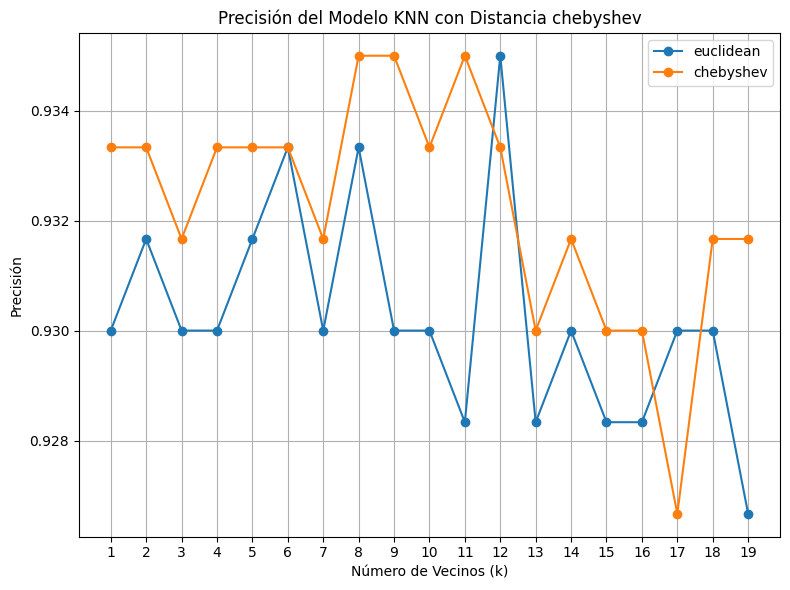

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for distance in mejores:
    subset = results_df[results_df['Distance'] == distance]
    plt.plot(subset['k'], subset['Accuracy'], marker='o', linestyle='-', label=distance)
    plt.title(f'Precisión del Modelo KNN con Distancia {distance}')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel('Precisión')
    plt.xticks(range(1, 20))
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

###**Mejor configuración**
Se va a considerar la distancia óptima la de chebyshev con k=11. Esta decisión se toma porque aunque la k es ligeramente menor (una única unidad comparado con el caso de la euclídea), el rendimiento global es mejor y, además, no solamente alcanza ese valor máximo de precisión en varias ocasiones sino que la precisión es mayor en prácticamente todos los valores de k.

In [ ]:
results_copia[3]

(11, 'chebyshev', 0.935)

### **Grafica de la mejor configuración**

Se muestra una gráfica de como han ido evolucionando los parámetros de la mejor configuración (en este caso, con k = 12 y la distancia euclídea).

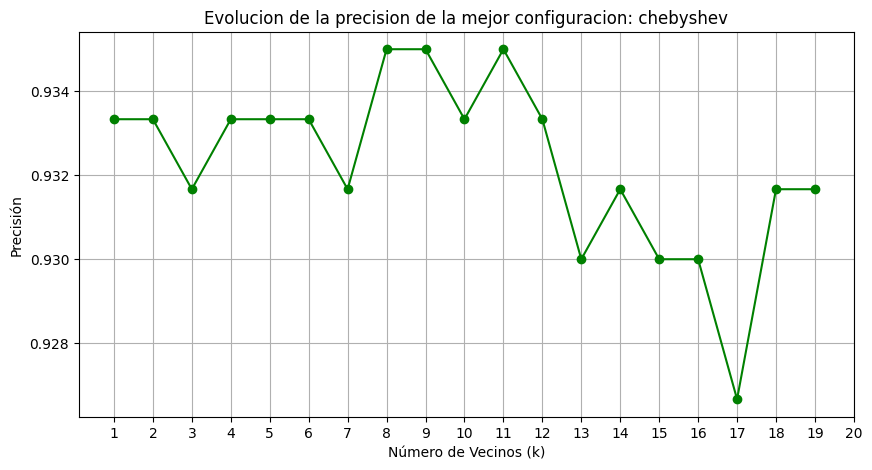

In [ ]:
best_k, best_distance, best_acc = results_copia[3]

best_distance_results = [result for result in results if result[1] == best_distance]

best_distance_df = pd.DataFrame(best_distance_results, columns=['k', 'Distance', 'Accuracy'])

plt.figure(figsize=(10, 5))
plt.plot(best_distance_df['k'], best_distance_df['Accuracy'], marker='o', linestyle='-', color='green')
plt.title(f'Evolucion de la precision de la mejor configuracion: {best_distance}')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()

## **Evaluación datos test**
Se entran los datos de train y validation usando un número de vecinos k = 11 y la distancia chebyshev (valores de la mejor configuración), para posteriormente hacer la predicción sobre los datos de test y poder evaluar el rendimiento del modelo.

In [ ]:
# Se entrena el modelo con la mejor configuración con el conjunto de entrenamiento y validacion
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])
knn_best = KNeighborsClassifier(n_neighbors=11, metric='chebyshev')
knn_best.fit(X_full_train, y_full_train)

# Se evalúa el modelo con el conjunto de prueba
y_test_pred = knn_best.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'La precisión del modelo con los datos de prueba es: {test_accuracy:.4f}')


La precisión del modelo con los datos de prueba es: 0.9417


### **Conclusión rendimiento del modelo**
Tras evaluar el modelo con datos nunca vistos, se obtiene una precisión del 94.17%, la cual es ligeramente mayor que la precisión obtenida al probar el caso de la distancia euclídea con k=12 (precisión 94.0%), confirmando así que él caso de chebyshev con k=11 es una decisión mejor a la hora de clasificar un nuevo paciente como individuo que padece cáncer o no, en función del valor de numérico de dos genes.